### Importing Modules

In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from peakutils import baseline
from scipy.integrate import trapezoid as trap
import pencil as pc
from IPython.display import display, Math, Latex

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['text.usetex'] = True

## Variation of Thermodynamic Variables along z

### reading xy_aver file and grid

In [3]:
#reading the grid
grid = pc.read.grid(trim=True)
z = grid.z

reading grid data from processor 27 of 128 ...
reading grid data from processor 98 of 128 ...
reading grid data from processor 54 of 128 ...
reading grid data from processor 39 of 128 ...
reading grid data from processor 57 of 128 ...
reading grid data from processor 86 of 128 ...
reading grid data from processor 19 of 128 ...
reading grid data from processor 119 of 128 ...
reading grid data from processor 92 of 128 ...
reading grid data from processor 71 of 128 ...
reading grid data from processor 70 of 128 ...
reading grid data from processor 56 of 128 ...
reading grid data from processor 103 of 128 ...
reading grid data from processor 30 of 128 ...
reading grid data from processor 112 of 128 ...
reading grid data from processor 40 of 128 ...
reading grid data from processor 126 of 128 ...
reading grid data from processor 60 of 128 ...
reading grid data from processor 89 of 128 ...
reading grid data from processor 62 of 128 ...
reading grid data from processor 93 of 128 ...
reading g

In [4]:
#reading the xy_aver file
xya=pc.read.aver(plane_list=['xy'])

### reading density and temperature from xy_aver

In [5]:
rho = xya.xy.rhomz[-1,:]
pre = xya.xy.ppmz[-1,:]
temp = xya.xy.TTmz[-1,:]

In [6]:
var = pc.read.var(trimall=True)

In [7]:
uu = var.uu**2

In [8]:
uu.shape

(3, 256, 400, 400)

In [9]:
uu_sum = np.sum(uu, axis=0)
uu_sum_d = np.sum(uu[:,:212,:,:], axis=0)
uu_sum_d.shape

(212, 400, 400)

In [10]:
urms_z = np.average(uu_sum_d, axis=(-1,-2))
urms_d = np.average(uu_sum_d, axis=(-1,-2, -3))
urms = np.average(uu_sum, axis=(-1,-2, -3))

In [11]:
# ts.urms[-1], urms

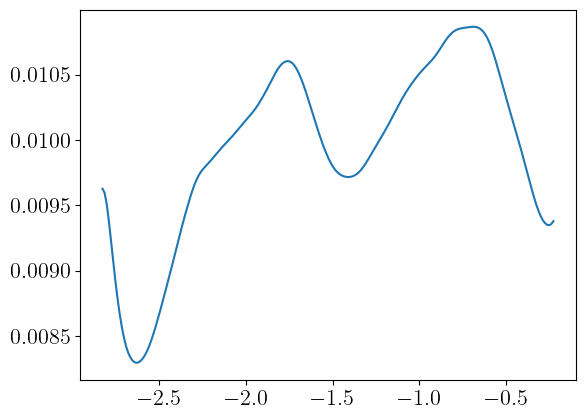

In [12]:
plt.plot(grid.z[:212], urms_z)

In [13]:
ux = var.ux
uy = var.uy
uz = var.uz

In [14]:
np.array_equal(var.uu[2,:,:,:],uz)

True

In [15]:
ux.shape

(256, 400, 400)

In [16]:
# plt.plot(grid.z, np.average(var.urms, axis=(-1,-2)))

### calculating pressure

In [17]:
#reading the var file
# var = pc.read.var(magic=["pp"], trimall=True)

In [18]:
#calculating pressure profile by averaging the var file in xy plane
# pressure = np.average(var.pp, axis=(-1,-2))

### plotting 

In [19]:
data = np.loadtxt('stratification.dat')
data[0,0], data[-1,0], z[0], z[-1]

(-2.61799, 0.523599, -2.82743, 0.31416)

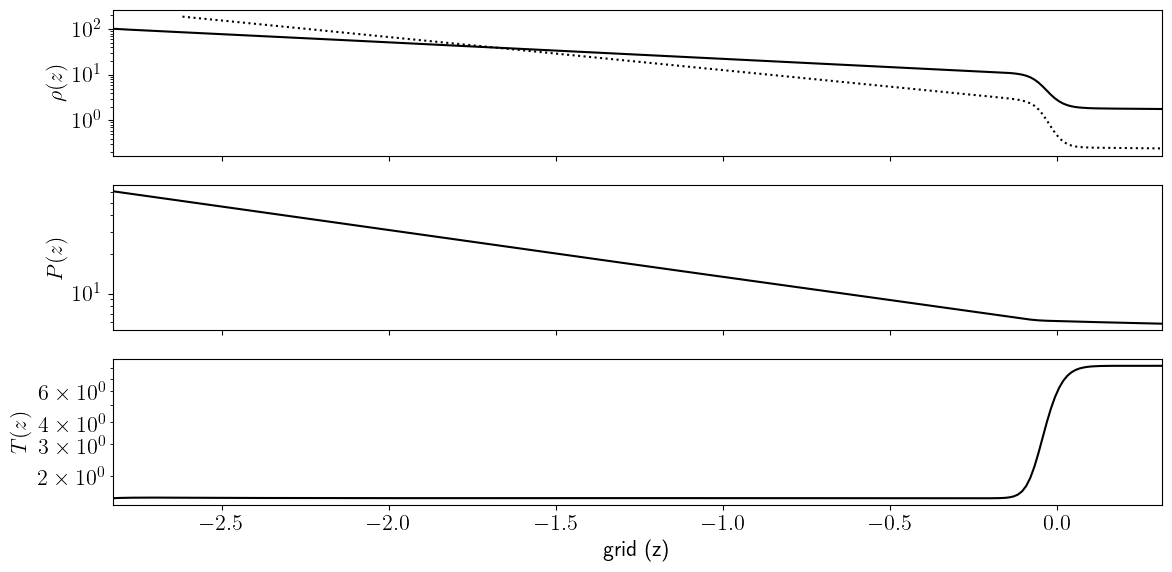

In [20]:
fig, axs = plt.subplots(3,1, figsize=(12,6), sharex=True)

axs[0].plot(grid.z, rho, color='k')
axs[0].plot(data[:,0], np.exp(data[:,1]), color='k', ls=':')
# axs[1].plot(grid.z, pressure, color='k')
axs[1].plot(grid.z, pre, color='k')
axs[2].plot(grid.z, temp, color='k')
#axs[2].plot(grid.z, xya.xy.TTmz[-1], color='k')

axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")

# axs[0].set_xlim(z[0], z[-1])
# axs[1].set_xlim(z[0], z[-1])
axs[2].set_xlim(z[0], z[-1])

axs[0].set_ylabel(r"$\rho(z)$")
axs[1].set_ylabel(r"$P(z)$")
axs[2].set_ylabel(r"$T(z)$")

# xticks = (np.pi/10)*np.array([-9, -7, -5, -3, -1, 0, 1])
# axs[2].set_xticks(xticks)
# axs[2].set_xticklabels([r'$-\frac{9\pi}{10}$', r'$-\frac{7\pi}{10}$', r'$-\frac{5\pi}{10}$', \
#                      r'$-\frac{3\pi}{10}$', r'$-\frac{\pi}{10}$', r'$0$', r'$\frac{\pi}{10}$'])
plt.xlabel("grid (z)")
plt.tight_layout()
#plt.savefig("variation.jpg")

## determining the temp of the lower layer

### reading timeseries data

In [21]:
ts = pc.read.ts()

Read 16076 lines.


In [22]:
def g(t, a):
    return a

i_l = np.argmin(abs(z+2.5))
j_l = np.argmin(abs(z+1.5))

z_l = z[i_l:j_l]
T_l = temp[i_l:j_l]

popt_l, pcov_l = curve_fit(g, z_l, T_l)

# z_fit_l = ts.t[i_l:j_l]
z_fit_l = z[i_l:j_l]
T_fit_l = g(z_fit_l, popt_l[0])
T_ave_l = round(np.average(T_fit_l),3)
display(Latex(fr'$T_d$ = {T_ave_l}'))

<IPython.core.display.Latex object>

In [23]:
i_u = np.argmin(abs(z-0.01))
j_u = np.argmin(abs(z-0.5))

z_u = z[i_u:j_u]
T_u = temp[i_u:j_u]

popt_u, pcov_u = curve_fit(g, z_u, T_u)

z_fit_u = z[i_u:j_u]
T_fit_u = g(z_fit_u, popt_u[0])
T_ave_u = round(np.average(T_fit_u),3)
display(Latex(fr'$T_u$ = {T_ave_u}'))

<IPython.core.display.Latex object>

In [24]:
q = T_ave_l/T_ave_u
display(Latex(fr'$q$ = {np.round(q,3)}'))

<IPython.core.display.Latex object>

## Calculating other parameters

In [25]:
param = pc.read.param()
cp = param.cp
display(Latex(fr'$c_p$ = {cp}'))
gamma = np.round(param.gamma, 3)
display(Latex(fr'$\gamma$ = {gamma}'))
R = np.round(cp*(1-(1/gamma)), 4)
display(Latex(fr'$R$ = {R}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [26]:
cs_d = np.round(np.sqrt(gamma*R*T_ave_l), 3)
display(Latex(fr'$c_{{sd}}$ = {cs_d}'))
cs_u = np.round(np.sqrt(gamma*R*T_ave_u), 3)
display(Latex(fr'$c_{{su}}$ = {cs_u}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [27]:
g = 0.5
L0 = np.round(cs_d**2/g, 3)
display(Latex(fr'$L_0$ = {L0}'))
omega0 = np.round(g/cs_d, 3)
display(Latex(fr'$\omega_0$ = {omega0}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [28]:
#for st_li2ne fi2tti2ng
def g(t, a, b):
    return a*t+b

i2 = np.argmin(abs(ts.t-200))
j2 = np.argmin(abs(ts.t-800))

t_lin = ts.t[i2:j2]
u_lin = ts.urms[i2:j2]

popt, pcov = curve_fit(g, t_lin, u_lin)

t_fit = ts.t[i2:j2]
u_fit = g(t_fit, popt[0], popt[1])
u_ave = round(np.average(u_fit),4)
display(Latex(fr'$u_{{rms}}$ = {u_ave}'))
#np.shape(i2)
#u_fit

<IPython.core.display.Latex object>

### plotting 

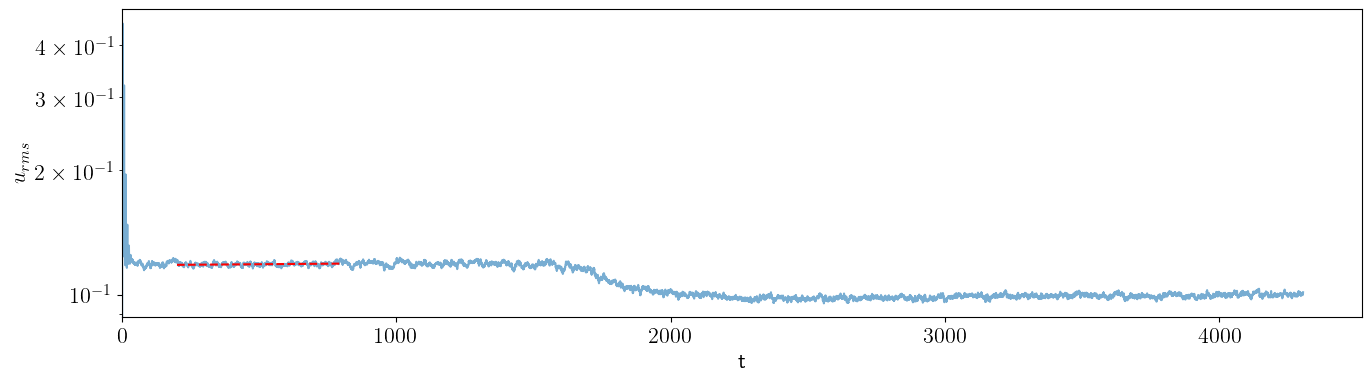

In [29]:
fig = plt.figure(figsize=(16,4))
plt.plot(ts.t, ts.urms, alpha=0.6)
plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [30]:
# tt = yaver.t

# kin_t_d = np.argmin(np.abs(tt - 300))
# kin_t_u = np.argmin(np.abs(tt - 1500))

# sat_t_d = np.argmin(np.abs(tt - 2250))

# tt[-1], ts.t[-1]

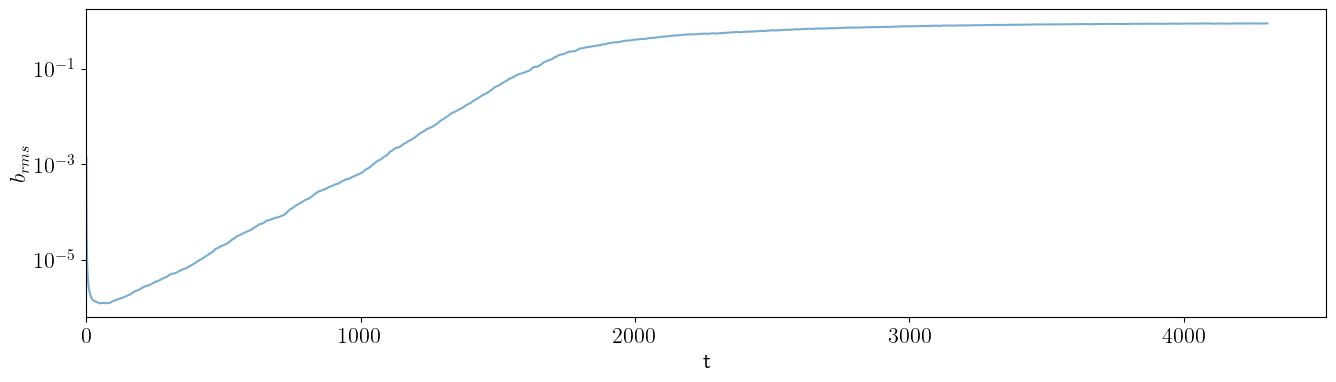

In [31]:
fig = plt.figure(figsize=(16,4))
plt.semilogy(ts.t, ts.brms, alpha=0.6)

# plt.axvline(x=tt[kin_t_d])
# plt.axvline(x=tt[kin_t_u])
#plt.plot(t_fit, u_fit, '--r')
plt.yscale('log')
plt.xlim(0,)
plt.xlabel("t")
plt.ylabel(r"$b_{rms}$")
plt.show()

In [32]:
D = np.round(L0*u_ave/cs_d, 3)
display(Latex(fr'$D$ = {D}'))

<IPython.core.display.Latex object>

## reading yaver.dat 

In [33]:
yaver = pc.read.aver(plane_list='y')

### We can notice that $u_{rms}$ saturates at around $t=100$, hence we will consider $u_z(t,x,z)$ after this $t$    
Here we have taken t=100

In [34]:
uz_real = yaver.y.uzmxz

In [35]:
yaver.t.shape, ts.t.shape

((10764,), (16076,))

In [36]:
size = np.shape(uz_real)
#size
nx = size[1]
nz = size[2]
nt = size[0]

tt = yaver.t
len(grid.x)

400

readding the parameters

In [37]:
param = pc.read.param()

In [38]:
lxyz = param.lxyz   #shape of the box
grz = -param.gravz  #value of g along z direction
cp = param.cp
lx = lxyz[0]
ly = lxyz[1]
lz = lxyz[2]
lz

3.14159

In [39]:
indx_z_surf = 212    #selecting the plane to observe f-modes
indx_t1 = np.argmin(np.abs(tt - 170))  #to avoid the transient effects below t=170
indx_t2 = -1

### kinetic phase

In [40]:
indx_kin_d = np.argmin(np.abs(tt-100))
indx_kin_u = np.argmin(np.abs(tt-1500))

In [41]:
t_gd_kin = tt[indx_kin_d:indx_kin_u]  #time interval where urms has reached a steady state
t_len_kin = np.size(t_gd_kin)

dkx = 2*np.pi/lx    #unit step along kx direction
dom_kin = 2*np.pi/t_len_kin #unit step alomg omega direction

### saturated phase

In [42]:
# indx_sat_d = np.argmin(np.abs(tt-2250))
indx_sat_d = np.argmin(np.abs(tt-2905))
# indx_sat_u = -1
indx_sat_u = np.argmin(np.abs(tt-4305))

In [43]:
tt[indx_sat_u]

4304.801

In [44]:
t_gd_sat = tt[indx_sat_d:indx_sat_u]  #time interval where urms has reached a steady state
t_len_sat = np.size(t_gd_sat)

dkx = 2*np.pi/lx    #unit step along kx direction
dom_sat = 2*np.pi/t_len_sat #unit step alomg omega direction

In [45]:
t_len_kin, t_len_sat

(3500, 3500)

### for the full data

In [46]:
t_gd = tt[indx_t1:indx_t2]  #time interval where urms has reached a steady state
t_len = np.size(t_gd)

dkx = 2*np.pi/lx    #unit step along kx direction
dom = 2*np.pi/t_len #unit step alomg omega direction

In [47]:
len(t_gd)

10338

shape of the data

In [48]:
uz_real[indx_t1:indx_t2,:,indx_z_surf].shape

(10338, 400)

In [205]:
np.shape(uz_real)

(10764, 400, 256)

In [204]:
indx_t1, indx_t2

(425, -1)

### taking fourier transform of $u_z(t,x,z=0)$ to get $\hat{u}_z(\omega,k_x)$

### for full data

In [49]:
uz_fourier = np.fft.fftn(uz_real[indx_t1:indx_t2,:,indx_z_surf], s=None, axes=(-2, -1), norm=None)

In [50]:
uz_fourier.shape

(10338, 400)

### for kinetic phase

In [51]:
# uz_fourier_kin = np.fft.fftn(uz_real[indx_kin_d:indx_kin_u,:,indx_z_surf], s=None, axes=(-2, -1), norm=None)
uz_fourier_kin = np.fft.fftn(uz_real[indx_kin_d:indx_kin_u,:,indx_z_surf], s=None, axes=(-2, -1), norm='ortho')

In [52]:
indx_z_surf

212

In [53]:
# uz_fourier_kin

### for saturated phase

In [54]:
# uz_fourier_sat = np.fft.fftn(uz_real[indx_sat_d:indx_sat_u,:,indx_z_surf], s=None, axes=(-2, -1), norm=None)
uz_fourier_sat = np.fft.fftn(uz_real[indx_sat_d:indx_sat_u,:,indx_z_surf], s=None, axes=(-2, -1), norm='ortho')

In [55]:
np.shape(uz_real[indx_sat_d:indx_sat_u,:,indx_z_surf])

(3500, 400)

# Important

In [56]:
np.shape(uz_real[indx_kin_d:indx_kin_u,:,indx_z_surf])

(3500, 400)

### we can construct the dimensionless quantity 
$\tilde{P}(\omega,k_x)=\frac{|\hat{u}_z|}{D^2}$

In [57]:
logP = np.log(np.abs(uz_fourier/D**2))

### defining $\tilde{k}_x=k_xL_0, \hspace{2mm} \tilde{\omega}=\frac{\omega}{\omega_0}$

In [58]:
D

0.237

In [59]:
if t_len%2 == 0:
    fom = np.arange(0, t_len/2+1)
    rom = -np.flip(np.arange(1, t_len/2))
    om = np.concatenate((fom, rom))*dom
else:
    fom = np.arange(0, t_len/2)
    rom = -np.flip(np.arange(1, t_len/2))
    om = np.concatenate((fom, rom))*dom

In [60]:
if nx%2 == 0:
    fnx = np.arange(0, nx/2+1)
    rnx = -np.flip(np.arange(1, nx/2))
    kx = np.concatenate((fnx, rnx))*dkx
else:
    fnx = np.arange(0, nx/2)
    rnx = -np.flip(np.arange(1, nx/2))
    kx = np.concatenate((fnx, rnx))*dkx

In [61]:
om.shape, kx.shape 

((10338,), (400,))

In [62]:
k_tilde = kx*L0
om_tilde = om/omega0
np.shape(om_tilde), np.shape(k_tilde), np.shape(logP)
# k_tilde

((10338,), (400,), (10338, 400))

### for kinetic phase

In [63]:
if t_len_kin%2 == 0:
    fom_kin = np.arange(0, t_len_kin/2+1)
    indx_kin = len(fom_kin)
    rom_kin = -np.flip(np.arange(1, t_len_kin/2))
    om_kin = np.concatenate((fom_kin, rom_kin))*dom_kin
else:
    fom_kin = np.arange(0, t_len_kin/2)
    indx_kin = len(fom_kin)
    rom_kin = -np.flip(np.arange(1, t_len_kin/2))
    om_kin = np.concatenate((fom_kin, rom_kin))*dom_kin

In [64]:
indx_kin

1751

In [65]:
k_tilde = kx*L0
om_tilde_kin = om_kin/omega0
np.shape(om_tilde_kin), np.shape(k_tilde)#, np.shape(logP_kin)

((3500,), (400,))

### for saturated phase

In [66]:
if t_len_sat%2 == 0:
    fom_sat = np.arange(0, t_len_sat/2+1)
    indx_sat = len(fom_sat)
    rom_sat = -np.flip(np.arange(1, t_len_sat/2))
    om_sat = np.concatenate((fom_sat, rom_sat))*dom_sat
else:
    fom_sat = np.arange(0, t_len_sat/2)
    indx_sat = len(fom_sat)
    rom_sat = -np.flip(np.arange(1, t_len_sat/2))
    om_sat = np.concatenate((fom_sat, rom_sat))*dom_sat

In [67]:
k_tilde = kx*L0
om_tilde_sat = om_sat/omega0
np.shape(om_tilde_sat), np.shape(k_tilde)#, np.shape(logP_kin)

((3500,), (400,))

In [68]:
grz

0.5

### plotting $\tilde{k}_x-\tilde{\omega}$ diagram

In [69]:
# k_tilde

In [70]:
# [X, Y] = np.meshgrid(k_tilde, om_tilde)
# #plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=4, vmax=np.max(logP))
# plt.plot(aa, np.sqrt(grz*aa), 'k')
# plt.plot(aa, np.sqrt(grz*aa*(1-q)/(1+q)), ls='dotted', c='k')
# plt.plot(k_tilde, cs_d*k_tilde, 'k')
# plt.plot(k_tilde, cs_u*k_tilde, 'k')
# # plt.axvline(x=k_tilde[1], c='r')
# # plt.axvline(x=k_tilde[2], c='g')
# # plt.axvline(x=k_tilde[3], c='b')
# # plt.axvline(x=k_tilde[4], c='c')
# plt.xlim(-2*np.pi,2*np.pi)
# plt.ylim(-2*np.pi,2*np.pi)
# # plt.ylim(0,10)
# plt.colorbar()
# plt.xlabel(r"$\tilde{k_x}$")
# plt.ylabel(r"$\tilde{\omega}$")
# plt.savefig('k_om.png')
# plt.show()

In [71]:
#idl, idu

Locator attempting to generate 3322 ticks ([-6.25, ..., 10.355]), which exceeds Locator.MAXTICKS (1000).


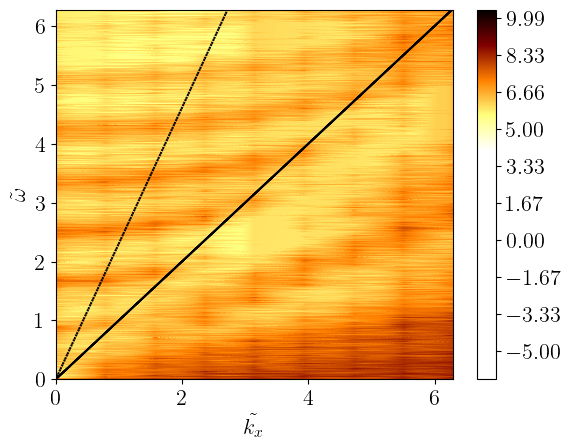

In [72]:
[X, Y] = np.meshgrid(k_tilde, om_tilde)
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r', vmin=4, vmax=np.max(logP))
# plt.plot(aa, np.sqrt(grz*aa), ls='dashdot', c='k')
plt.plot(k_tilde, cs_d*k_tilde, ls='-', c='k')
plt.plot(k_tilde, cs_u*k_tilde, ls=':', c='k')
# plt.axvline(x=2, c='k')
plt.xlim(0,2*np.pi)
plt.ylim(0,2*np.pi)
#plt.ylim(0,10)
plt.colorbar()
plt.xlabel(r"$\tilde{k_x}$")
plt.ylabel(r"$\tilde{\omega}$")
plt.savefig('k_om.png')
plt.show()

In [73]:
idl = np.argmin(np.abs(om_tilde - 0)) 
idu = np.argmin(np.abs(om_tilde - 2*np.pi))
# print(idu), print(idl)

In [74]:
# fig, ax = plt.subplots()
# [X, Y] = np.meshgrid(k_tilde[0:int(nx/2+1)], om_tilde[idl:idu])
# #plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# #cont = ax.contourf(X, Y, logP[idl:idu, 0:int(nx/2+1)], 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# cont = ax.contourf(X, Y, logP[idl:idu, 0:int(nx/2+1)], 4000, cmap='afmhot_r', vmin=4, vmax=np.max(logP))
# #plt.plot(k_tilde, np.sqrt(grz*k_tilde), 'k')
# plt.axvline(x=2, c='k')
# plt.xlim(0,10)
# #plt.ylim(0,10)
# plt.colorbar(cont)
# plt.xlabel(r"$\tilde{k_x}$")
# plt.ylabel(r"$\tilde{\omega}$")
# plt.show()

In [75]:
kx[0]-kx[1]

-0.39269908169872414

### finding $\tilde{P}(\tilde{\omega},\tilde{k}_x=2)$

### total

In [76]:
indx_k = np.argmin(np.abs(k_tilde - .5))
indx_k_1 = np.argmin(np.abs(k_tilde - 1))

In [77]:
k_tilde[indx_k]

0.7869689597242432

In [78]:
P_k12 = np.abs(uz_fourier[:,indx_k]/D**2)
P_k1 = np.abs(uz_fourier[:,indx_k_1]/D**2)

### for kinetic phase

In [79]:
P_k2_kin = np.abs(uz_fourier_kin[:,indx_k]/D**2)

In [80]:
D

0.237

In [81]:
# P_k6_kin = np.abs(uz_fourier_kin[:,6]/D**2)

### for saturated phase

In [82]:
P_k2_sat = np.abs(uz_fourier_sat[:,indx_k]/D**2)

In [83]:
# P_k6_sat = np.abs(uz_fourier_sat[:,6]/D**2)

In [84]:
kz = []
L_sd = np.pi*(5/6)*L0
for i in range(10):
    kz.append(np.pi*(i+0.5)/L_sd)

### plotting $\tilde{P}(\tilde{\omega},\tilde{k_x}=0.5)$ as a function of $\tilde{\omega}$

### total

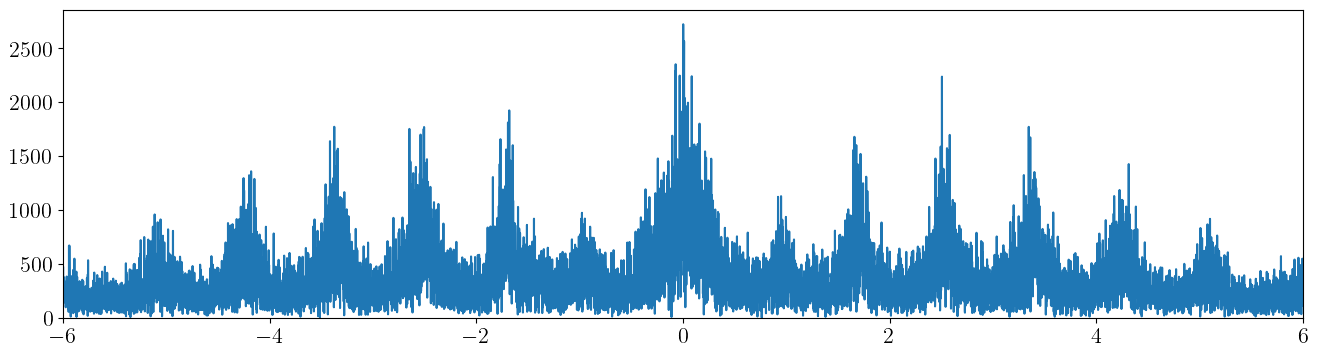

In [85]:
fig = plt.figure(figsize=(16,4))
# for i in range(len(kz)):
#     plt.axvline(x = kz[i], color = 'b')

plt.plot(np.fft.fftshift(om_tilde[1:]), np.fft.fftshift(P_k1[1:]))    # NOTE:Phere we have used the fftshift to 
plt.ylim(0,)                                                                         #Shift the zero-frequency component to the center of the spectrum
plt.xlim(-6, 6)

plt.show()

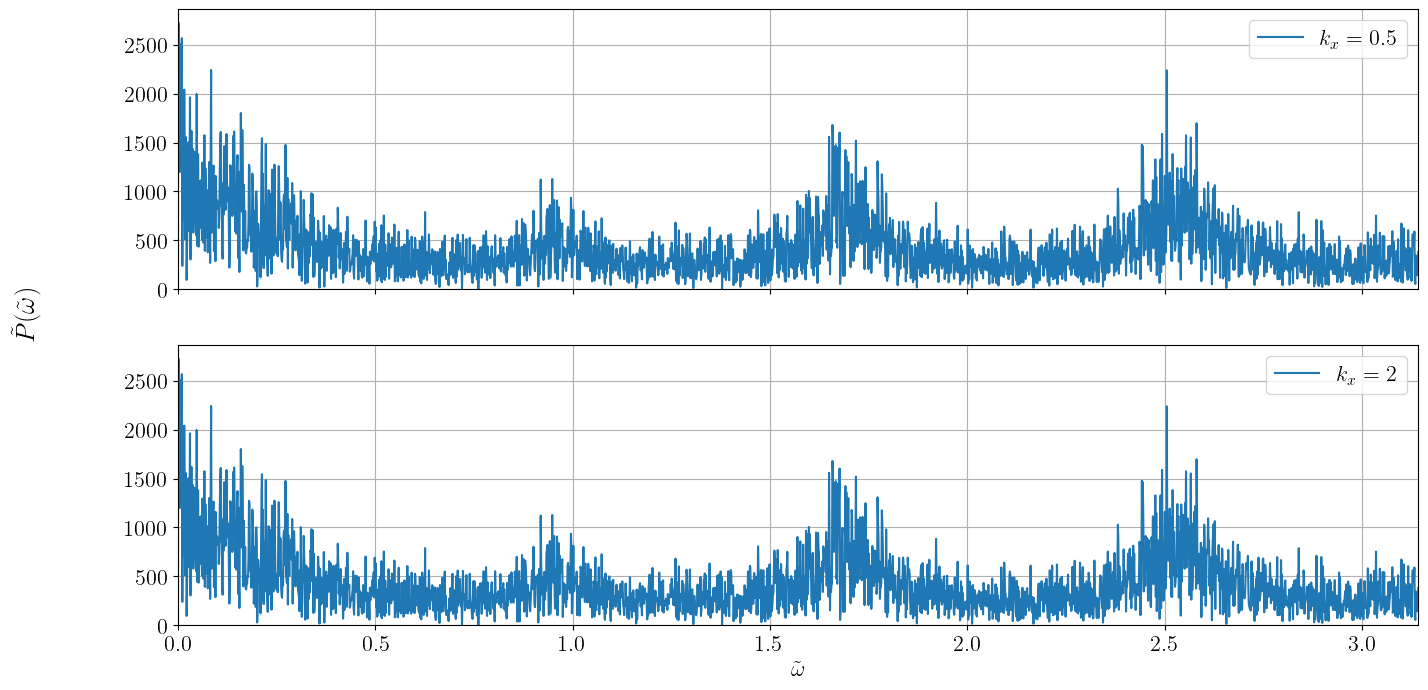

In [86]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=(16,8))

axs[0].plot(om_tilde[idl:idu], P_k12[idl:idu], label=r'$k_x=0.5$')
# for i in range(len(kz)):
#     plt.axvline(x = kz[i], color = 'b')
axs[0].set_xlim(0, np.pi)
axs[0].set_ylim(0,)
axs[0].legend()
axs[0].grid()

axs[1].plot(om_tilde[idl:idu], P_k1[idl:idu], label=r'$k_x=2$')
axs[1].set_ylim(0,)
axs[1].legend()
axs[1].grid()


plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout
plt.show()

### smoothing data

In [87]:
P_k2_kin_filt = gaussian_filter(P_k2_kin[:indx_kin],3)
P_k2_sat_filt = gaussian_filter(P_k2_sat[:indx_sat],3)

In [88]:
bl_kin = baseline(P_k2_kin[:indx_kin], deg=5)
bl_sat = baseline(P_k2_sat[:indx_sat], deg=5)

In [89]:
# fig, axs = plt.subplots(2,1, sharex=True, figsize=(16,8))

# axs[0].plot((om_tilde_kin[:indx_kin]), (P_k2_kin[:indx_kin]), label=r'$kinetic$')
# axs[0].plot((om_tilde_kin[:indx_kin]), bl, label=r'$baseline$')
# # for i in range(len(kz)):
# #     plt.axvline(x = kz[i], color = 'b')
# axs[0].set_xlim(0, 6)
# # axs[0].set_ylim(0,8500)
# axs[0].legend()

# axs[1].plot((om_tilde_sat[:indx_sat]), (P_k2_sat[:indx_sat]), label=r'$saturated$')
# # axs[1].set_ylim(0,8500)
# axs[1].legend()

# plt.xlabel(r"$\tilde{\omega}$")
# fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
# plt.tight_layout()
# plt.show()

In [90]:
np.shape(P_k2_kin[:indx_kin])

(1751,)

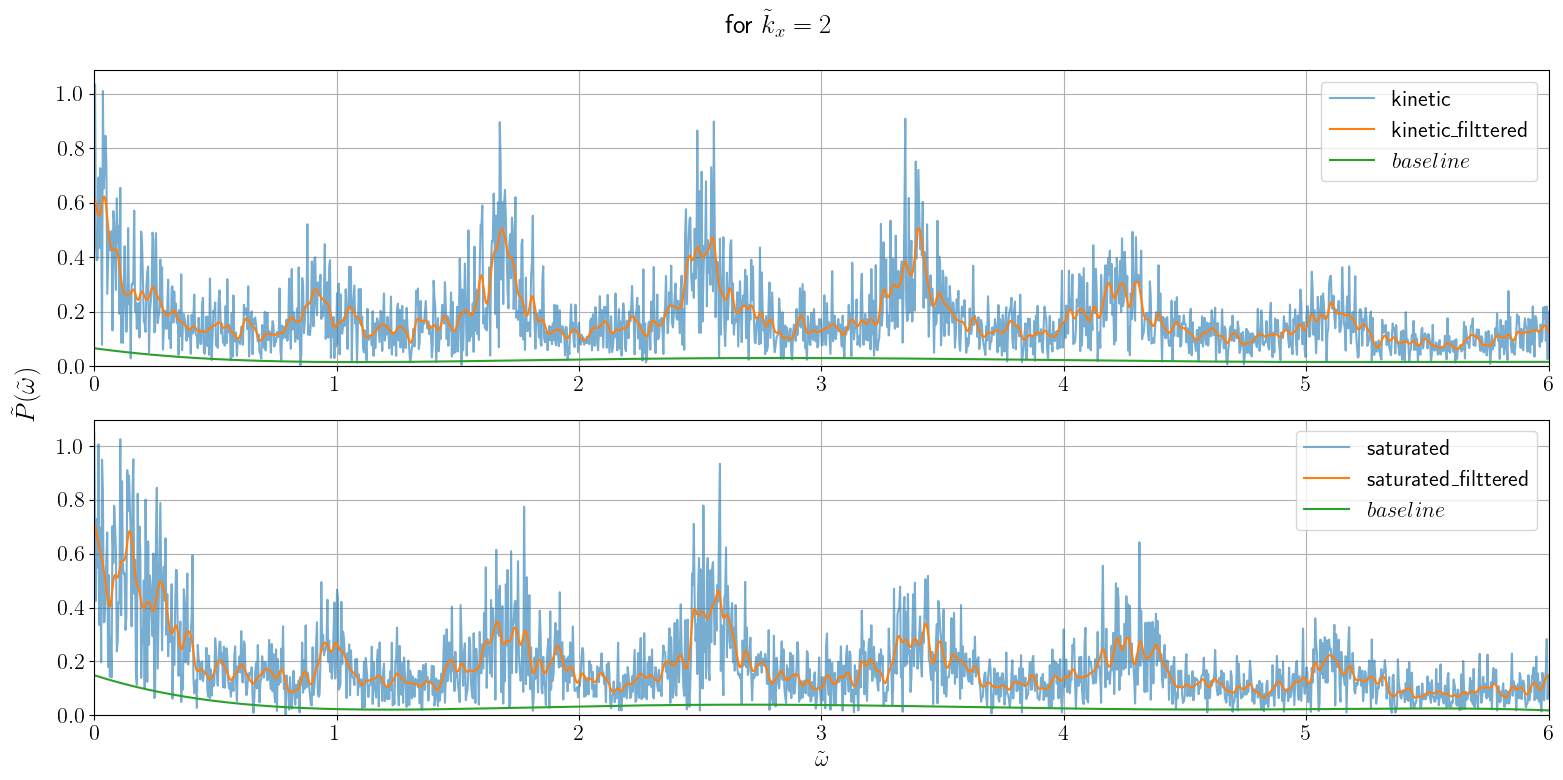

In [91]:
fig, axs = plt.subplots(2,1, figsize=(16,8))#sharex=True,

axs[0].plot((om_tilde_kin[:indx_kin]), (P_k2_kin[:indx_kin]), alpha=0.6, label='kinetic')
axs[0].plot((om_tilde_kin[:indx_kin]), (P_k2_kin_filt[:indx_kin]), label='kinetic_filttered')
axs[0].plot((om_tilde_kin[:indx_kin]), bl_kin, label=r'$baseline$')
# for i in range(len(kz)):
#     plt.axvline(x = kz[i], color = 'b')
axs[0].grid()
axs[0].set_xlim(0, 6)
axs[0].set_ylim(0,)
axs[0].legend()

axs[1].plot((om_tilde_sat[:indx_sat]), (P_k2_sat[:indx_sat]), alpha=0.6, label='saturated')
axs[1].plot((om_tilde_sat[:indx_sat]), (P_k2_sat_filt[:indx_sat]), label='saturated_filttered')
axs[1].plot((om_tilde_sat[:indx_sat]), bl_sat, label=r'$baseline$')
# axs[1].axvline(x=idl_f)
# axs[1].axvline(x=idu_f)
axs[1].grid()
axs[1].set_xlim(0, 6)
axs[1].set_ylim(0,)
axs[1].legend()

# plt.axvline(x=idl_f_kin)
# plt.axvline(x=idu_f_kin)
plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(r"for $\tilde{k}_x=2$")
plt.tight_layout()
plt.show()

## delete this section for using data with baseline

In [92]:
P_k2_kin[:indx_kin] = P_k2_kin[:indx_kin]-bl_kin
P_k2_sat[:indx_sat] = P_k2_sat[:indx_sat]-bl_sat
P_k2_kin_filt = gaussian_filter(P_k2_kin[:indx_kin],3)
P_k2_sat_filt = gaussian_filter(P_k2_sat[:indx_sat],3)

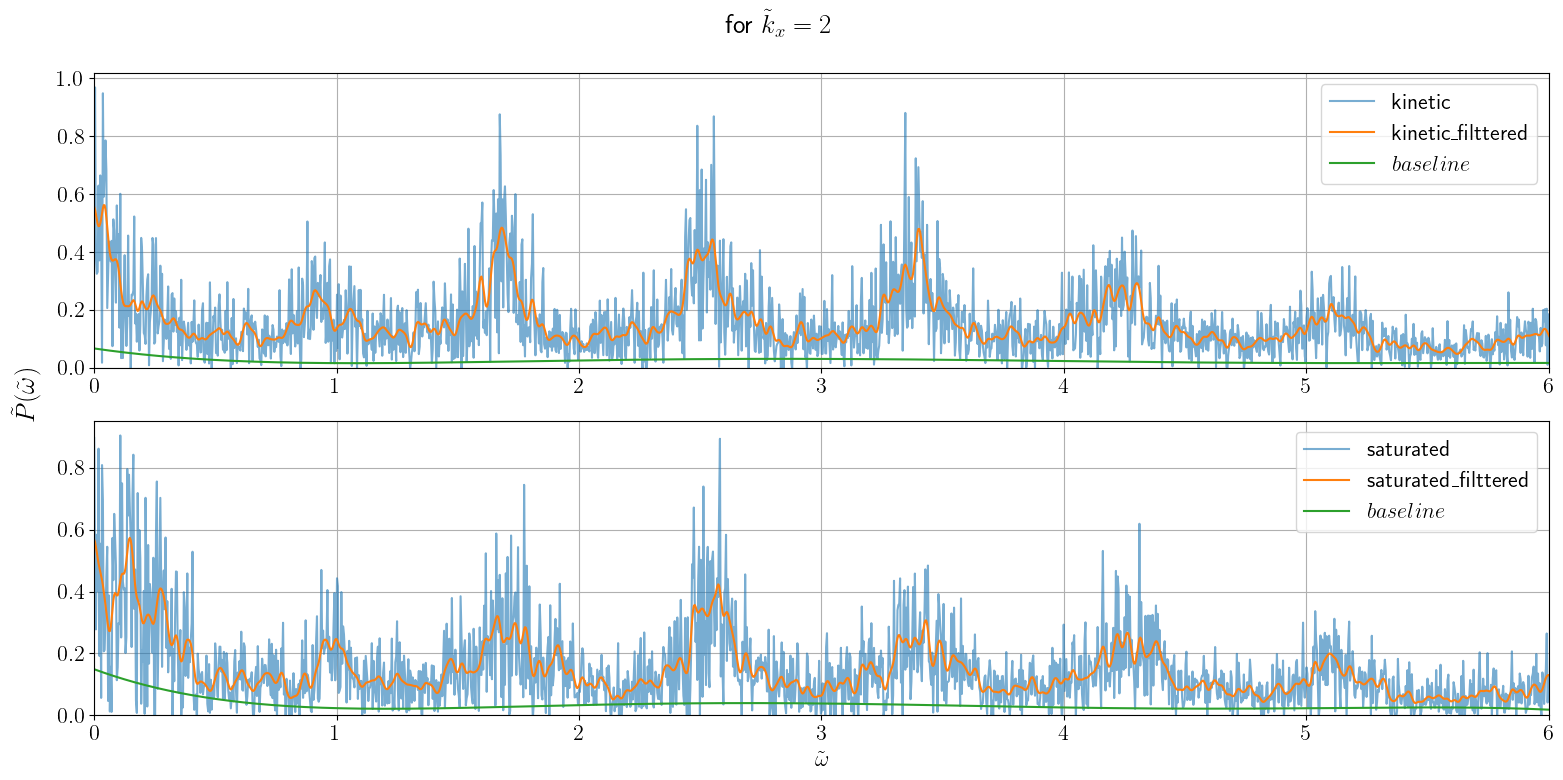

In [93]:
fig, axs = plt.subplots(2,1, figsize=(16,8))#sharex=True,

axs[0].plot((om_tilde_kin[:indx_kin]), (P_k2_kin[:indx_kin]), alpha=0.6, label='kinetic')
axs[0].plot((om_tilde_kin[:indx_kin]), (P_k2_kin_filt[:indx_kin]), label='kinetic_filttered')
axs[0].plot((om_tilde_kin[:indx_kin]), bl_kin, label=r'$baseline$')
# for i in range(len(kz)):
#     plt.axvline(x = kz[i], color = 'b')
axs[0].grid()
axs[0].set_xlim(0, 6)
axs[0].set_ylim(0,)
axs[0].legend()

axs[1].plot((om_tilde_sat[:indx_sat]), (P_k2_sat[:indx_sat]), alpha=0.6, label='saturated')
axs[1].plot((om_tilde_sat[:indx_sat]), (P_k2_sat_filt[:indx_sat]), label='saturated_filttered')
axs[1].plot((om_tilde_sat[:indx_sat]), bl_sat, label=r'$baseline$')
# axs[1].axvline(x=idl_f)
# axs[1].axvline(x=idu_f)
axs[1].grid()
axs[1].set_xlim(0, 6)
axs[1].set_ylim(0,)
axs[1].legend()

# plt.axvline(x=idl_f_kin)
# plt.axvline(x=idu_f_kin)
plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(r"for $\tilde{k}_x=2$")
plt.tight_layout()
plt.show()

## f-modes

### index of f-modes

In [94]:
idl_f_kin = np.argmin(np.abs(om_tilde_kin - 0.65))
idu_f_kin = np.argmin(np.abs(om_tilde_kin - 1.20))

idl_f_sat = np.argmin(np.abs(om_tilde_sat - 0.7))
idu_f_sat = np.argmin(np.abs(om_tilde_sat - 1.25))


In [95]:
sig_tot_kin = (P_k2_kin[:indx_kin]-P_k2_kin_filt[:])**2
sig_kin = np.sqrt(sum(sig_tot_kin)/len(sig_tot_kin))
sig_kin_f = sig_kin*np.ones(len(sig_tot_kin[idl_f_kin:idu_f_kin]))

sig_tot_sat = (P_k2_sat[:indx_sat]-P_k2_sat_filt[:])**2
sig_sat = np.sqrt(sum(sig_tot_sat)/len(sig_tot_sat))
sig_sat_f = sig_sat*np.ones(len(sig_tot_sat[idl_f_sat:idu_f_sat]))

In [96]:
# def lorentzian(x, a, b, c, d):
#     y = a/((x-b)**2+np.exp(c))+d
#     return y

# para_f_kin_lor, cov_f_kin_lor = curve_fit(lorentzian, om_tilde_kin[idl_f_kin:idu_f_kin], P_k2_kin[idl_f_kin:idu_f_kin], p0 = np.array([500,1.93,-2,300]), sigma=sig_kin_f) #sigma=sig_tot[idl_f_kin:idu_f_kin],
# fitted_f_kin_lor = lorentzian(om_tilde_kin[idl_f_kin:idu_f_kin], *para_f_kin_lor)

# para_f_sat_lor, cov_f_sat_lor = curve_fit(lorentzian, om_tilde_sat[idl_f_sat:idu_f_sat], P_k2_sat[idl_f_sat:idu_f_sat], p0 = np.array([500,1.0,-2,300]), sigma=sig_sat_f)#, sigma=sig)#sigma=sig_tot[idl_f_sat:idu_f_sat])
# fitted_f_sat_lor = lorentzian(om_tilde_sat[idl_f_sat:idu_f_sat], *para_f_sat_lor)

## testing with lorentzian plus linear

In [97]:
# def lorentzian(x, a, b, c, d, e):
#     y = a/((x-b)**2+np.exp(c))+d+e*x
#     return y

# para_f_kin_lor, cov_f_kin_lor = curve_fit(lorentzian, om_tilde_kin[idl_f_kin:idu_f_kin], P_k2_kin[idl_f_kin:idu_f_kin], p0 = np.array([0.6,0.93,-2,-7.7,0.4]), sigma=sig_kin_f) #sigma=sig_tot[idl_f_kin:idu_f_kin],
# fitted_f_kin_lor = lorentzian(om_tilde_kin[idl_f_kin:idu_f_kin], *para_f_kin_lor)

# para_f_sat_lor, cov_f_sat_lor = curve_fit(lorentzian, om_tilde_sat[idl_f_sat:idu_f_sat], P_k2_sat[idl_f_sat:idu_f_sat], p0 = np.array([0.6,0.95,-2,-7.7,0.4]), sigma=sig_sat_f)#, sigma=sig)#sigma=sig_tot[idl_f_sat:idu_f_sat])
# fitted_f_sat_lor = lorentzian(om_tilde_sat[idl_f_sat:idu_f_sat], *para_f_sat_lor)

In [98]:
def lorentzian(x, a, b, c, d, e):
    y = a/((x-b)**2+np.exp(c))+d+e*x
    return y

para_f_kin_lor, cov_f_kin_lor = curve_fit(lorentzian, om_tilde_kin[idl_f_kin:idu_f_kin], P_k2_kin[idl_f_kin:idu_f_kin], p0 = np.array([0.6,0.93,-2,-7.7,0.4]), sigma=sig_kin_f) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_f_kin_lor = lorentzian(om_tilde_kin[idl_f_kin:idu_f_kin], *para_f_kin_lor)

para_f_sat_lor, cov_f_sat_lor = curve_fit(lorentzian, om_tilde_sat[idl_f_sat:idu_f_sat], P_k2_sat[idl_f_sat:idu_f_sat], p0 = np.array([0.6,1.05,-2,-7.7,0.4]), sigma=sig_sat_f)#, sigma=sig)#sigma=sig_tot[idl_f_sat:idu_f_sat])
fitted_f_sat_lor = lorentzian(om_tilde_sat[idl_f_sat:idu_f_sat], *para_f_sat_lor)

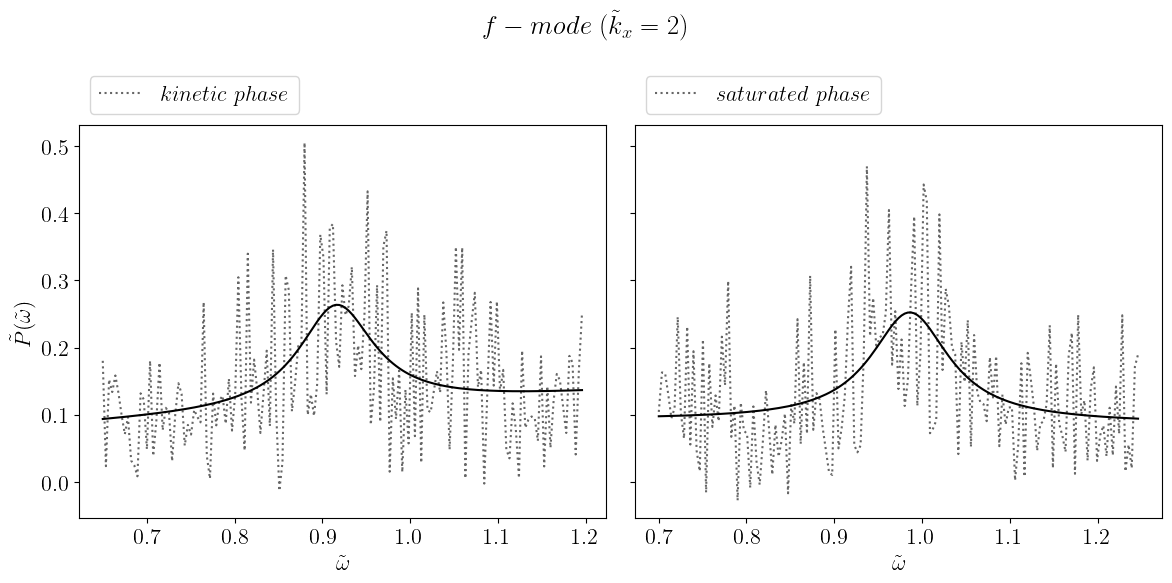

In [99]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(12,6))

axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], P_k2_kin[idl_f_kin:idu_f_kin], color='k', ls=":", alpha=0.6, label=r'$kinetic$ $phase$')
axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k')
axes[0].legend(loc='lower left', bbox_to_anchor=(0.0, 1.0))

axes[1].plot(om_tilde_sat[idl_f_sat:idu_f_sat], P_k2_sat[idl_f_sat:idu_f_sat], color='k', ls=":", alpha=0.6, label=r'$saturated$ $phase$')
axes[1].plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k')
axes[1].legend(loc='lower left', bbox_to_anchor=(0.0, 1.0))

axes[0].set_xlabel(r"$\tilde{\omega}$")
axes[1].set_xlabel(r"$\tilde{\omega}$")
axes[0].set_ylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(r"$f-mode$ $(\tilde{k}_x=2)$")
plt.tight_layout()
plt.show()

### testing my function

In [100]:
def mode_fit(func,x_data,y_data,base=True,**kwargs):
    para, _ = curve_fit(func, x_data, y_data, **kwargs)
    y_fit = func(x_data, *para)
    if base:
        y = y_fit
    else:
        y = y_fit-x_data*para[4]-para[3]
    return y

In [101]:
# y_test1 = mode_fit(lorentzian, om_tilde_kin[idl_f_kin:idu_f_kin], P_k2_kin[idl_f_kin:idu_f_kin], p0 = np.array([0.6,0.93,-2,-7.7,0.4]), sigma=sig_kin_f,base=False)
# y_test2 = mode_fit(lorentzian, om_tilde_sat[idl_f_sat:idu_f_sat], P_k2_sat[idl_f_sat:idu_f_sat], p0 = np.array([0.6,0.93,-2,-7.7,0.4]), sigma=sig_sat_f,base=False)

In [102]:
y_test1 = mode_fit(lorentzian, om_tilde_kin[idl_f_kin:idu_f_kin], P_k2_kin[idl_f_kin:idu_f_kin], p0 = np.array([0.6,0.93,-2,-7.7,0.4]))#, sigma=sig_kin_f,base=False)
y_test2 = mode_fit(lorentzian, om_tilde_sat[idl_f_sat:idu_f_sat], P_k2_sat[idl_f_sat:idu_f_sat], p0 = np.array([0.6,1.05,-2,-7.7,0.4]))#, sigma=sig_sat_f,base=False)

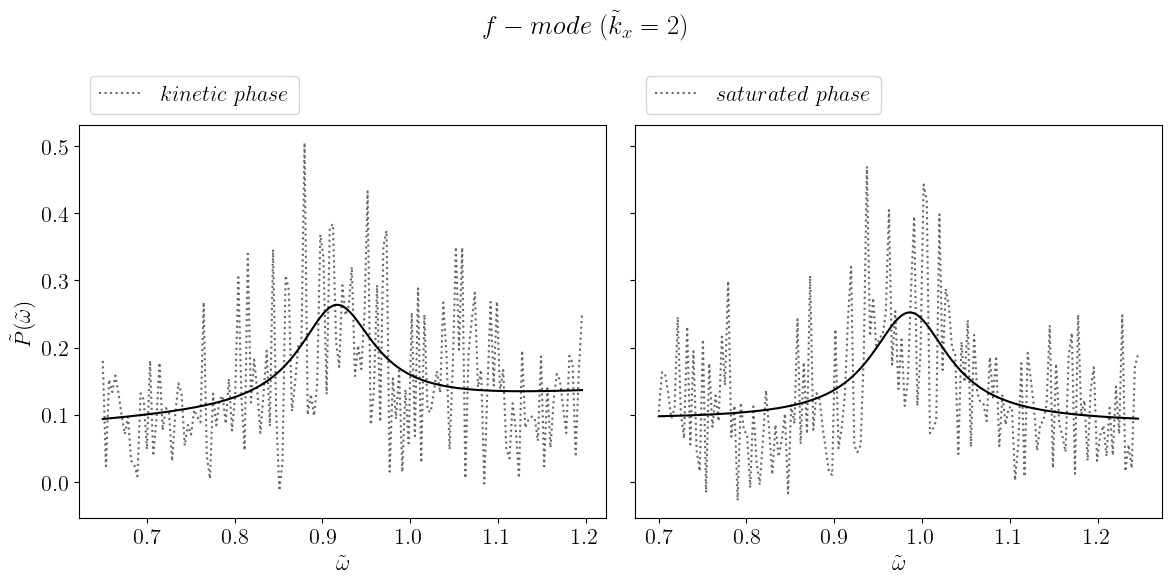

In [103]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(12,6))

axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], P_k2_kin[idl_f_kin:idu_f_kin], color='k', ls=":", alpha=0.6, label=r'$kinetic$ $phase$')
axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], y_test1, color='k')
axes[0].legend(loc='lower left', bbox_to_anchor=(0.0, 1.0))

axes[1].plot(om_tilde_sat[idl_f_sat:idu_f_sat], P_k2_sat[idl_f_sat:idu_f_sat], color='k', ls=":", alpha=0.6, label=r'$saturated$ $phase$')
axes[1].plot(om_tilde_sat[idl_f_sat:idu_f_sat], y_test2, color='k')
axes[1].legend(loc='lower left', bbox_to_anchor=(0.0, 1.0))

axes[0].set_xlabel(r"$\tilde{\omega}$")
axes[1].set_xlabel(r"$\tilde{\omega}$")
axes[0].set_ylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(r"$f-mode$ $(\tilde{k}_x=2)$")
plt.tight_layout()
plt.show()

### end

In [104]:
fit_f_k = fitted_f_kin_lor-para_f_kin_lor[3]-om_tilde_kin[idl_f_kin:idu_f_kin]*para_f_kin_lor[4]
fit_f_s = fitted_f_sat_lor-para_f_sat_lor[3]-om_tilde_sat[idl_f_sat:idu_f_sat]*para_f_sat_lor[4]

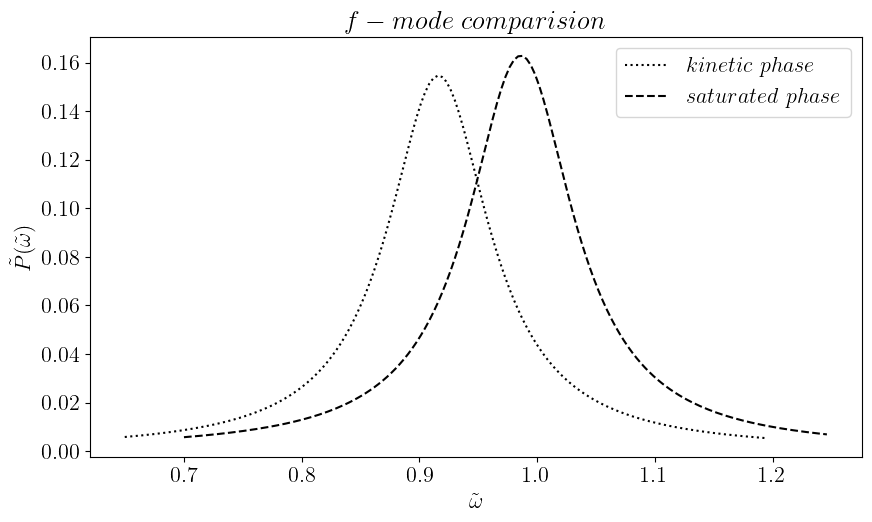

In [105]:
fig, ax = plt.subplots(1,1, sharey=True, figsize=(9,5.5))

ax.plot(om_tilde_kin[idl_f_kin:idu_f_kin], fit_f_k, ls=':', color='k', label=r'$kinetic$ $phase$')#fitted_f_kin_lor-para_f_kin_lor[3],
ax.plot(om_tilde_sat[idl_f_sat:idu_f_sat], fit_f_s, ls='--', color='k', label=r'$saturated$ $phase$')#fitted_f_sat_lor-para_f_sat_lor[3]

plt.legend()
plt.xlabel(r"$\tilde{\omega}$")
plt.ylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.title(r"$f-mode$ $comparision$")
plt.tight_layout()
plt.show()

## index of p-modes

evaluating index

In [106]:
# fig, axs = plt.subplots(2,1, figsize=(16,8))#sharex=True,

# axs[0].plot((om_tilde_kin[:indx_kin]), (P_k2_kin[:indx_kin]), alpha=0.6, label='kinetic')
# axs[0].plot((om_tilde_kin[:indx_kin]), (P_k2_kin_filt[:indx_kin]), label='kinetic_filttered')
# # for i in range(len(kz)):
# #     plt.axvline(x = kz[i], color = 'b')
# axs[0].grid()
# axs[0].set_xlim(0, 6)
# axs[0].set_ylim(0,)
# axs[0].legend()

# axs[1].plot((om_tilde_sat[:indx_sat]), (P_k2_sat[:indx_sat]), alpha=0.6, label='saturated')
# axs[1].plot((om_tilde_sat[:indx_sat]), (P_k2_sat_filt[:indx_sat]), label='saturated_filttered')
# # axs[1].axvline(x=idl_f)
# # axs[1].axvline(x=idu_f)
# axs[1].grid()
# axs[1].set_xlim(0, 6)
# axs[1].set_ylim(0,)
# axs[1].legend()

# # plt.axvline(x=idl_f_kin)
# # plt.axvline(x=idu_f_kin)
# plt.xlabel(r"$\tilde{\omega}$")
# fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
# plt.suptitle(r"for $\tilde{k}_x=2$")
# plt.tight_layout()
# plt.show()

## p-modes

### for kinetic phase

index of p-modes

In [107]:
idl_p1_kin = np.argmin(np.abs(om_tilde_kin - 1.2))
idu_p1_kin = np.argmin(np.abs(om_tilde_kin - 2.2))

idl_p2_kin = np.argmin(np.abs(om_tilde_kin - 2.0))
idu_p2_kin = np.argmin(np.abs(om_tilde_kin - 3.1))

idl_p3_kin = np.argmin(np.abs(om_tilde_kin - 2.9))
idu_p3_kin = np.argmin(np.abs(om_tilde_kin - 3.9))

idl_p4_kin = np.argmin(np.abs(om_tilde_kin - 3.8))
idu_p4_kin = np.argmin(np.abs(om_tilde_kin - 4.65))

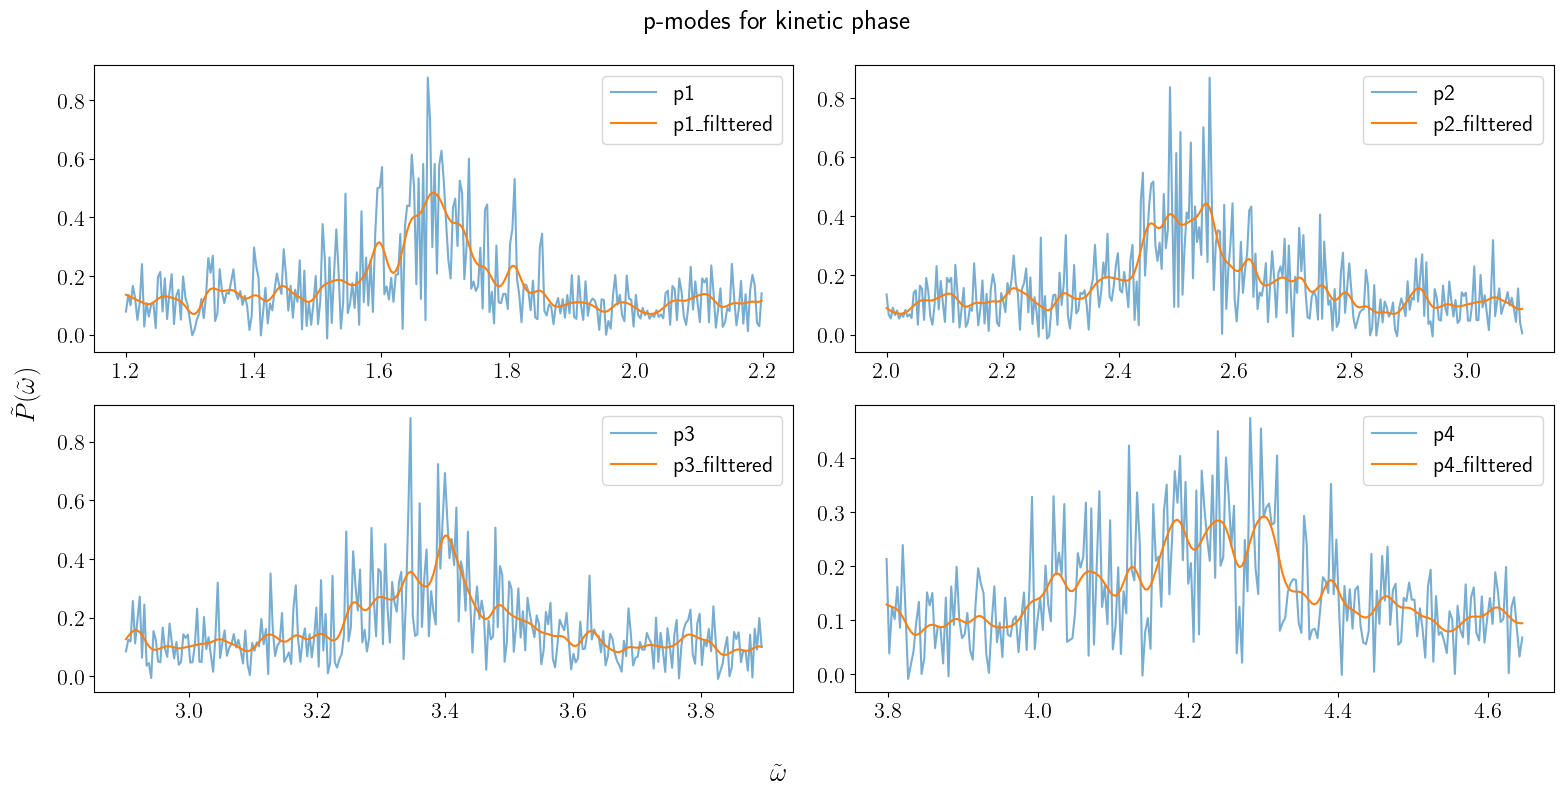

In [108]:
fig, axs = plt.subplots(2,2, figsize=(16,8))

axs[0,0].plot((om_tilde_kin[idl_p1_kin:idu_p1_kin]), (P_k2_kin[idl_p1_kin:idu_p1_kin]), alpha=0.6, label='p1')
axs[0,0].plot((om_tilde_kin[idl_p1_kin:idu_p1_kin]), (P_k2_kin_filt[idl_p1_kin:idu_p1_kin]), label='p1_filttered')
axs[0,0].legend()
axs[0,1].plot((om_tilde_kin[idl_p2_kin:idu_p2_kin]), (P_k2_kin[idl_p2_kin:idu_p2_kin]), alpha=0.6, label='p2')
axs[0,1].plot((om_tilde_kin[idl_p2_kin:idu_p2_kin]), (P_k2_kin_filt[idl_p2_kin:idu_p2_kin]), label='p2_filttered')
axs[0,1].legend()
axs[1,0].plot((om_tilde_kin[idl_p3_kin:idu_p3_kin]), (P_k2_kin[idl_p3_kin:idu_p3_kin]), alpha=0.6, label='p3')
axs[1,0].plot((om_tilde_kin[idl_p3_kin:idu_p3_kin]), (P_k2_kin_filt[idl_p3_kin:idu_p3_kin]), label='p3_filttered')
axs[1,0].legend()
axs[1,1].plot((om_tilde_kin[idl_p4_kin:idu_p4_kin]), (P_k2_kin[idl_p4_kin:idu_p4_kin]), alpha=0.6, label='p4')
axs[1,1].plot((om_tilde_kin[idl_p4_kin:idu_p4_kin]), (P_k2_kin_filt[idl_p4_kin:idu_p4_kin]), label='p4_filttered')
axs[1,1].legend()

plt.suptitle('p-modes for kinetic phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

In [109]:
sig_kin_p1 = sig_kin*np.ones(len(sig_tot_kin[idl_p1_kin:idu_p1_kin]))
sig_kin_p2 = sig_kin*np.ones(len(sig_tot_kin[idl_p2_kin:idu_p2_kin]))
sig_kin_p3 = sig_kin*np.ones(len(sig_tot_kin[idl_p3_kin:idu_p3_kin]))
sig_kin_p4 = sig_kin*np.ones(len(sig_tot_kin[idl_p4_kin:idu_p4_kin]))

In [110]:
# , bounds=((100,1,-np.inf,0,0),(800,2,2,400,0.2))

### fitting different p-modes for kinetic phase

In [111]:
para_p1_kin_lor, cov_p1_kin_lor = curve_fit(lorentzian, om_tilde_kin[idl_p1_kin:idu_p1_kin], P_k2_kin[idl_p1_kin:idu_p1_kin], p0 = np.array([2,1.6,-2,100,0.1]), sigma=sig_kin_p1, bounds=((0,1,-np.inf,0,-50),(10,2,2,400,20))) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_p1_kin_lor = lorentzian(om_tilde_kin[idl_p1_kin:idu_p1_kin], *para_p1_kin_lor)
para_p2_kin_lor, cov_p2_kin_lor = curve_fit(lorentzian, om_tilde_kin[idl_p2_kin:idu_p2_kin], P_k2_kin[idl_p2_kin:idu_p2_kin], p0 = np.array([600,2.50,-2,400,0.1]), sigma=sig_kin_p2) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_p2_kin_lor = lorentzian(om_tilde_kin[idl_p2_kin:idu_p2_kin], *para_p2_kin_lor)
para_p3_kin_lor, cov_p3_kin_lor = curve_fit(lorentzian, om_tilde_kin[idl_p3_kin:idu_p3_kin], P_k2_kin[idl_p3_kin:idu_p3_kin], p0 = np.array([600,3.40,-2,400,0.1]), sigma=sig_kin_p3) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_p3_kin_lor = lorentzian(om_tilde_kin[idl_p3_kin:idu_p3_kin], *para_p3_kin_lor)
para_p4_kin_lor, cov_p4_kin_lor = curve_fit(lorentzian, om_tilde_kin[idl_p4_kin:idu_p4_kin], P_k2_kin[idl_p4_kin:idu_p4_kin], p0 = np.array([400,4.20,-2,400,0.1]), sigma=sig_kin_p4) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_p4_kin_lor = lorentzian(om_tilde_kin[idl_p4_kin:idu_p4_kin], *para_p4_kin_lor)

In [112]:
# para_p1_kin_lor, para_p2_kin_lor

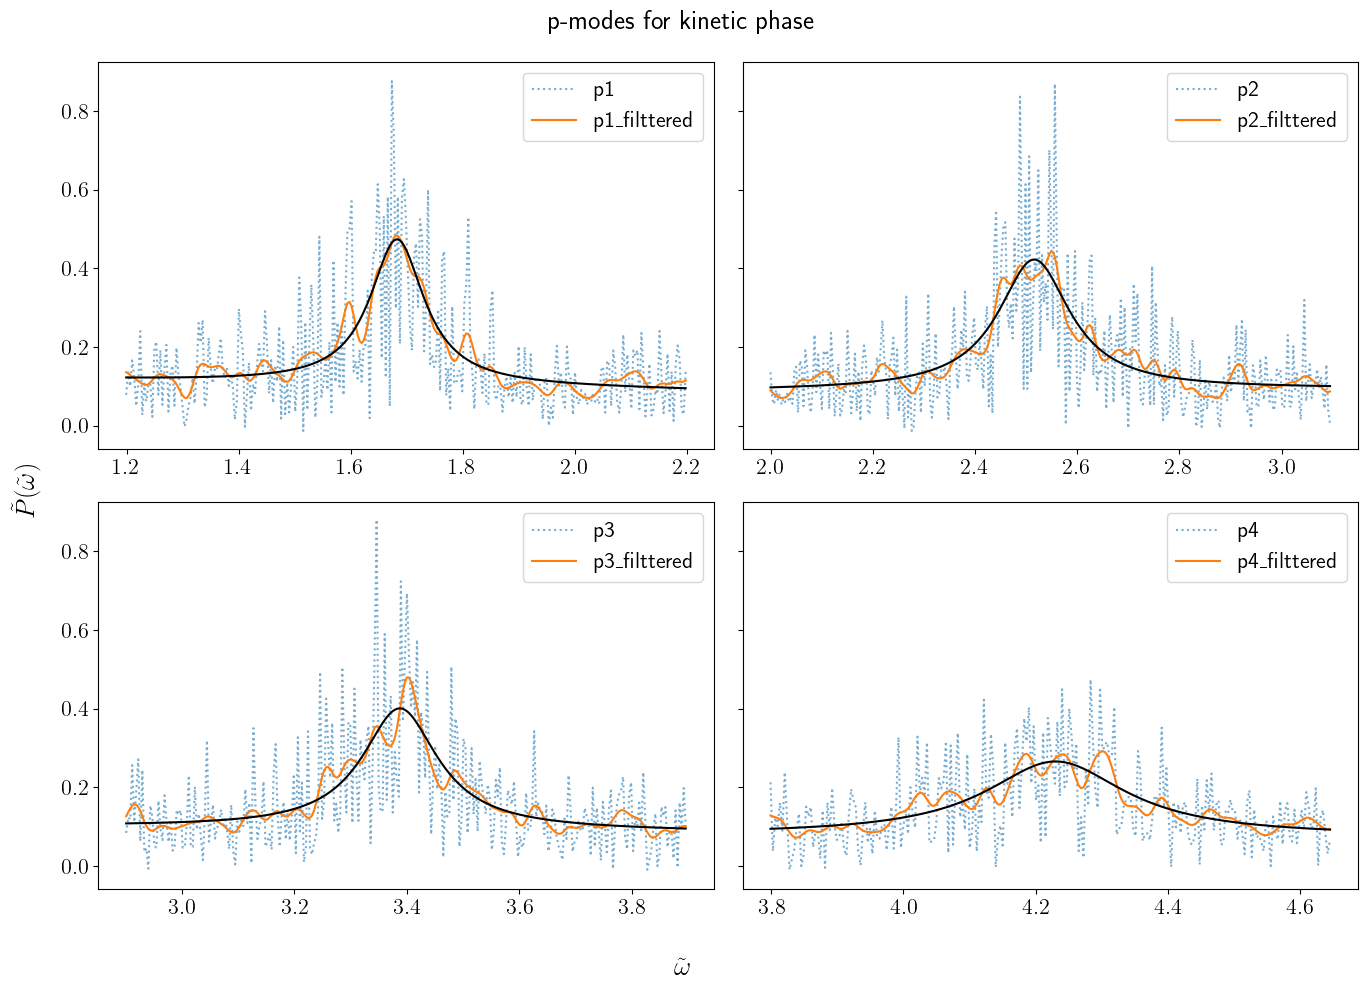

In [113]:
fig, axs = plt.subplots(2,2, sharey=True, figsize=(14,10))

axs[0,0].plot((om_tilde_kin[idl_p1_kin:idu_p1_kin]), (P_k2_kin[idl_p1_kin:idu_p1_kin]), ls=":", alpha=0.6, label='p1')
axs[0,0].plot((om_tilde_kin[idl_p1_kin:idu_p1_kin]), (P_k2_kin_filt[idl_p1_kin:idu_p1_kin]), label='p1_filttered')
axs[0,0].plot((om_tilde_kin[idl_p1_kin:idu_p1_kin]), fitted_p1_kin_lor, color='k')
# axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k')
axs[0,0].legend()

axs[0,1].plot((om_tilde_kin[idl_p2_kin:idu_p2_kin]), (P_k2_kin[idl_p2_kin:idu_p2_kin]), ls=":", alpha=0.6, label='p2')
axs[0,1].plot((om_tilde_kin[idl_p2_kin:idu_p2_kin]), (P_k2_kin_filt[idl_p2_kin:idu_p2_kin]), label='p2_filttered')
axs[0,1].plot((om_tilde_kin[idl_p2_kin:idu_p2_kin]), fitted_p2_kin_lor, color='k')
axs[0,1].legend()

axs[1,0].plot((om_tilde_kin[idl_p3_kin:idu_p3_kin]), (P_k2_kin[idl_p3_kin:idu_p3_kin]), ls=":", alpha=0.6, label='p3')
axs[1,0].plot((om_tilde_kin[idl_p3_kin:idu_p3_kin]), (P_k2_kin_filt[idl_p3_kin:idu_p3_kin]), label='p3_filttered')
axs[1,0].plot((om_tilde_kin[idl_p3_kin:idu_p3_kin]), fitted_p3_kin_lor, color='k')
axs[1,0].legend()

axs[1,1].plot((om_tilde_kin[idl_p4_kin:idu_p4_kin]), (P_k2_kin[idl_p4_kin:idu_p4_kin]), ls=":", alpha=0.6, label='p4')
axs[1,1].plot((om_tilde_kin[idl_p4_kin:idu_p4_kin]), (P_k2_kin_filt[idl_p4_kin:idu_p4_kin]), label='p4_filttered')
axs[1,1].plot((om_tilde_kin[idl_p4_kin:idu_p4_kin]), fitted_p4_kin_lor, color='k')
axs[1,1].legend()

plt.suptitle('p-modes for kinetic phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

## testing

In [114]:
# idl_p2_kin_1 = np.argmin(np.abs(om_tilde_kin - 2.05))
# idu_p2_kin_1 = np.argmin(np.abs(om_tilde_kin - 3.0))

# idl_p2_kin_2 = np.argmin(np.abs(om_tilde_kin - 2.05))
# idu_p2_kin_2 = np.argmin(np.abs(om_tilde_kin - 3.1))

# idl_p2_kin_3 = np.argmin(np.abs(om_tilde_kin - 2.3))
# idu_p2_kin_3 = np.argmin(np.abs(om_tilde_kin - 3.25))

# idl_p2_kin_4 = np.argmin(np.abs(om_tilde_kin - 2.5))
# idu_p2_kin_4 = np.argmin(np.abs(om_tilde_kin - 3.45))

In [115]:
# P_k_kin = np.zeros([4,uz_fourier_kin[:,:].shape[0]])
# P_k_kin_filt = np.empty([4, P_k_kin[:,:indx_kin].shape[1]])

In [116]:
# sig_tot_kin = np.empty([4, P_k_kin[:,:indx_kin].shape[1]])
# sig_kin_p2_1 = np.empty([P_k_kin[:,idl_p2_kin_1:idu_p2_kin_1].shape[1]])
# sig_kin_p2 = np.empty(4)

# sig_tot_kin.shape, sig_kin_p2_1.shape

In [117]:
# for i in range(0,4):
#     P_k_kin[i,:] = np.abs(uz_fourier_kin[:,i+1]/D**2)
#     P_k_kin_filt[i,:] = gaussian_filter(P_k_kin[i,:indx_kin],3)
#     sig_tot_kin[i,:] = (P_k_kin[i,:indx_kin]-P_k_kin_filt[i,:])**2
#     sig_kin_p2[i] = np.sqrt(sum(sig_tot_kin[i,:])/len(sig_tot_kin[i,:]))

# sig_kin_p2_1 = sig_kin_p2[0]*np.ones(len(sig_tot_kin[0,idl_p2_kin_1:idu_p2_kin_1]))
# sig_kin_p2_2 = sig_kin_p2[1]*np.ones(len(sig_tot_kin[1,idl_p2_kin_2:idu_p2_kin_2]))
# sig_kin_p2_3 = sig_kin_p2[2]*np.ones(len(sig_tot_kin[2,idl_p2_kin_3:idu_p2_kin_3]))
# sig_kin_p2_4 = sig_kin_p2[3]*np.ones(len(sig_tot_kin[3,idl_p2_kin_4:idu_p2_kin_4]))

In [118]:
# ,idl_p2_kin_1:idu_p2_kin_1
# ,idl_p2_kin_2:idu_p2_kin_2
# ,idl_p2_kin_3:idu_p2_kin_3
# ,idl_p2_kin_4:idu_p2_kin_4

In [119]:
# fig, axs = plt.subplots(2,2, figsize=(16,8))

# axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), (P_k_kin[0,idl_p2_kin_1:idu_p2_kin_1]), alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')
# axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), (P_k_kin_filt[0,idl_p2_kin_1:idu_p2_kin_1]), label=r'$filttered$')
# axs[0,0].legend()
# axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), (P_k_kin[1,idl_p2_kin_2:idu_p2_kin_2]), alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')
# axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), (P_k_kin_filt[1,idl_p2_kin_2:idu_p2_kin_2]), label=r'$filttered$')
# axs[0,1].legend()
# axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), (P_k_kin[2,idl_p2_kin_3:idu_p2_kin_3]), alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')
# axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), (P_k_kin_filt[2,idl_p2_kin_3:idu_p2_kin_3]), label=r'$filttered$')
# axs[1,0].legend()
# axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), (P_k_kin[3,idl_p2_kin_4:idu_p2_kin_4]), alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')
# axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), (P_k_kin_filt[3,idl_p2_kin_4:idu_p2_kin_4]), label=r'$filttered$')
# axs[1,1].legend()

# plt.suptitle('p-modes for saturated phase')
# fig.supxlabel(r"$\tilde{\omega}$")
# fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
# plt.tight_layout()
# plt.show()

In [120]:
# para_p2_kin_lor_1, cov_p2_kin_lor_1 = curve_fit(lorentzian, om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1], P_k_kin[0,idl_p2_kin_1:idu_p2_kin_1], p0 = np.array([2,2.5,-2,100,2]), sigma=sig_kin_p2_1)#, bounds=((0,1,-np.inf,0,-50),(10,2,2,400,20))) #sigma=sig_tot[idl_f_kin:idu_f_kin],
# fitted_p2_kin_lor_1 = lorentzian(om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1], *para_p2_kin_lor_1)

# para_p2_kin_lor_2, cov_p2_kin_lor_2 = curve_fit(lorentzian, om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2], P_k_kin[1,idl_p2_kin_2:idu_p2_kin_2], p0 = np.array([2,2.6,-2,100,2]), sigma=sig_kin_p2_2) #sigma=sig_tot[idl_f_kin:idu_f_kin],
# fitted_p2_kin_lor_2 = lorentzian(om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2], *para_p2_kin_lor_2)

# para_p2_kin_lor_3, cov_p2_kin_lor_3 = curve_fit(lorentzian, om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3], P_k_kin[2,idl_p2_kin_3:idu_p2_kin_3], p0 = np.array([2,2.8,-2,100,0.1]), sigma=sig_kin_p2_3) #sigma=sig_tot[idl_f_kin:idu_f_kin],
# fitted_p2_kin_lor_3 = lorentzian(om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3], *para_p2_kin_lor_3)

# para_p2_kin_lor_4, cov_p2_kin_lor_4 = curve_fit(lorentzian, om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4], P_k_kin[3,idl_p2_kin_4:idu_p2_kin_4], p0 = np.array([2,3.0,-2,100,0.1]), sigma=sig_kin_p2_4) #sigma=sig_tot[idl_f_kin:idu_f_kin],
# fitted_p2_kin_lor_4 = lorentzian(om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4], *para_p2_kin_lor_4)

In [121]:
# para_p2_kin_lor_1, para_p2_kin_lor_2, para_p2_kin_lor_3, para_p2_kin_lor_4

In [122]:
# fig, axs = plt.subplots(2,2, figsize=(16,8))

# axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), (P_k_kin[0,idl_p2_kin_1:idu_p2_kin_1]), alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')
# axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), (P_k_kin_filt[0,idl_p2_kin_1:idu_p2_kin_1]), label=r'$filttered$')
# axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), fitted_p2_kin_lor_1, color='k')
# axs[0,0].legend()
# axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), (P_k_kin[1,idl_p2_kin_2:idu_p2_kin_2]), alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')
# axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), (P_k_kin_filt[1,idl_p2_kin_2:idu_p2_kin_2]), label=r'$filttered$')
# axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), fitted_p2_kin_lor_2, color='k')
# axs[0,1].legend()
# axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), (P_k_kin[2,idl_p2_kin_3:idu_p2_kin_3]), alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')
# axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), (P_k_kin_filt[2,idl_p2_kin_3:idu_p2_kin_3]), label=r'$filttered$')
# axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), fitted_p2_kin_lor_3, color='k')
# axs[1,0].legend()
# axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), (P_k_kin[3,idl_p2_kin_4:idu_p2_kin_4]), alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')
# axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), (P_k_kin_filt[3,idl_p2_kin_4:idu_p2_kin_4]), label=r'$filttered$')
# axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), fitted_p2_kin_lor_4, color='k')
# axs[1,1].legend()

# # plt.suptitle('p-modes for saturated phase')
# fig.supxlabel(r"$\tilde{\omega}$")
# fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
# plt.tight_layout()
# plt.show()

## end

In [123]:
id_om_kin0 = np.argmin(np.abs(om_tilde_kin - para_f_kin_lor[1]))
for i in range(1,5):
    exec(f'id_om_kin{i} = np.argmin(np.abs(om_tilde_kin - para_p{i}_kin_lor[1]))')

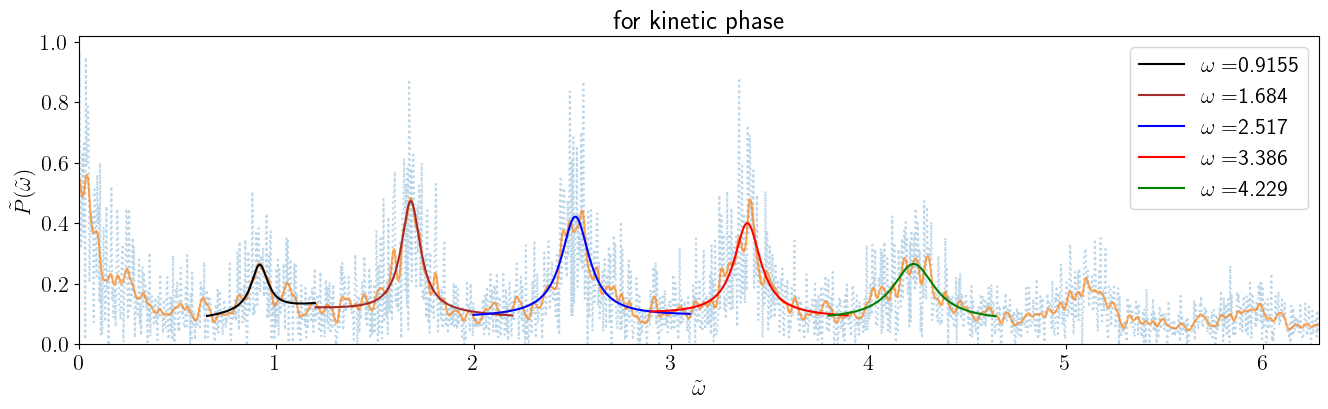

In [124]:
fig = plt.figure(figsize=(16,4))

plt.plot(om_tilde_kin[:indx_kin], P_k2_kin[:indx_kin], ls=':', alpha=0.3)
plt.plot((om_tilde_kin[:indx_kin]), (P_k2_kin_filt[:indx_kin]), alpha=0.7)

plt.plot(om_tilde_kin[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k', label=f'$\\omega=${om_tilde_kin[id_om_kin0]:.4g}')
plt.plot(om_tilde_kin[idl_p1_kin:idu_p1_kin], fitted_p1_kin_lor, color='brown', label=fr'$\omega=${om_tilde_kin[id_om_kin1]:.4g}')
plt.plot(om_tilde_kin[idl_p2_kin:idu_p2_kin], fitted_p2_kin_lor, color='b', label=fr'$\omega=${om_tilde_kin[id_om_kin2]:.4g}')
plt.plot(om_tilde_kin[idl_p3_kin:idu_p3_kin], fitted_p3_kin_lor, color='r', label=fr'$\omega=${om_tilde_kin[id_om_kin3]:.4g}')
plt.plot(om_tilde_kin[idl_p4_kin:idu_p4_kin], fitted_p4_kin_lor, color='g', label=fr'$\omega=${om_tilde_kin[id_om_kin4]:.4g}')

plt.xlim(0, 2*np.pi)
plt.ylim(0,)
plt.legend(bbox_to_anchor=[1,1], loc='best')

plt.title('for kinetic phase')
plt.xlabel(r"$\tilde{\omega}$")
plt.ylabel(r"$\tilde{P}(\tilde{\omega})$")
#plt.tight_layout
plt.show()

end

### for saturated phase

index of p-modes

In [125]:
idl_p1_sat = np.argmin(np.abs(om_tilde_sat - 1.2))
idu_p1_sat = np.argmin(np.abs(om_tilde_sat - 2.2))

idl_p2_sat = np.argmin(np.abs(om_tilde_sat - 2.0))
idu_p2_sat = np.argmin(np.abs(om_tilde_sat - 3.1))

idl_p3_sat = np.argmin(np.abs(om_tilde_sat - 2.9))
idu_p3_sat = np.argmin(np.abs(om_tilde_sat - 3.9))

idl_p4_sat = np.argmin(np.abs(om_tilde_sat - 3.8))
idu_p4_sat = np.argmin(np.abs(om_tilde_sat - 4.65))

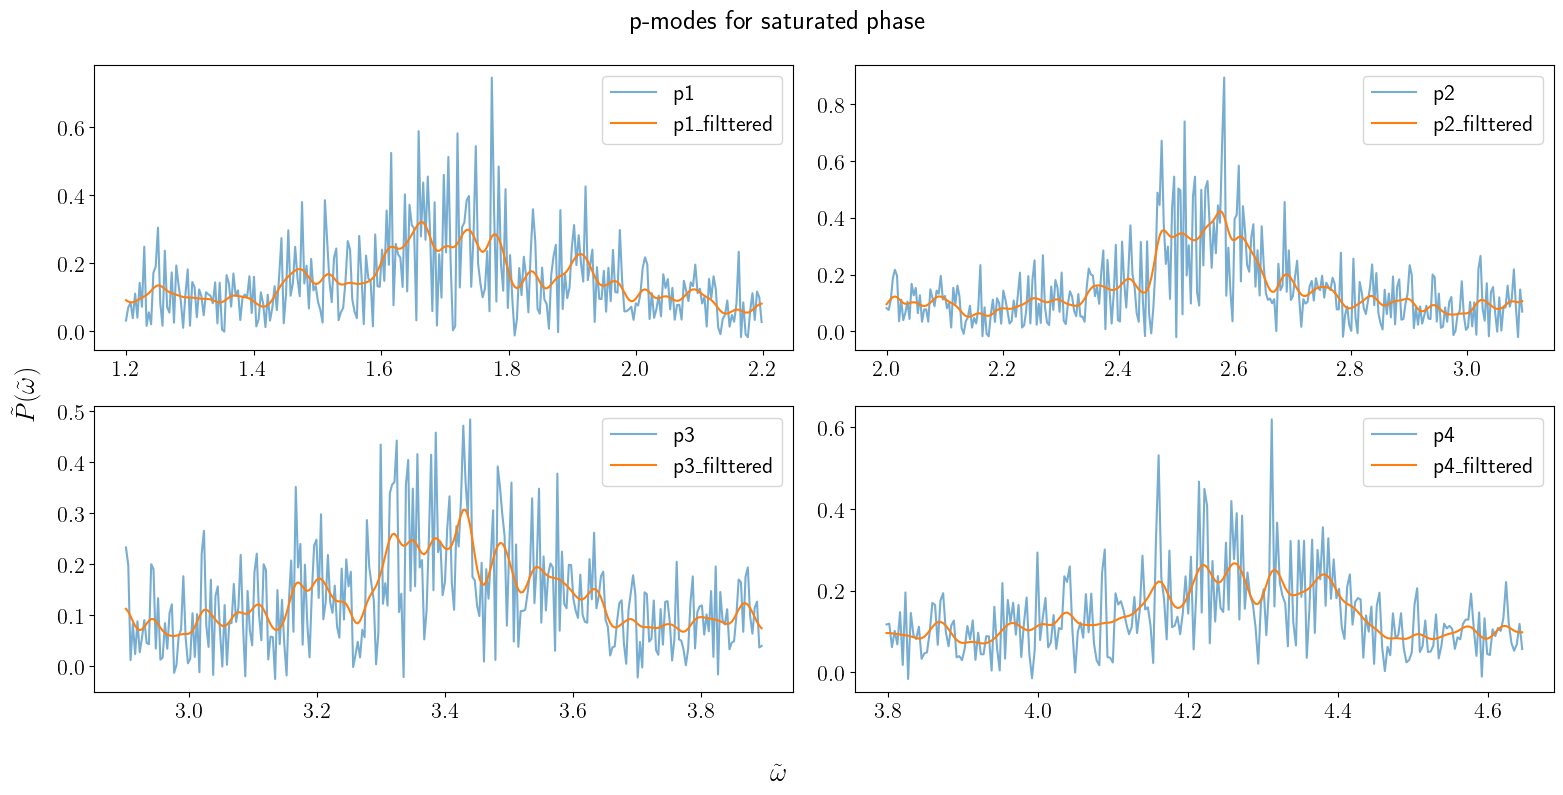

In [126]:
fig, axs = plt.subplots(2,2, figsize=(16,8))

axs[0,0].plot((om_tilde_sat[idl_p1_sat:idu_p1_sat]), (P_k2_sat[idl_p1_sat:idu_p1_sat]), alpha=0.6, label='p1')
axs[0,0].plot((om_tilde_sat[idl_p1_sat:idu_p1_sat]), (P_k2_sat_filt[idl_p1_sat:idu_p1_sat]), label='p1_filttered')
axs[0,0].legend()
axs[0,1].plot((om_tilde_sat[idl_p2_sat:idu_p2_sat]), (P_k2_sat[idl_p2_sat:idu_p2_sat]), alpha=0.6, label='p2')
axs[0,1].plot((om_tilde_sat[idl_p2_sat:idu_p2_sat]), (P_k2_sat_filt[idl_p2_sat:idu_p2_sat]), label='p2_filttered')
axs[0,1].legend()
axs[1,0].plot((om_tilde_sat[idl_p3_sat:idu_p3_sat]), (P_k2_sat[idl_p3_sat:idu_p3_sat]), alpha=0.6, label='p3')
axs[1,0].plot((om_tilde_sat[idl_p3_sat:idu_p3_sat]), (P_k2_sat_filt[idl_p3_sat:idu_p3_sat]), label='p3_filttered')
axs[1,0].legend()
axs[1,1].plot((om_tilde_sat[idl_p4_sat:idu_p4_sat]), (P_k2_sat[idl_p4_sat:idu_p4_sat]), alpha=0.6, label='p4')
axs[1,1].plot((om_tilde_sat[idl_p4_sat:idu_p4_sat]), (P_k2_sat_filt[idl_p4_sat:idu_p4_sat]), label='p4_filttered')
axs[1,1].legend()

plt.suptitle('p-modes for saturated phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

In [127]:
sig_sat_p1 = sig_sat*np.ones(len(sig_tot_sat[idl_p1_sat:idu_p1_sat]))
sig_sat_p2 = sig_sat*np.ones(len(sig_tot_sat[idl_p2_sat:idu_p2_sat]))
sig_sat_p3 = sig_sat*np.ones(len(sig_tot_sat[idl_p3_sat:idu_p3_sat]))
sig_sat_p4 = sig_sat*np.ones(len(sig_tot_sat[idl_p4_sat:idu_p4_sat]))

### fitting different p-modes for saturated phase

In [128]:
para_p1_sat_lor, cov_p1_sat_lor = curve_fit(lorentzian, om_tilde_sat[idl_p1_sat:idu_p1_sat], P_k2_sat[idl_p1_sat:idu_p1_sat], p0 = np.array([600,1.70,-2,100, 0.1]), sigma=sig_sat_p1) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_p1_sat_lor = lorentzian(om_tilde_sat[idl_p1_sat:idu_p1_sat], *para_p1_sat_lor)
para_p2_sat_lor, cov_p2_sat_lor = curve_fit(lorentzian, om_tilde_sat[idl_p2_sat:idu_p2_sat], P_k2_sat[idl_p2_sat:idu_p2_sat], p0 = np.array([600,2.50,-2,100, 0.1]), sigma=sig_sat_p2) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_p2_sat_lor = lorentzian(om_tilde_sat[idl_p2_sat:idu_p2_sat], *para_p2_sat_lor)
para_p3_sat_lor, cov_p3_sat_lor = curve_fit(lorentzian, om_tilde_sat[idl_p3_sat:idu_p3_sat], P_k2_sat[idl_p3_sat:idu_p3_sat], p0 = np.array([600,3.40,-2,100, 0.1]), sigma=sig_sat_p3) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_p3_sat_lor = lorentzian(om_tilde_sat[idl_p3_sat:idu_p3_sat], *para_p3_sat_lor)
para_p4_sat_lor, cov_p4_sat_lor = curve_fit(lorentzian, om_tilde_sat[idl_p4_sat:idu_p4_sat], P_k2_sat[idl_p4_sat:idu_p4_sat], p0 = np.array([600,4.20,-2,100, 0.1]), sigma=sig_sat_p4) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_p4_sat_lor = lorentzian(om_tilde_sat[idl_p4_sat:idu_p4_sat], *para_p4_sat_lor)

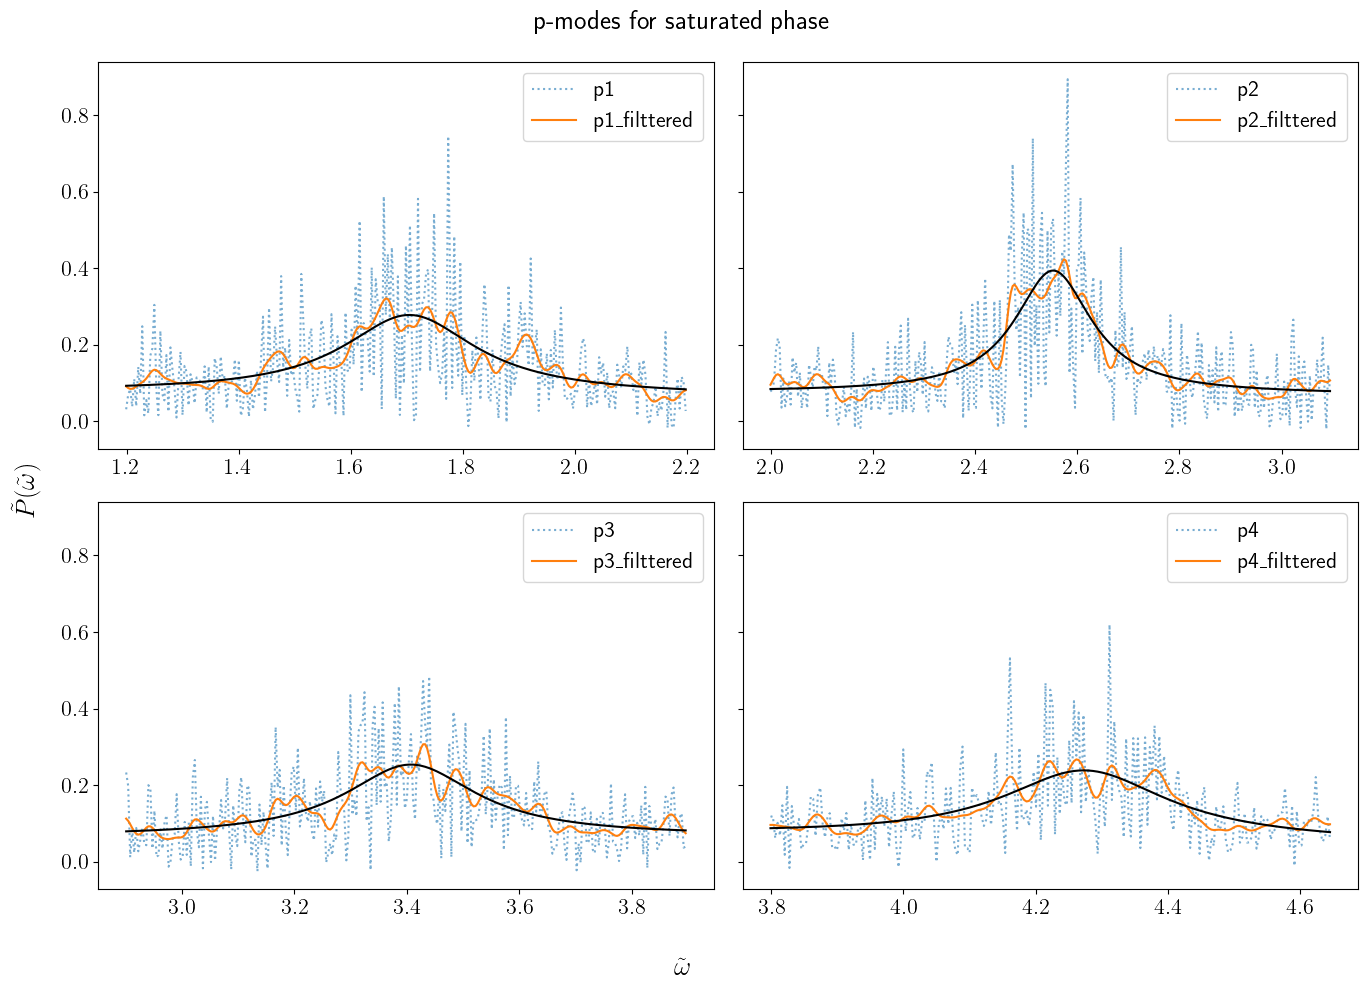

In [129]:
fig, axs = plt.subplots(2,2, sharey=True, figsize=(14,10))

axs[0,0].plot((om_tilde_sat[idl_p1_sat:idu_p1_sat]), (P_k2_sat[idl_p1_sat:idu_p1_sat]), ls=":", alpha=0.6, label='p1')
axs[0,0].plot((om_tilde_sat[idl_p1_sat:idu_p1_sat]), (P_k2_sat_filt[idl_p1_sat:idu_p1_sat]), label='p1_filttered')
axs[0,0].plot((om_tilde_sat[idl_p1_sat:idu_p1_sat]), fitted_p1_sat_lor, color='k')
# axes[0].plot(om_tilde_sat[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k')
axs[0,0].legend()

axs[0,1].plot((om_tilde_sat[idl_p2_sat:idu_p2_sat]), (P_k2_sat[idl_p2_sat:idu_p2_sat]), ls=":", alpha=0.6, label='p2')
axs[0,1].plot((om_tilde_sat[idl_p2_sat:idu_p2_sat]), (P_k2_sat_filt[idl_p2_sat:idu_p2_sat]), label='p2_filttered')
axs[0,1].plot((om_tilde_sat[idl_p2_sat:idu_p2_sat]), fitted_p2_sat_lor, color='k')
axs[0,1].legend()

axs[1,0].plot((om_tilde_sat[idl_p3_sat:idu_p3_sat]), (P_k2_sat[idl_p3_sat:idu_p3_sat]), ls=":", alpha=0.6, label='p3')
axs[1,0].plot((om_tilde_sat[idl_p3_sat:idu_p3_sat]), (P_k2_sat_filt[idl_p3_sat:idu_p3_sat]), label='p3_filttered')
axs[1,0].plot((om_tilde_sat[idl_p3_sat:idu_p3_sat]), fitted_p3_sat_lor, color='k')
axs[1,0].legend()

axs[1,1].plot((om_tilde_sat[idl_p4_sat:idu_p4_sat]), (P_k2_sat[idl_p4_sat:idu_p4_sat]), ls=":", alpha=0.6, label='p4')
axs[1,1].plot((om_tilde_sat[idl_p4_sat:idu_p4_sat]), (P_k2_sat_filt[idl_p4_sat:idu_p4_sat]), label='p4_filttered')
axs[1,1].plot((om_tilde_sat[idl_p4_sat:idu_p4_sat]), fitted_p4_sat_lor, color='k')
axs[1,1].legend()

plt.suptitle('p-modes for saturated phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

In [130]:
id_om_sat0 = np.argmin(np.abs(om_tilde_sat - para_f_sat_lor[1]))
for i in range(1,5):
    exec(f'id_om_sat{i} = np.argmin(np.abs(om_tilde_sat - para_p{i}_sat_lor[1]))')

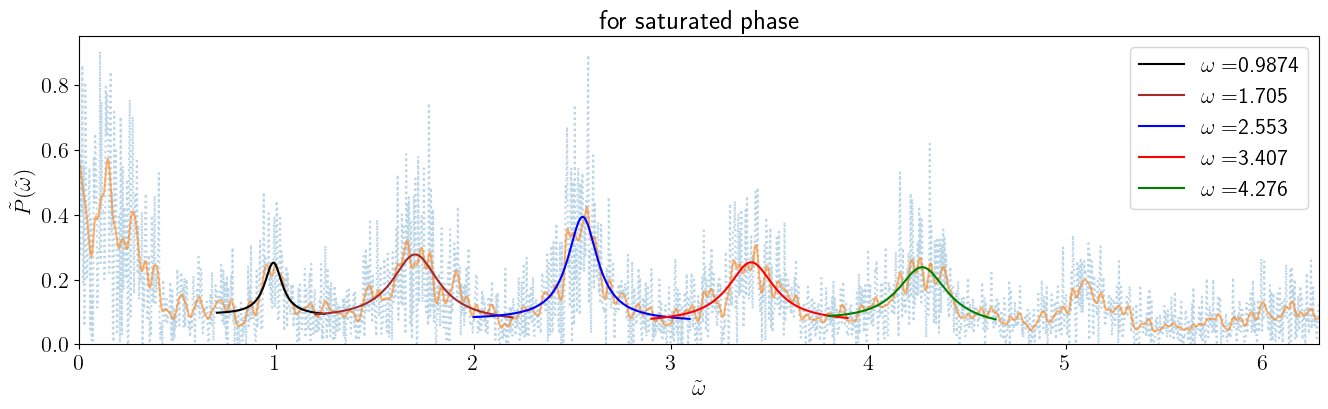

In [131]:
fig = plt.figure(figsize=(16,4))

plt.plot(om_tilde_sat[:indx_sat], P_k2_sat[:indx_sat], ls=':', alpha=0.3)
plt.plot((om_tilde_sat[:indx_sat]), (P_k2_sat_filt[:indx_sat]), alpha=0.6)

plt.plot(om_tilde_sat[idl_f_sat:idu_f_sat], fitted_f_sat_lor, color='k', label=f'$\\omega=${om_tilde_sat[id_om_sat0]:.4g}')
plt.plot(om_tilde_sat[idl_p1_sat:idu_p1_sat], fitted_p1_sat_lor, color='brown', label=fr'$\omega=${om_tilde_sat[id_om_sat1]:.4g}')
plt.plot(om_tilde_sat[idl_p2_sat:idu_p2_sat], fitted_p2_sat_lor, color='b', label=fr'$\omega=${om_tilde_sat[id_om_sat2]:.4g}')
plt.plot(om_tilde_sat[idl_p3_sat:idu_p3_sat], fitted_p3_sat_lor, color='r', label=fr'$\omega=${om_tilde_sat[id_om_sat3]:.4g}')
plt.plot(om_tilde_sat[idl_p4_sat:idu_p4_sat], fitted_p4_sat_lor, color='g', label=fr'$\omega=${om_tilde_sat[id_om_sat4]:.4g}')

plt.xlim(0, 2*np.pi)
plt.ylim(0,)
plt.legend(bbox_to_anchor=[1,1], loc='best')

plt.title('for saturated phase')
plt.xlabel(r"$\tilde{\omega}$")
plt.ylabel(r"$\tilde{P}(\tilde{\omega})$")
#plt.tight_layout
plt.show()

## $k_x$ vs. mode parameters

index

In [132]:
idl_p2_kin_1 = np.argmin(np.abs(om_tilde_kin - 2.05))
idu_p2_kin_1 = np.argmin(np.abs(om_tilde_kin - 3.0))

idl_p2_kin_2 = np.argmin(np.abs(om_tilde_kin - 2.05))
idu_p2_kin_2 = np.argmin(np.abs(om_tilde_kin - 3.1))

idl_p2_kin_3 = np.argmin(np.abs(om_tilde_kin - 2.3))
idu_p2_kin_3 = np.argmin(np.abs(om_tilde_kin - 3.25))

idl_p2_kin_4 = np.argmin(np.abs(om_tilde_kin - 2.5))
idu_p2_kin_4 = np.argmin(np.abs(om_tilde_kin - 3.45))

generalization

In [133]:
idl_p2_kin = np.zeros(4, dtype=np.int64)
idu_p2_kin = np.zeros(4, dtype=np.int64)
low_indx = np.array([2.05, 2.05, 2.3, 2.5])
up_indx = np.array([3.0, 3.1, 3.25, 3.45])
peak = np.array([2.5, 2.6, 2.8, 3.0])
for i in range(0, 4):
    idl_p2_kin[i] = np.argmin(np.abs(om_tilde_kin - low_indx[i]))
    idu_p2_kin[i] = np.argmin(np.abs(om_tilde_kin - up_indx[i]))

In [134]:
P_k_kin = np.zeros([4,uz_fourier_kin[:,:].shape[0]])
P_k_kin_filt = np.empty([4, P_k_kin[:,:indx_kin].shape[1]])
sig_tot_kin = np.empty([4, P_k_kin[:,:indx_kin].shape[1]])
sig_kin_p2 = np.empty([4, P_k_kin[:,idl_p2_kin_1:idu_p2_kin_1].shape[1]])
sig_kin = np.empty(4)

In [135]:
for i in range(0,4):
    P_k_kin[i,:] = np.abs(uz_fourier_kin[:,i+1]/D**2)
    P_k_kin_filt[i,:] = gaussian_filter(P_k_kin[i,:indx_kin],3)
    sig_tot_kin[i,:] = (P_k_kin[i,:indx_kin]-P_k_kin_filt[i,:])**2
    sig_kin[i] = np.sqrt(sum(sig_tot_kin[i,:])/len(sig_tot_kin[i,:]))
    # sig_kin_p2[i,:] = sig_kin[i]*np.ones(len(sig_tot_kin[i,idl_p2_kin[i]:idu_p2_kin[i]]))


sig_kin_p2_1 = sig_kin[0]*np.ones(len(sig_tot_kin[0,idl_p2_kin_1:idu_p2_kin_1]))
sig_kin_p2_2 = sig_kin[1]*np.ones(len(sig_tot_kin[1,idl_p2_kin_2:idu_p2_kin_2]))
sig_kin_p2_3 = sig_kin[2]*np.ones(len(sig_tot_kin[2,idl_p2_kin_3:idu_p2_kin_3]))
sig_kin_p2_4 = sig_kin[3]*np.ones(len(sig_tot_kin[3,idl_p2_kin_4:idu_p2_kin_4]))

In [136]:
# sig_kin_p2_2

In [137]:
# sig_kin_p2_1

In [138]:
# sig_kin_p2[i,:] = sig_kin[0]*np.ones(len(sig_tot_kin[0,idl_p2_kin_1:idu_p2_kin_1]))


### plotting

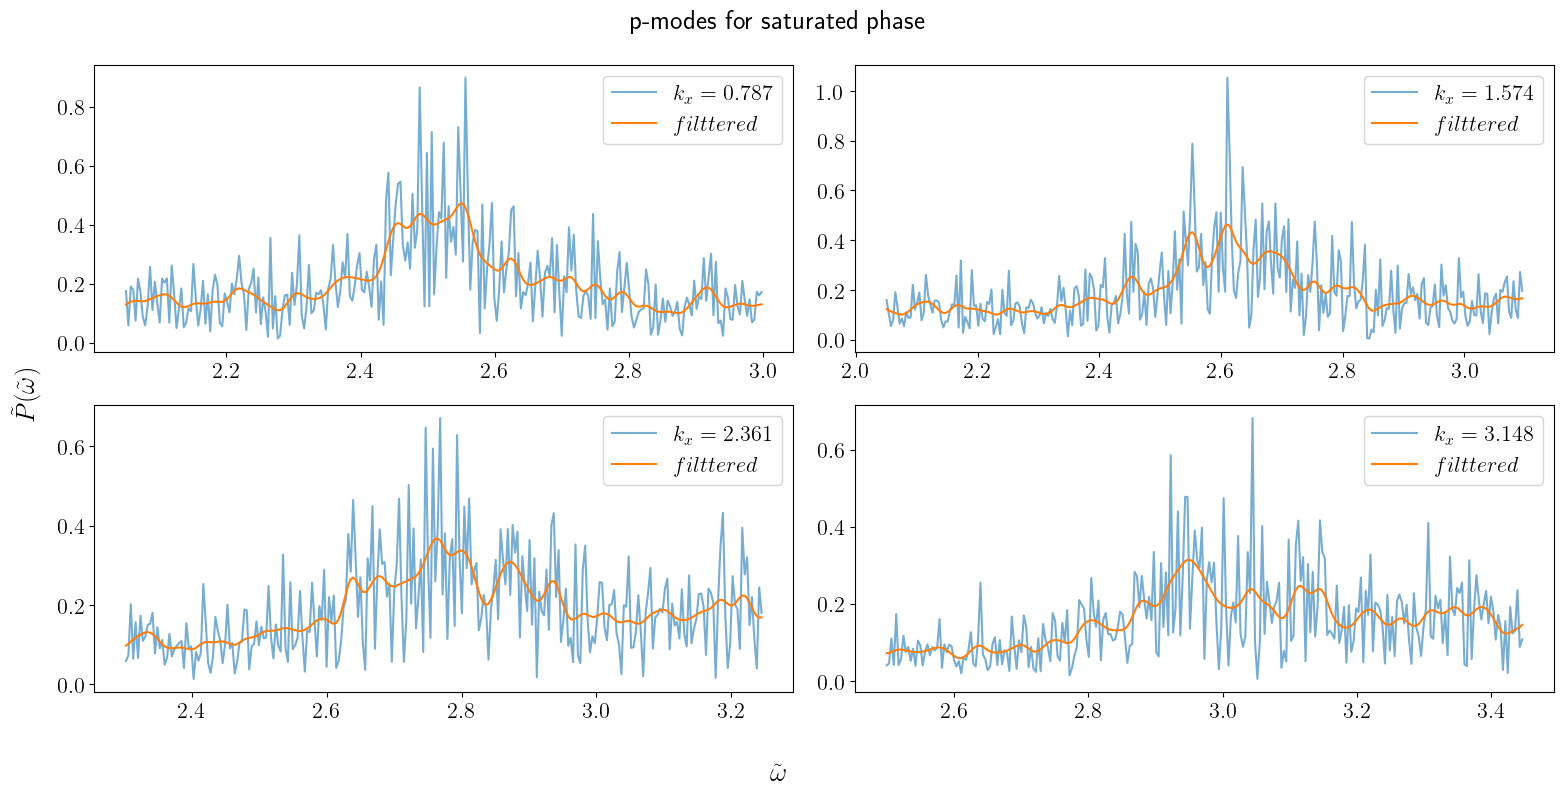

In [139]:
fig, axs = plt.subplots(2,2, figsize=(16,8))

axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), (P_k_kin[0,idl_p2_kin_1:idu_p2_kin_1]), alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')
axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), (P_k_kin_filt[0,idl_p2_kin_1:idu_p2_kin_1]), label=r'$filttered$')
axs[0,0].legend()
axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), (P_k_kin[1,idl_p2_kin_2:idu_p2_kin_2]), alpha=0.6, label=fr'$k_x={round(k_tilde[2],3)}$')
axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), (P_k_kin_filt[1,idl_p2_kin_2:idu_p2_kin_2]), label=r'$filttered$')
axs[0,1].legend()
axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), (P_k_kin[2,idl_p2_kin_3:idu_p2_kin_3]), alpha=0.6, label=fr'$k_x={round(k_tilde[3],3)}$')
axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), (P_k_kin_filt[2,idl_p2_kin_3:idu_p2_kin_3]), label=r'$filttered$')
axs[1,0].legend()
axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), (P_k_kin[3,idl_p2_kin_4:idu_p2_kin_4]), alpha=0.6, label=fr'$k_x={round(k_tilde[4],3)}$')
axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), (P_k_kin_filt[3,idl_p2_kin_4:idu_p2_kin_4]), label=r'$filttered$')
axs[1,1].legend()

plt.suptitle('p-modes for saturated phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

### fitting p-modes for different $k_x$

In [140]:
para_p2_kin_lor_1, cov_p2_kin_lor_1 = curve_fit(lorentzian, om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1], P_k_kin[0,idl_p2_kin_1:idu_p2_kin_1], p0 = np.array([2,2.5,-2,100,2]), sigma=sig_kin_p2_1)#, bounds=((0,1,-np.inf,0,-50),(10,2,2,400,20))) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_p2_kin_lor_1 = lorentzian(om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1], *para_p2_kin_lor_1)

para_p2_kin_lor_2, cov_p2_kin_lor_2 = curve_fit(lorentzian, om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2], P_k_kin[1,idl_p2_kin_2:idu_p2_kin_2], p0 = np.array([2,2.6,-2,100,2]), sigma=sig_kin_p2_2) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_p2_kin_lor_2 = lorentzian(om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2], *para_p2_kin_lor_2)

para_p2_kin_lor_3, cov_p2_kin_lor_3 = curve_fit(lorentzian, om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3], P_k_kin[2,idl_p2_kin_3:idu_p2_kin_3], p0 = np.array([2,2.8,-2,100,0.1]), sigma=sig_kin_p2_3) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_p2_kin_lor_3 = lorentzian(om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3], *para_p2_kin_lor_3)

para_p2_kin_lor_4, cov_p2_kin_lor_4 = curve_fit(lorentzian, om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4], P_k_kin[3,idl_p2_kin_4:idu_p2_kin_4], p0 = np.array([2,3.0,-2,100,0.1]), sigma=sig_kin_p2_4) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_p2_kin_lor_4 = lorentzian(om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4], *para_p2_kin_lor_4)

In [141]:
# para_p2_kin_lor_fitted = np.zeros([4,5])
# cov_p2_kin_lor = np.empty([4,5])
# mode_strength_p2 = np.zeros(4)

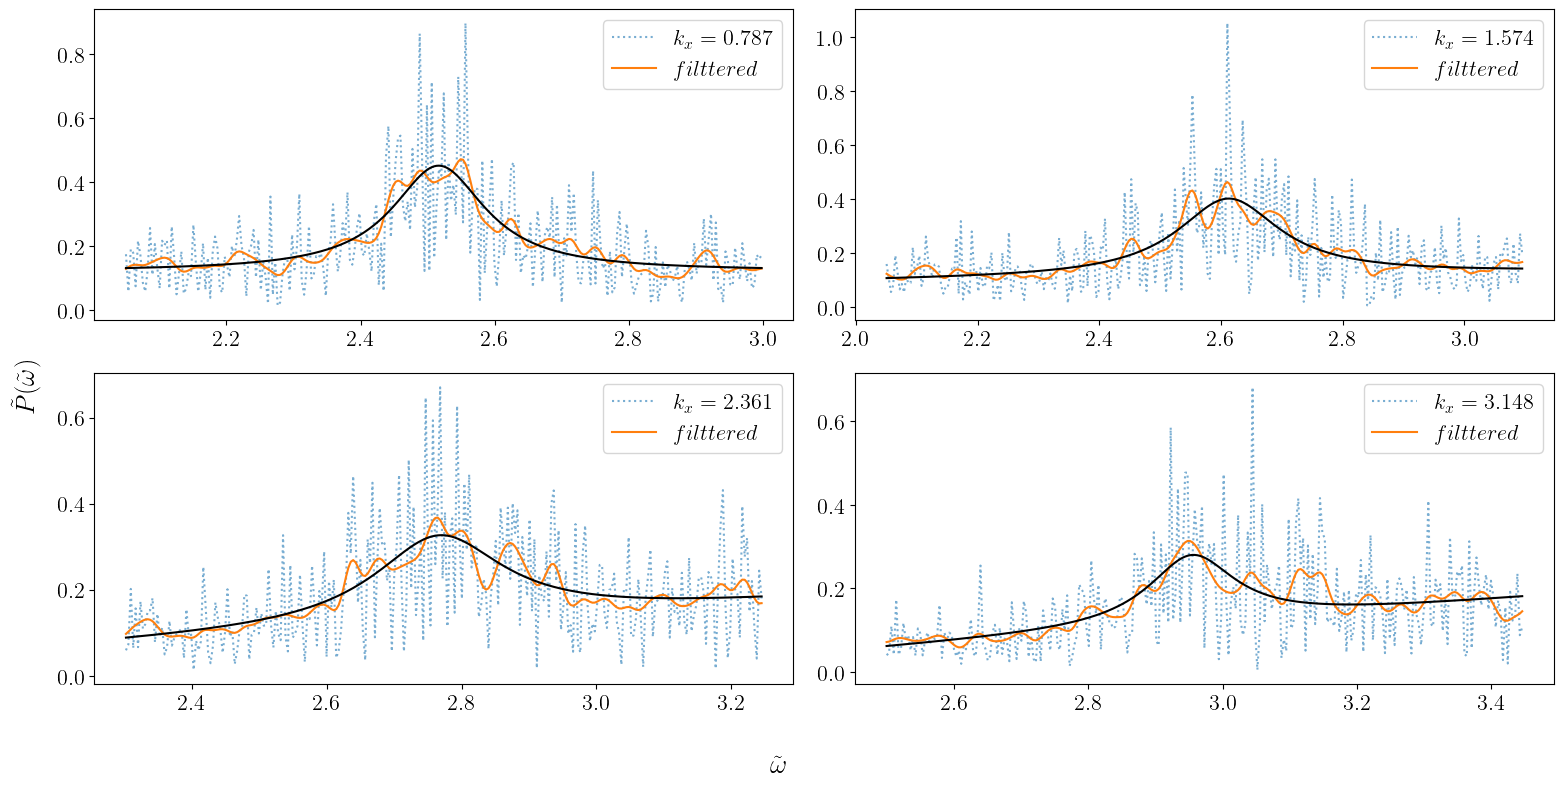

In [142]:
fig, axs = plt.subplots(2,2, figsize=(16,8))

axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), (P_k_kin[0,idl_p2_kin_1:idu_p2_kin_1]), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')
axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), (P_k_kin_filt[0,idl_p2_kin_1:idu_p2_kin_1]), label=r'$filttered$')
axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), fitted_p2_kin_lor_1, color='k')
axs[0,0].legend()
axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), (P_k_kin[1,idl_p2_kin_2:idu_p2_kin_2]), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[2],3)}$')
axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), (P_k_kin_filt[1,idl_p2_kin_2:idu_p2_kin_2]), label=r'$filttered$')
axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), fitted_p2_kin_lor_2, color='k')
axs[0,1].legend()
axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), (P_k_kin[2,idl_p2_kin_3:idu_p2_kin_3]), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[3],3)}$')
axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), (P_k_kin_filt[2,idl_p2_kin_3:idu_p2_kin_3]), label=r'$filttered$')
axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), fitted_p2_kin_lor_3, color='k')
axs[1,0].legend()
axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), (P_k_kin[3,idl_p2_kin_4:idu_p2_kin_4]), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[4],3)}$')
axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), (P_k_kin_filt[3,idl_p2_kin_4:idu_p2_kin_4]), label=r'$filttered$')
axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), fitted_p2_kin_lor_4, color='k')
axs[1,1].legend()

# plt.suptitle('p-modes for saturated phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

In [143]:
mode_strength_p2 = np.zeros(4)

In [144]:
for i in range(1,5):
    # exec(f'para_p2_kin_lor_fitted[{i},:] = para_p2_kin_lor_{i+1}')
    exec(f'fitted_p2_kin_lor_wobl_{i} = fitted_p2_kin_lor_{i}-para_p2_kin_lor_{i}[3]-om_tilde_kin[idl_p2_kin[{i-1}]:idu_p2_kin[{i-1}]]*para_p2_kin_lor_{i}[4]')
    exec(f'fitted_p2_kin_wobl_{i} = P_k_kin[{i-1},idl_p2_kin[{i-1}]:idu_p2_kin[{i-1}]]-para_p2_kin_lor_{i}[3]-om_tilde_kin[idl_p2_kin[{i-1}]:idu_p2_kin[{i-1}]]*para_p2_kin_lor_{i}[4]')
    
    exec(f'mode_strength_p2[{i-1}] = trap(fitted_p2_kin_lor_wobl_{i}, om_tilde_kin[idl_p2_kin[{i-1}]:idu_p2_kin[{i-1}]])')

In [145]:
# mode_strength_p2 = np.zeros(4)

In [146]:
fwhm = np.zeros(4)
indx_fwhm_l = np.zeros(4, dtype=np.int16)
indx_fwhm_m = np.zeros(4, dtype=np.int16)
indx_fwhm_add = np.zeros(4, dtype=np.int16)
indx_fwhm_u = np.zeros(4, dtype=np.int16)

In [147]:
# peak = np.array([2.5, 2.6, 2.8, 3.0])
# for i in range(0, 4):
#     idl_p2_kin[i] = np.argmin(np.abs(om_tilde_kin - low_indx[i]))
#     idu_p2_kin[i] = np.argmin(np.abs(om_tilde_kin - up_indx[i]))

In [148]:
para_p2_kin_lor_1[1], indx_fwhm_m

(2.51642609053862, array([0, 0, 0, 0], dtype=int16))

In [149]:
peak_value = np.zeros(4)
om_range = np.zeros([4,om_tilde_kin[idl_p2_kin[i-1]:idu_p2_kin[i-1]].shape[0]])
for i in range(1,5):
    exec(f'om_range_{i-1} = om_tilde_kin[idl_p2_kin[{i-1}]:idu_p2_kin[{i-1}]]')
    exec(f'indx_fwhm_m[{i-1}] = np.argmin(np.abs(om_tilde_kin[idl_p2_kin[{i-1}]:idu_p2_kin[{i-1}]] - para_p2_kin_lor_{i}[1]))')
    exec(f'peak_value[{i-1}] = fitted_p2_kin_lor_wobl_{i}[{indx_fwhm_m[i-1]}]')
    exec(f'indx_fwhm_l[{i-1}] = np.argmin(np.abs(fitted_p2_kin_lor_wobl_{i}[0:{indx_fwhm_m[i-1]}] - 0.5*peak_value[{i-1}]))')
    exec(f'indx_fwhm_add[{i-1}] = fitted_p2_kin_lor_wobl_{i}[0:{indx_fwhm_m[i-1]}].shape[0]')
    exec(f'indx_fwhm_u[{i-1}] = np.argmin(np.abs(fitted_p2_kin_lor_wobl_{i}[{indx_fwhm_m[i-1]}:-1] - 0.5*peak_value[{i-1}]))')


In [150]:
fitted_p2_kin_lor_wobl_1[0:indx_fwhm_m[i-1]].shape[0]

127

In [151]:
indx_fwhm_l, indx_fwhm_u 

(array([106, 128,  97, 105], dtype=int16),
 array([24, 28, 32, 22], dtype=int16))

In [152]:
# P_k_kin[0,idl_p2_kin[i-1]:idu_p2_kin[i-1]]

In [153]:
# P_k_kin

In [154]:
# i = 1
# indx_fwhm_u[i-1] = np.argmin(np.abs(P_k_kin[idl_p2_kin[i-1]:idu_p2_kin[i-1]] - 0.5*peak_value[i-1]))

In [155]:
np.where(abs(P_k_kin[idl_p2_kin[0]:idu_p2_kin[0]]-peak_value[0]/2)<100)

(array([], dtype=int64), array([], dtype=int64))

In [156]:
indx_fwhm_m, peak_value

(array([130, 157, 130, 127], dtype=int16),
 array([0.33070825, 0.28687067, 0.20249345, 0.16531451]))

In [157]:
peak_value

array([0.33070825, 0.28687067, 0.20249345, 0.16531451])

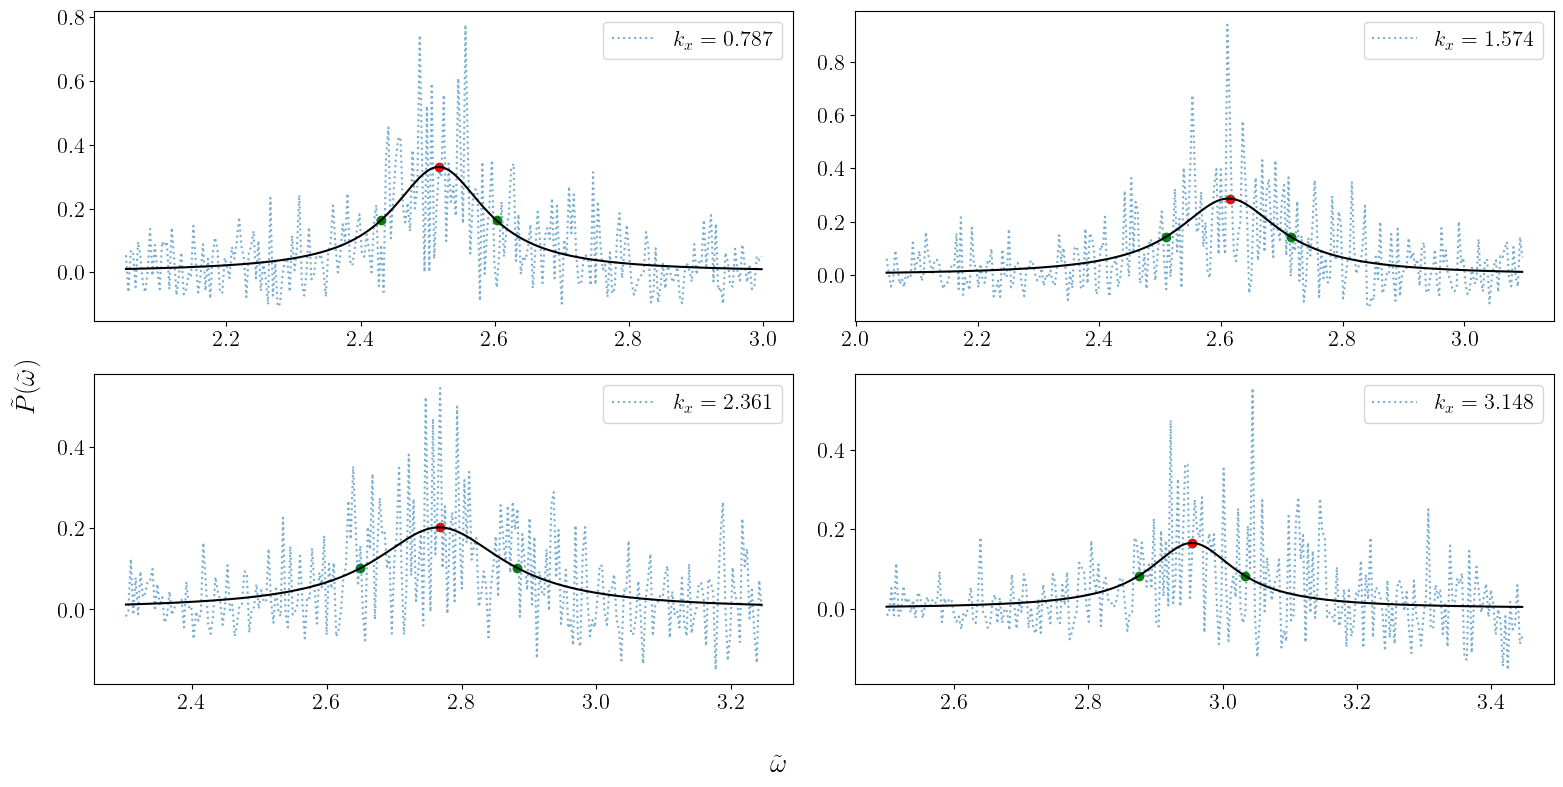

In [158]:

fig, axs = plt.subplots(2,2, figsize=(16,8))

axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), (fitted_p2_kin_wobl_1), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')
# axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), (P_k_kin_filt[0,idl_p2_kin_1:idu_p2_kin_1]), label=r'$filttered$')
axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), fitted_p2_kin_lor_wobl_1, color='k')
axs[0,0].scatter((om_range_0[indx_fwhm_m[0]]), peak_value[0], color='r')
axs[0,0].scatter((om_range_0[indx_fwhm_l[0]]), 0.5*peak_value[0], color='g')
axs[0,0].scatter((om_range_0[indx_fwhm_u[0]+indx_fwhm_add[0]]), 0.5*peak_value[0], color='g')
axs[0,0].legend()

axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), (fitted_p2_kin_wobl_2), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[2],3)}$')
# axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), (P_k_kin_filt[1,idl_p2_kin_2:idu_p2_kin_2]), label=r'$filttered$')
axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), fitted_p2_kin_lor_wobl_2, color='k')
axs[0,1].scatter((om_range_1[indx_fwhm_m[1]]), peak_value[1], color='r')
axs[0,1].scatter((om_range_1[indx_fwhm_l[1]]), 0.5*peak_value[1], color='g')
axs[0,1].scatter((om_range_1[indx_fwhm_u[1]+indx_fwhm_add[1]]), 0.5*peak_value[1], color='g')
axs[0,1].legend()

axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), (fitted_p2_kin_wobl_3), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[3],3)}$')
# axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), (P_k_kin_filt[2,idl_p2_kin_3:idu_p2_kin_3]), label=r'$filttered$')
axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), fitted_p2_kin_lor_wobl_3, color='k')
axs[1,0].scatter((om_range_2[indx_fwhm_m[2]]), peak_value[2], color='r')
axs[1,0].scatter((om_range_2[indx_fwhm_l[2]]), 0.5*peak_value[2], color='g')
axs[1,0].scatter((om_range_2[indx_fwhm_u[2]+indx_fwhm_add[2]]), 0.5*peak_value[2], color='g')
axs[1,0].legend()

axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), (fitted_p2_kin_wobl_4), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[4],3)}$')
# axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), (P_k_kin_filt[3,idl_p2_kin_4:idu_p2_kin_4]), label=r'$filttered$')
axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), fitted_p2_kin_lor_wobl_4, color='k')
axs[1,1].scatter((om_range_3[indx_fwhm_m[3]]), peak_value[3], color='r')
axs[1,1].scatter((om_range_3[indx_fwhm_l[3]]), 0.5*peak_value[3], color='g')
axs[1,1].scatter((om_range_3[indx_fwhm_u[3]+indx_fwhm_add[3]]), 0.5*peak_value[3], color='g')
axs[1,1].legend()

# plt.suptitle('p-modes for saturated phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

In [159]:
from peakutils import indexes

## testing peakutils

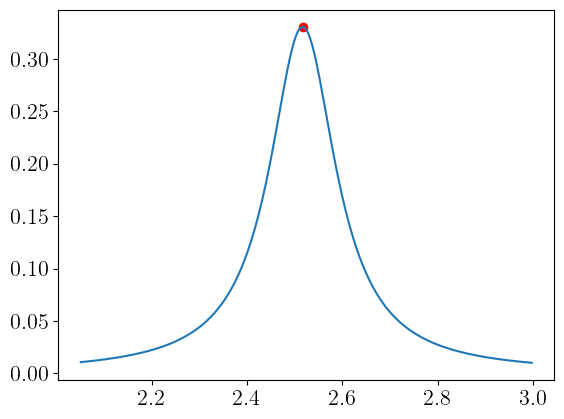

In [160]:
indx = indexes(fitted_p2_kin_lor_wobl_1, thres=0.6, min_dist=15)
plt.plot(om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1],fitted_p2_kin_lor_wobl_1)
plt.scatter(om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1][indx],fitted_p2_kin_lor_wobl_1[indx], c='r')

In [161]:
axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), (P_k_kin[0,idl_p2_kin_1:idu_p2_kin_1]), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')


In [162]:
indx

array([130])

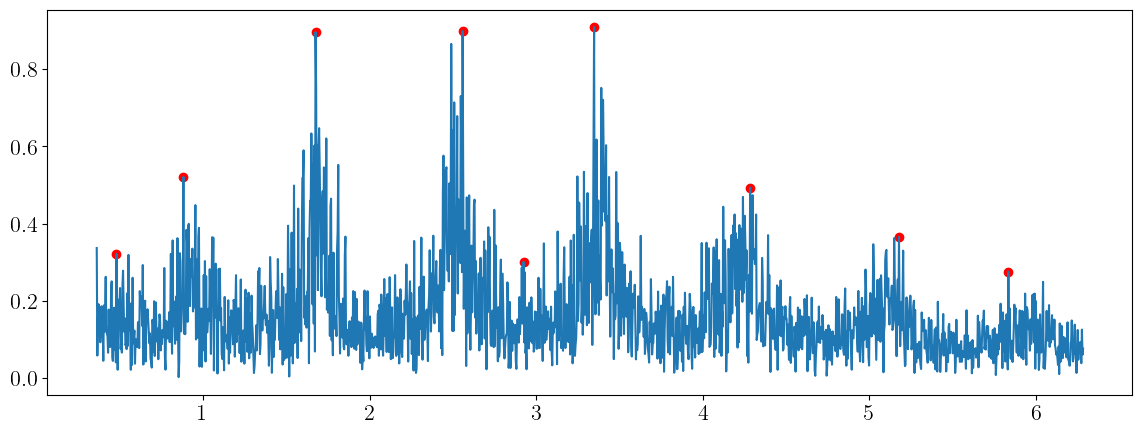

In [163]:
fig = plt.figure(figsize=(14,5))
indx = indexes(P_k_kin[0,100:indx_kin], thres=0.3, min_dist=100)
plt.plot(om_tilde_kin[100:indx_kin],P_k_kin[0,100:indx_kin])
plt.scatter(om_tilde_kin[100:indx_kin][indx],P_k_kin[0,100:indx_kin][indx], c='r')
plt.show()

In [164]:
def mode_fit(func,x_data,y_data,base=True,**kwargs):
    para, _ = curve_fit(func, x_data, y_data, **kwargs)
    y_fit = func(x_data, *para)
    if base:
        y = y_fit
    else:
        y = y_fit-x_data*para[4]-para[3]
    return y

In [165]:
P_k = P_k_kin[0,100:indx_kin]
number = 4
def mode_finder(x_data, y_data, plot=False, thres=0.3, min_dist=100):
    indx = indexes(y_data, thres=thres, min_dist=min_dist)
    if plot:
        plt.figure(figsize=(14,5))
        plt.plot(x_data, y_data)
        plt.scatter(x_data[indx], y_data[indx], c='r')
        plt.xlim(x_data[0], x_data[-1])
        plt.ylim(0,)
        plt.show()
    else:
        return indx

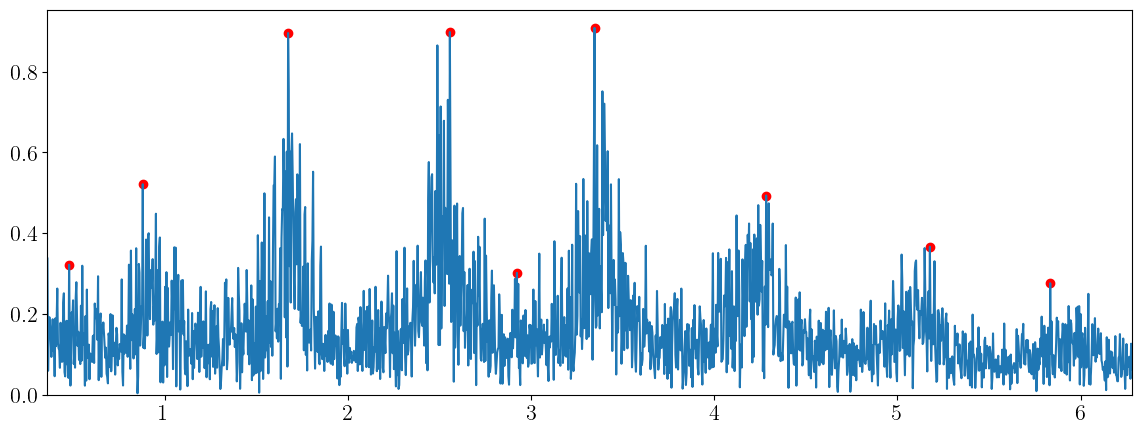

In [166]:
mode_finder(om_tilde_kin[100:indx_kin], P_k_kin[0,100:indx_kin], plot=True)

In [167]:
def mode_data(x_data, y_data, index: int, lower_bound: int, upper_bound: int):
    lb = index-lower_bound
    ub = index+upper_bound
    data_dict = {'x': x_data[lb:ub], 'y': y_data[lb:ub]}
    return data_dict

In [168]:
dat = mode_data(om_tilde_kin[100:indx_kin], P_k_kin[0,100:indx_kin], 115, 70, 70)

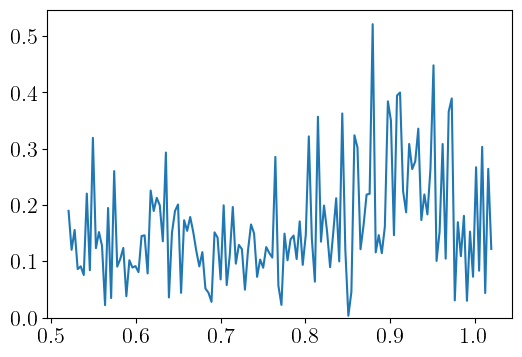

In [169]:
plt.figure(figsize=(6,4))
plt.plot(dat['x'], dat['y'])
# plt.scatter(x_data[indx], y_data[indx], c='r')
# plt.xlim(x_data[0], x_data[-1])
plt.ylim(0,)
plt.show()

In [170]:
indx

array([  33,  145,  366,  612,  714,  832, 1093, 1342, 1525])

## end

In [171]:
nu = u_ave/(3*5.16441)

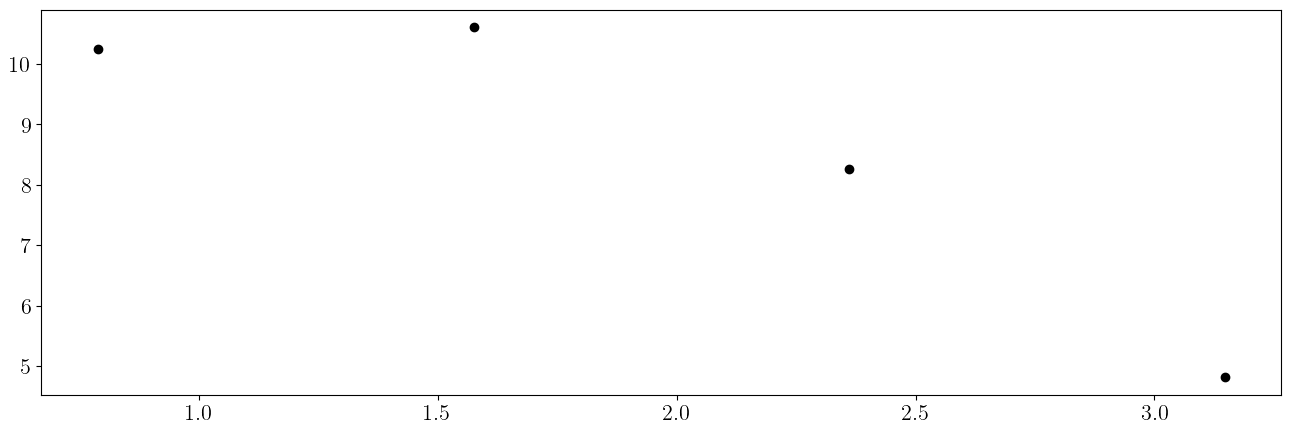

In [172]:
fig, axs = plt.subplots(1,1, figsize=(16,5))
axs.scatter(k_tilde[1:5], mode_strength_p2/nu, c='k')

### subtracting the baseline

In [173]:
# fitted_p1_z_kin_lor_wobl = 

In [174]:
# fitted_p1_z_kin_lor_wobl[i,:] = fitted_p1_z_kin_lor[i,:]-para_p1_z_kin_lor[i,3]-om_tilde_kin[idl_p1_kin_z:idu_p1_kin_z]*para_p1_z_kin_lor[i,4]

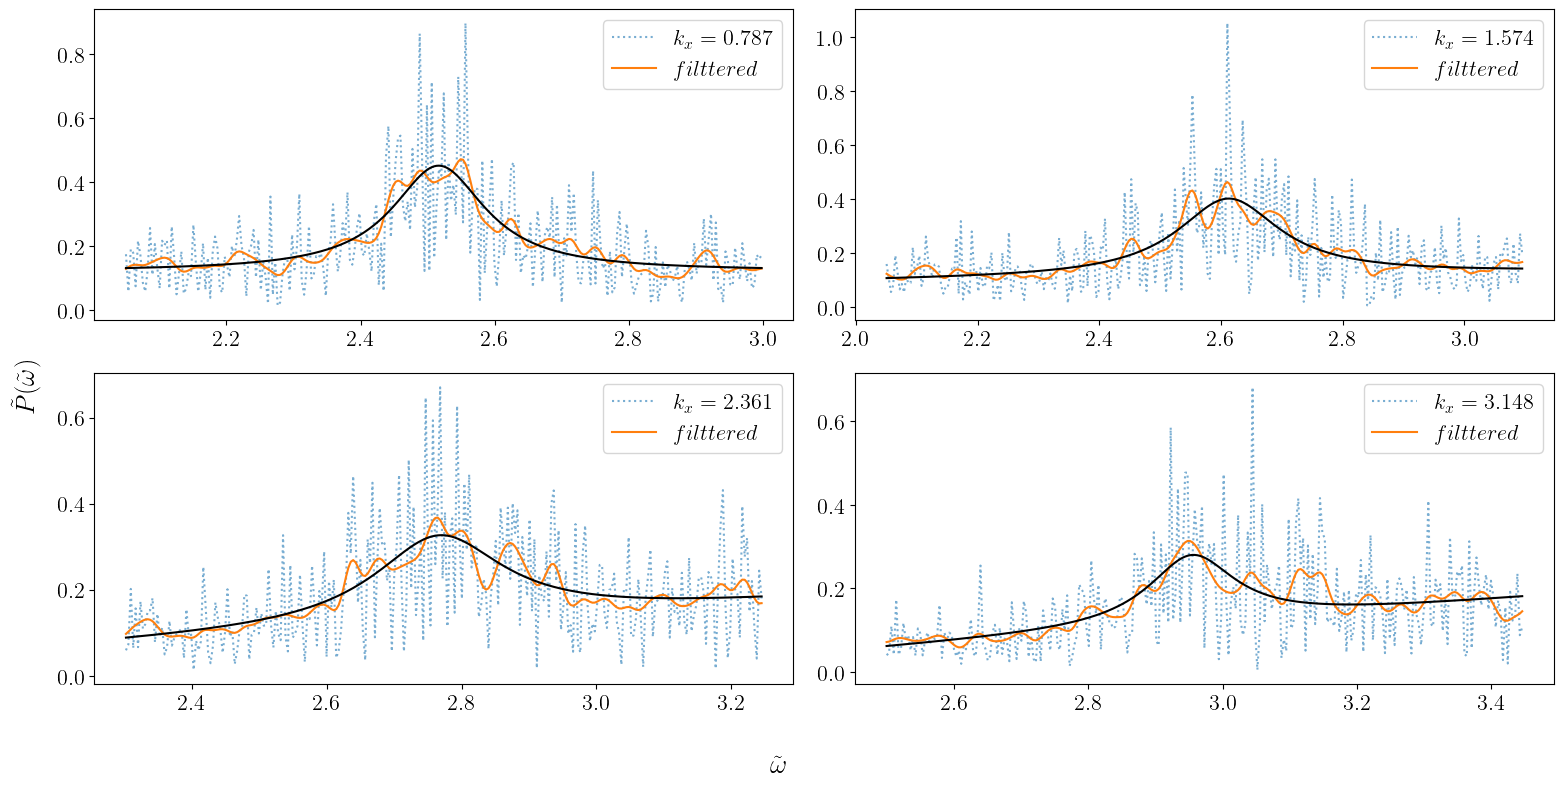

In [175]:
fig, axs = plt.subplots(2,2, figsize=(16,8))

axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), (P_k_kin[0,idl_p2_kin_1:idu_p2_kin_1]), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')
axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), (P_k_kin_filt[0,idl_p2_kin_1:idu_p2_kin_1]), label=r'$filttered$')
axs[0,0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), fitted_p2_kin_lor_1, color='k')
axs[0,0].legend()
axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), (P_k_kin[1,idl_p2_kin_2:idu_p2_kin_2]), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[2],3)}$')
axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), (P_k_kin_filt[1,idl_p2_kin_2:idu_p2_kin_2]), label=r'$filttered$')
axs[0,1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), fitted_p2_kin_lor_2, color='k')
axs[0,1].legend()
axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), (P_k_kin[2,idl_p2_kin_3:idu_p2_kin_3]), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[3],3)}$')
axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), (P_k_kin_filt[2,idl_p2_kin_3:idu_p2_kin_3]), label=r'$filttered$')
axs[1,0].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), fitted_p2_kin_lor_3, color='k')
axs[1,0].legend()
axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), (P_k_kin[3,idl_p2_kin_4:idu_p2_kin_4]), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[4],3)}$')
axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), (P_k_kin_filt[3,idl_p2_kin_4:idu_p2_kin_4]), label=r'$filttered$')
axs[1,1].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), fitted_p2_kin_lor_4, color='k')
axs[1,1].legend()

# plt.suptitle('p-modes for saturated phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

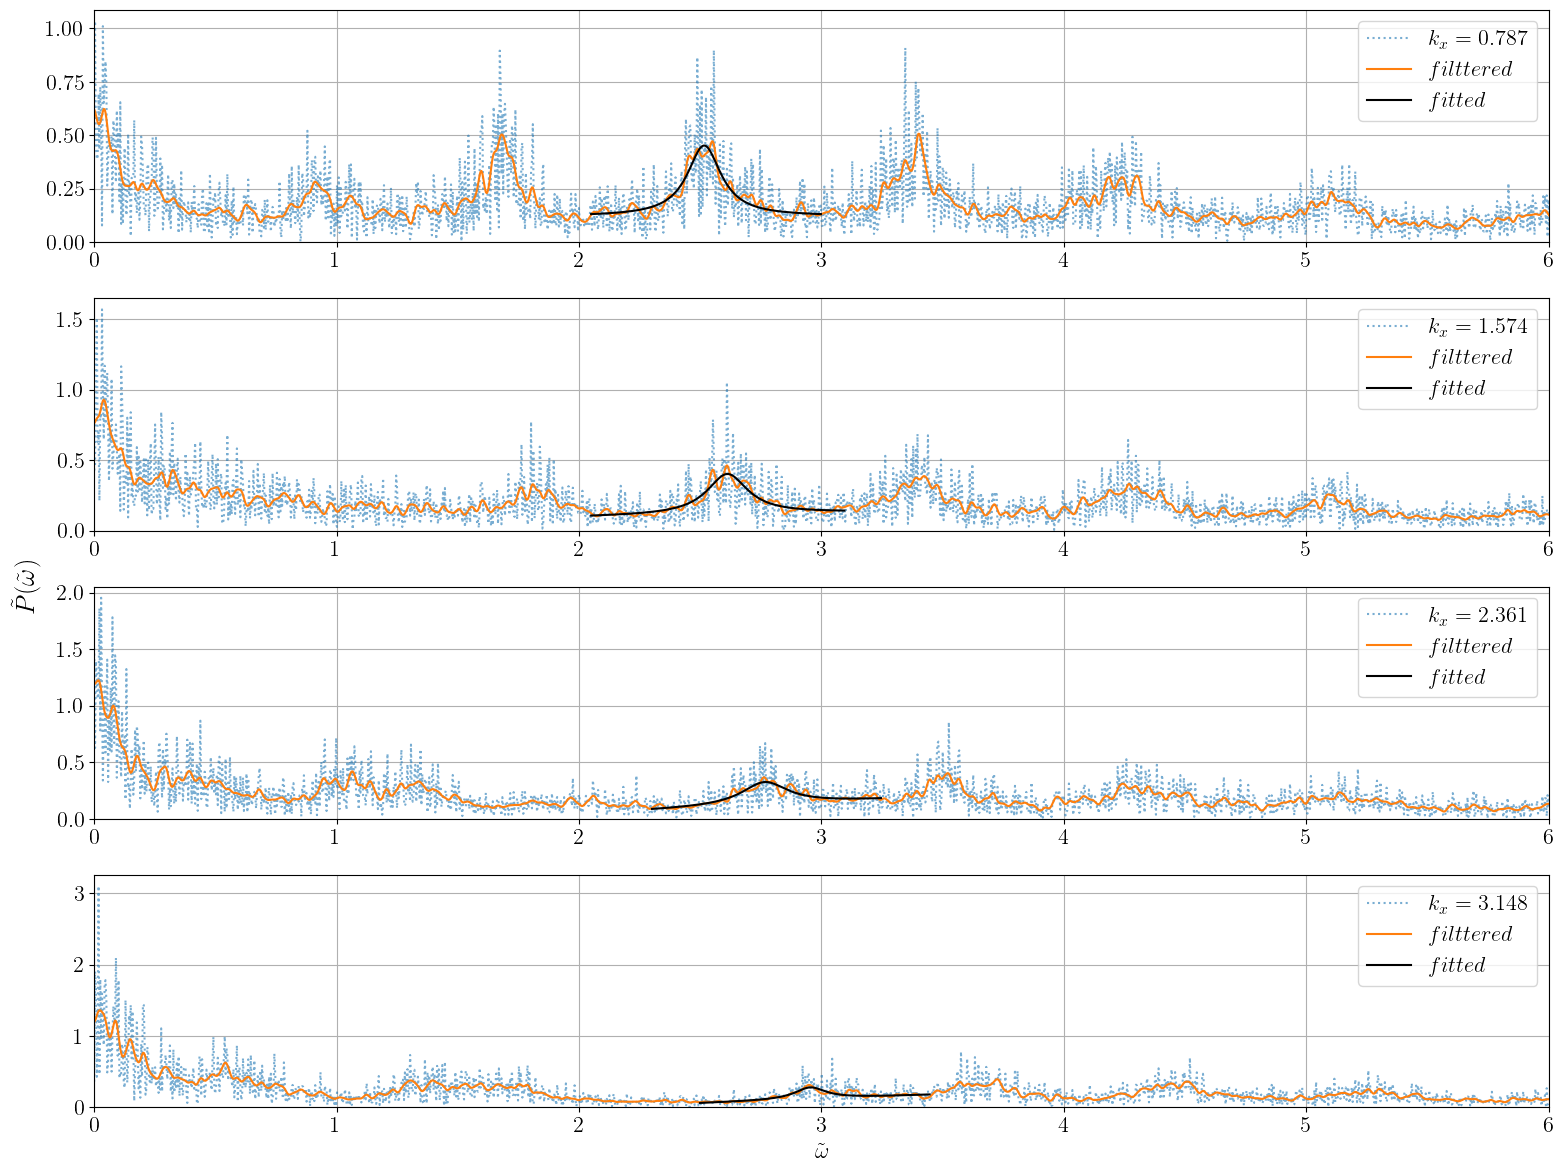

In [176]:
fig, axs = plt.subplots(4,1, figsize=(16,12))#sharex=True,

axs[0].plot((om_tilde_kin[:indx_kin]), (P_k_kin[0,:indx_kin]), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[1],3)}$')
axs[0].plot((om_tilde_kin[:indx_kin]), (P_k_kin_filt[0,:indx_kin]), label=r'$filttered$')
axs[0].plot((om_tilde_kin[idl_p2_kin_1:idu_p2_kin_1]), fitted_p2_kin_lor_1, color='k', label=r'$fitted$')

# axs[0].plot(om_tilde_kin[idl_p2_kin[0]:idu_p2_kin[0]], fitted_p2_kin_lor_wobl[0,:], c='k')
# axs[1].plot((om_tilde_kin[:indx_kin]), (P_k_kin_filt[:indx_kin]), label='kinetic_filttered')
# axs[1].plot((om_tilde_kin[:indx_kin]), bl_kin, label=r'$baseline$')
# axs[1].axvline(x=idl_f)
# axs[1].axvline(x=idu_f)
axs[0].grid()
axs[0].set_xlim(0, 6)
axs[0].set_ylim(0,)
axs[0].legend()

axs[1].plot((om_tilde_kin[:indx_kin]), (P_k_kin[1,:indx_kin]), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[2],3)}$')
axs[1].plot((om_tilde_kin[:indx_kin]), (P_k_kin_filt[1,:indx_kin]), label=r'$filttered$')
axs[1].plot((om_tilde_kin[idl_p2_kin_2:idu_p2_kin_2]), fitted_p2_kin_lor_2, color='k', label=r'$fitted$')
axs[1].grid()
axs[1].set_xlim(0, 6)
axs[1].set_ylim(0,)
axs[1].legend()

axs[2].plot((om_tilde_kin[:indx_kin]), (P_k_kin[2,:indx_kin]), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[3],3)}$')
axs[2].plot((om_tilde_kin[:indx_kin]), (P_k_kin_filt[2,:indx_kin]), label=r'$filttered$')
axs[2].plot((om_tilde_kin[idl_p2_kin_3:idu_p2_kin_3]), fitted_p2_kin_lor_3, color='k', label=r'$fitted$')
axs[2].grid()
axs[2].set_xlim(0, 6)
axs[2].set_ylim(0,)
axs[2].legend()

axs[3].plot((om_tilde_kin[:indx_kin]), (P_k_kin[3,:indx_kin]), ls=':', alpha=0.6, label=fr'$k_x={round(k_tilde[4],3)}$')
axs[3].plot((om_tilde_kin[:indx_kin]), (P_k_kin_filt[3,:indx_kin]), label=r'$filttered$')
axs[3].plot((om_tilde_kin[idl_p2_kin_4:idu_p2_kin_4]), fitted_p2_kin_lor_4, color='k', label=r'$fitted$')
axs[3].grid()
axs[3].set_xlim(0, 6)
axs[3].set_ylim(0,)
axs[3].legend()


# plt.axvline(x=idl_f_kin)
# plt.axvline(x=idu_f_kin)
plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
# plt.suptitle(r"for $\tilde{k}_x=2$")
plt.tight_layout()
plt.show()

### end

## Eigenfunction

### for kinetic phase

In [177]:
# indx_z = np.arange(0, 256, 2)
indx_z = np.linspace(z[0], z[-1], 256)
uz_fourier_kin_z =  np.empty([np.shape(uz_real[indx_kin_d:indx_kin_u,:,1])[0], np.shape(uz_real[indx_kin_d:indx_kin_u,:,1])[1], len(indx_z)], dtype=complex)


for i in range(len(indx_z)):
    # exec(f'uz_fourier_{i} = np.fft.fftn(uz_real[indx_t1:indx_t2,:,indx_z[{i}]], s=None, axes=(-2, -1), norm=None)')
    # exec(f'uz_fourier_kin{i} = np.fft.fftn(uz_real[indx_kin_d:indx_kin_u,:,{i}], s=None, axes=(-2, -1), norm=None)')
    uz_fourier_kin_z[:,:,i] = np.fft.fftn(uz_real[indx_kin_d:indx_kin_u,:,i], s=None, axes=(-2, -1), norm=None)

In [178]:
uz_fourier_kin_z[:,:,:].shape

(3500, 400, 256)

In [179]:
np.shape(uz_real[indx_kin_d:indx_kin_u,:,1])

(3500, 400)

In [180]:
idl_p1_kin_z = np.argmin(np.abs(om_tilde_kin - 1.5))
idu_p1_kin_z = np.argmin(np.abs(om_tilde_kin - 2.3))

In [181]:
P_k2_kin_z = np.zeros([len(indx_z),uz_fourier_kin_z[:,:,:].shape[0]])
P_k2_kin_filt_z = np.empty([len(indx_z), P_k2_kin_z[:,:indx_kin].shape[1]])
# idl_p1_kin_z = np.empty(len(indx_z))
# idu_p1_kin_z = np.empty(len(indx_z))
sig_tot_kin_z = np.empty([len(indx_z), P_k2_kin_z[:,:indx_kin].shape[1]])
sig_kin_z = np.empty(len(indx_z))
sig_kin_p1_z = np.empty([len(indx_z),sig_tot_kin_z[i, idl_p1_kin_z:idu_p1_kin_z].shape[0]])


para_p1_z_kin_lor = np.empty([len(indx_z),5])#4
cov_p1_z_kin_lor = np.empty([len(indx_z),4])
fitted_p1_z_kin_lor = np.empty([len(indx_z), om_tilde_kin[idl_p1_kin_z:idu_p1_kin_z].shape[0]])
fitted_p1_z_kin_lor_wobl = np.empty([len(indx_z), om_tilde_kin[idl_p1_kin_z:idu_p1_kin_z].shape[0]])
mode_strength = np.zeros(len(indx_z))

In [182]:
for i in range(len(indx_z)):
    P_k2_kin_z[i,:] = np.abs(uz_fourier_kin_z[:,6,i]/D**2)
    P_k2_kin_filt_z[i,:] = gaussian_filter(P_k2_kin_z[i,:indx_kin],3)
    # idl_p1_kin_z = np.argmin(np.abs(om_tilde_kin - 1.4))
    # idu_p1_kin_z = np.argmin(np.abs(om_tilde_kin - 2.2))
    sig_tot_kin_z[i,:] = (P_k2_kin_z[i,:indx_kin]-P_k2_kin_filt_z[i,:])**2  
    sig_kin_z[i] = np.sqrt(sum(sig_tot_kin_z[i,:])/len(sig_tot_kin_z[i,:]))

    sig_kin_p1_z[i] = sig_kin_z[i]*np.ones(sig_tot_kin_z[i,idl_p1_kin_z:idu_p1_kin_z].shape[0])  #FIXME:idl_p1_kin_z:idu_p1_kin_z
    
    # para_p1_z_kin_lor[i,:], _ = curve_fit(lorentzian, om_tilde_kin[idl_p1_kin_z:idu_p1_kin_z], P_k2_kin_z[i, idl_p1_kin_z:idu_p1_kin_z], p0 = np.array([600,1.7,-2,100]), sigma=sig_kin_p1_z[i]) #sigma=sig_tot[idl_f_kin:idu_f_kin]

    try:
        para_p1_z_kin_lor[i,:], _ = curve_fit(lorentzian, om_tilde_kin[idl_p1_kin_z:idu_p1_kin_z], P_k2_kin_z[i, idl_p1_kin_z:idu_p1_kin_z], p0 = np.array([1,1.8,-2,100, 0.1]), sigma=sig_kin_p1_z[i], bounds=((0,1.5,-np.inf,0,-50),(10,2.3,2,400,20))) #sigma=sig_tot[idl_f_kin:idu_f_kin]
    except RuntimeError:
        para_p1_z_kin_lor[i,:] = np.nan
    except ValueError:
        para_p1_z_kin_lor[i,:] = np.nan

    fitted_p1_z_kin_lor[i,:] = lorentzian(om_tilde_kin[idl_p1_kin_z:idu_p1_kin_z], *para_p1_z_kin_lor[i])

    #without baseline
    # fitted_p1_z_kin_lor_wobl[i,:] = fitted_p1_z_kin_lor[i,:] - para_p1_z_kin_lor[i,3]
    fitted_p1_z_kin_lor_wobl[i,:] = fitted_p1_z_kin_lor[i,:]-para_p1_z_kin_lor[i,3]-om_tilde_kin[idl_p1_kin_z:idu_p1_kin_z]*para_p1_z_kin_lor[i,4]
    mode_strength[i] = trap(fitted_p1_z_kin_lor_wobl[i,:])

/mnt/home/student/cmondal/miniconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:931: RuntimeWarning:

divide by zero encountered in divide



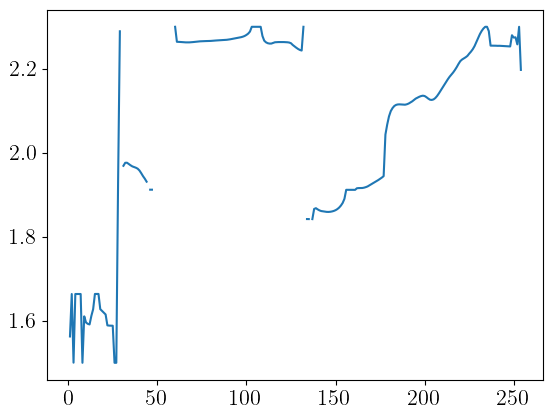

In [183]:
plt.plot(para_p1_z_kin_lor[:,1])

In [184]:
fitted_p1_z_kin_lor.shape, om_tilde_kin[idl_p1_kin_z:idu_p1_kin_z].shape

((256, 223), (223,))

In [185]:
para_p1_z_kin_lor[50,:]

array([nan, nan, nan, nan, nan])

(0.0, 24830.62121087152)

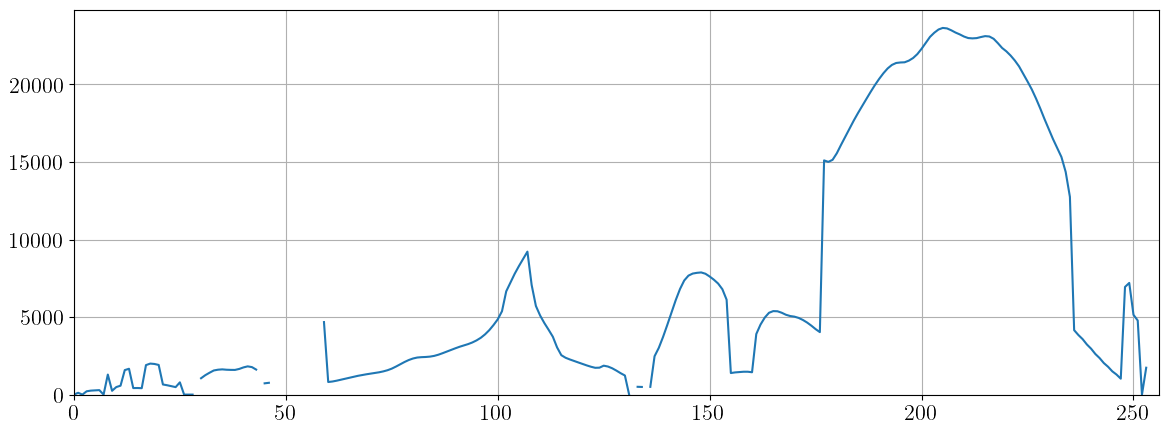

In [186]:
fig = plt.subplots(figsize=(14,5))
plt.plot(mode_strength[1:255])
plt.grid()
plt.xlim(0,256)
plt.ylim(0,)

In [187]:
para_p1_z_kin_lor[50,:]

array([nan, nan, nan, nan, nan])

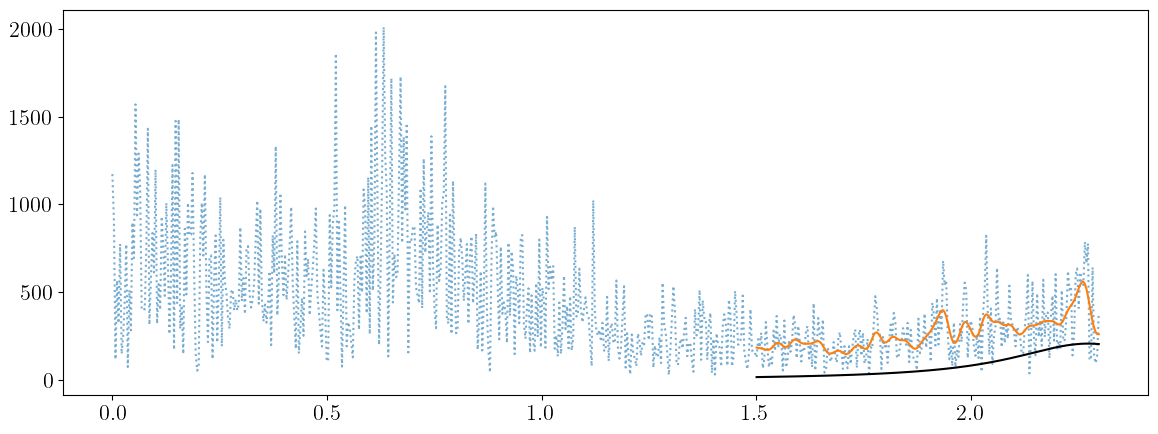

In [188]:
zsurf = 230
fig, axs = plt.subplots(1,1, sharey=True, figsize=(14,5))

axs.plot(om_tilde_kin[:idu_p1_kin_z], P_k2_kin_z[zsurf,:idu_p1_kin_z], ls=':', alpha=0.6)#P_k2_kin_z[i,:indx_kin]
axs.plot(om_tilde_kin[idl_p1_kin_z:idu_p1_kin_z], P_k2_kin_filt_z[zsurf,idl_p1_kin_z:idu_p1_kin_z])
axs.plot(om_tilde_kin[idl_p1_kin_z:idu_p1_kin_z], fitted_p1_z_kin_lor_wobl[zsurf,:], c='k')
# axs.plot(om_tilde_kin[idl_p1_kin_z:idu_p1_kin_z], lorentzian(om_tilde_kin[idl_p1_kin_z:idu_p1_kin_z],0.79738279,   1.80325416,  -5.32655363, 146.57310256,
#       # -35.01062439), ls=':', c='k')
# plt.xlim(0, 2*np.pi)
# plt.ylim(0,1000)

## k vs. mode parameters

In [189]:
P_k2_kin

array([0.51296817, 0.96875231, 0.38203058, ..., 0.72700501, 0.62770464,
       0.72881872])

In [190]:
# P_k2_kin_z = np.zeros([len(indx_z),uz_fourier_kin_z[:,:,:].shape[0]])
# uz_fourier_kin_z[:,:,:].shape[0]

In [191]:

k_values = np.array([0.5, 1.0, 1.5, 2.0])
indx_k_modes = np.zeros(len(k_values))

In [192]:
# P_k_kin = np.zeros([5,uz_fourier_kin_z[:,:,:].shape[0]])
# how_many_modes = 4

In [193]:
uz_fourier_kin[:,:].shape[0]

3500

In [194]:
sig_tot_kin.shape

(4, 1751)

In [195]:
# P_k_kin = np.zeros([4,uz_fourier_kin[:,:].shape[0]])
# P_k_kin_filt = np.empty([4, P_k_kin[:,:indx_kin].shape[1]])
# idl_p2_kin = np.empty(4,dtype=np.int16)
# idu_p2_kin = np.empty(4,dtype=np.int16)
# sig_tot_kin = np.empty([4, P_k_kin[:,:indx_kin].shape[1]])
# sig_kin = np.empty(4)
# para_p2_kin_lor = np.empty([4,5])#4
# cov_p2_kin_lor = np.empty([4,4])
# mode_strength_p = np.zeros(4)

In [196]:
# low_indx = np.array([2., 2.1, 2.2, 2.5])
# up_indx = np.array([3., 3.1, 3.2, 3.5])
# peak = np.array([2.5, 2.6, 2.8, 3.0])
# for i in range(0, how_many_modes):
#     idl_p2_kin[i] = np.argmin(np.abs(om_tilde_kin - low_indx[i]))
#     idu_p2_kin[i] = np.argmin(np.abs(om_tilde_kin - up_indx[i]))

In [197]:
idl_p2_kin

array([571, 571, 641, 696])

In [198]:
idu_p2_kin

array([836, 863, 905, 961])

In [199]:
P_k_kin.shape, P_k_kin_filt.shape

((4, 3500), (4, 1751))

In [200]:

# for i in range(len(k_values)):
#     indx_k_modes[i] = np.argmin(np.abs(k_tilde - k_values[i]))

# P_k_kin = np.zeros([5,uz_fourier_kin_z[:,:,:].shape[0]])

In [201]:
# for i in range(1,len(P_k_kin)):
#     P_k_kin[i-1,:] = np.abs(uz_fourier_kin[:,i]/D**2)

In [202]:
P_k_kin.shape

(4, 3500)

In [203]:
sig_kin_p2 = np.empty([how_many_modes,sig_tot_kin[i, idl_p2_kin[i]:idu_p2_kin[i]].shape[0]])


NameError: name 'how_many_modes' is not defined

In [ ]:
idl_p2_kin[1]

501

In [ ]:
# for i in range(0,how_many_modes):
#     P_k_kin[i,:] = np.abs(uz_fourier_kin[:,i+1]/D**2)
#     P_k_kin_filt[i,:] = gaussian_filter(P_k_kin[i,:indx_kin],3)

#     sig_tot_kin[i,:] = (P_k_kin[i,:indx_kin]-P_k_kin_filt[i,:])**2  
#     sig_kin[i] = np.sqrt(sum(sig_tot_kin[i,:])/len(sig_tot_kin[i,:]))
#     sig_kin_p2 = np.empty([how_many_modes,sig_tot_kin[i, idl_p2_kin[i]:idu_p2_kin[i]].shape[0]])

#     sig_kin_p2[i] = sig_kin[i]*np.ones(sig_tot_kin[i,idl_p2_kin[i]:idu_p2_kin[i]].shape[0])  #FIXME:idl_p2_kin[i]:idu_p2_kin[i]
    
#     fitted_p2_kin_lor = np.empty([how_many_modes, om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]].shape[0]])
#     fitted_p2_kin_lor_wobl = np.empty([how_many_modes, om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]].shape[0]])

#     # para_p2_kin_lor[i,:], _ = curve_fit(lorentzian, om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]], P_k_kin[i, idl_p2_kin[i]:idu_p2_kin[i]], p0 = np.array([600,1.7,-2,100]), sigma=sig_kin_p2[i]) #sigma=sig_tot[idl_f_kin:idu_f_kin]

#     try:
#         para_p2_kin_lor[i,:], _ = curve_fit(lorentzian, om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]], P_k_kin[i, idl_p2_kin[i]:idu_p2_kin[i]], p0 = np.array([2,peak[i],-4,77, 8.1]), sigma=sig_kin_p2[i])#, bounds=((0,idl_p2_kin[i],-400,0,-50),(10,idu_p2_kin[i],2,400,20))) #sigma=sig_tot[idl_f_kin:idu_f_kin]
#     except RuntimeError:
#         para_p2_kin_lor[i,:] = np.nan
#     except ValueError:
#         para_p2_kin_lor[i,:] = np.nan

#     fitted_p2_kin_lor[i,:] = lorentzian(om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]], *para_p2_kin_lor[i])

#     #without baseline
#     # fitted_p2_kin_lor_wobl[i,:] = fitted_p2_kin_lor[i,:] - para_p2_kin_lor[i,3]
#     fitted_p2_kin_lor_wobl[i,:] = fitted_p2_kin_lor[i,:]-para_p2_kin_lor[i,3]-om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]]*para_p2_kin_lor[i,4]
#     mode_strength_p[i] = trap(fitted_p2_kin_lor_wobl[i,:])

In [ ]:
om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]].shape

(239,)

In [ ]:
fitted_p2_kin_lor_wobl[0,:]

array([1.15889202e-310, 1.15889202e-310, 0.00000000e+000, 0.00000000e+000,
       1.26856446e+002, 1.26856446e+002, 1.26856446e+002, 1.26856446e+002,
       1.26856446e+002, 1.26856446e+002, 1.26856446e+002, 1.26856446e+002,
       1.26856446e+002, 1.26856446e+002, 1.26856446e+002, 1.26856446e+002,
       1.26856446e+002, 1.26856446e+002, 1.26856446e+002, 1.26856446e+002,
       1.26856446e+002, 1.26856446e+002, 1.26856446e+002, 1.26856446e+002,
       1.26856446e+002, 1.26856446e+002, 1.26856446e+002, 1.26856446e+002,
       1.26856446e+002, 1.26856446e+002, 1.26856446e+002, 1.26856446e+002,
       1.26856446e+002, 1.26856446e+002, 1.26856446e+002, 1.26856446e+002,
       1.26856446e+002, 1.26856446e+002, 1.26856446e+002, 1.26856446e+002,
       1.26856446e+002, 1.26856446e+002, 1.26856446e+002, 1.26856446e+002,
       1.26856446e+002, 1.26856446e+002, 1.26856446e+002, 1.26856446e+002,
       1.26856446e+002, 1.26856446e+002, 1.26856446e+002, 1.26856446e+002,
       1.26856446e+002, 1

In [ ]:
fitted_p2_kin_lor_wobl[2,:]

array([ 92.55299688,  93.12539253,  93.70025439,  94.27765267,
        94.85766007,  95.44035188,  96.02580609,  96.61410347,
        97.20532776,  97.79956573,  98.39690736,  98.99744593,
        99.60127823, 100.20850465, 100.81922939, 101.43356061,
       102.0516106 , 102.67349598, 103.29933789, 103.92926223,
       104.56339981, 105.20188665, 105.84486419, 106.49247956,
       107.14488583, 107.80224232, 108.46471486, 109.13247617,
       109.80570612, 110.48459217, 111.16932965, 111.86012221,
       112.55718224, 113.26073127, 113.97100049, 114.68823118,
       115.41267528, 116.14459592, 116.88426799, 117.63197881,
       118.38802872, 119.1527318 , 119.92641662, 120.70942701,
       121.50212286, 122.30488103, 123.11809628, 123.94218222,
       124.77757242, 125.62472145, 126.48410613, 127.35622671,
       128.2416083 , 129.14080221, 130.05438747, 130.98297246,
       131.9271966 , 132.88773215, 133.86528613, 134.8606024 ,
       135.8744638 , 136.90769449, 137.96116237, 139.03

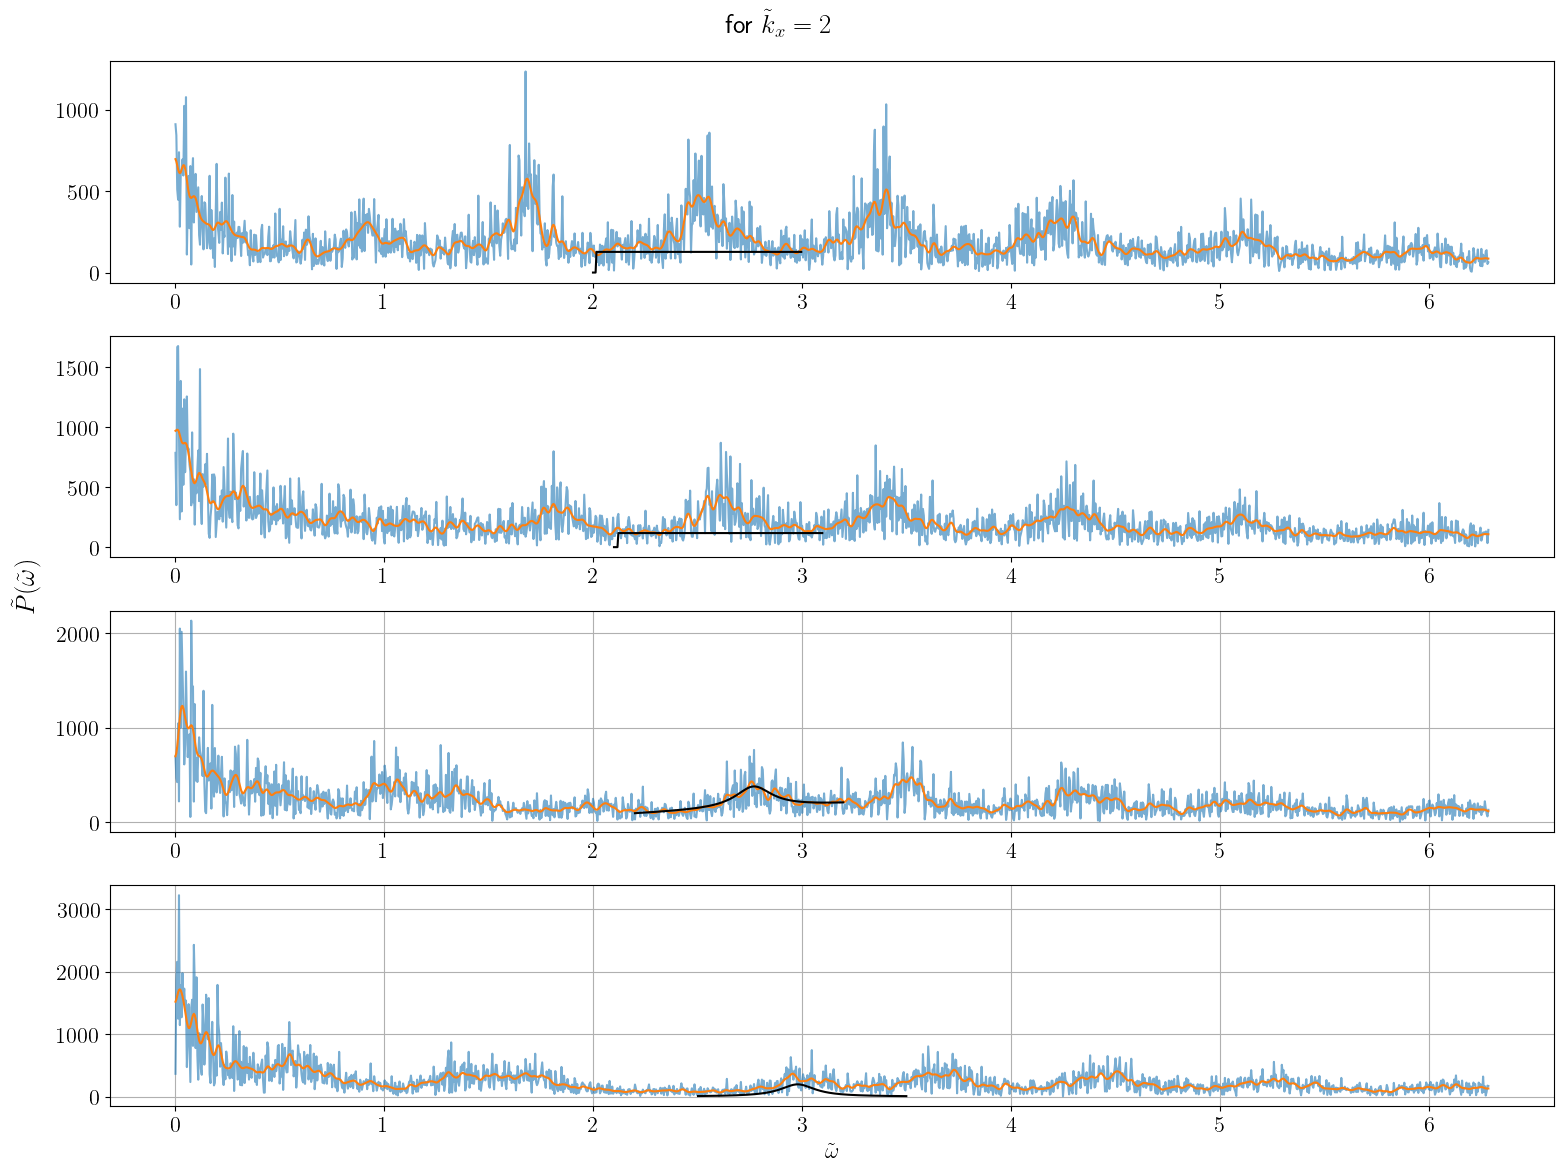

In [ ]:
fig, axs = plt.subplots(4,1, figsize=(16,12))#sharex=True,

axs[0].plot((om_tilde_kin[:indx_kin]), (P_k_kin[0,:indx_kin]), alpha=0.6, label='kinetic')
axs[0].plot((om_tilde_kin[:indx_kin]), (P_k_kin_filt[0,:indx_kin]), label='kinetic_filttered')
axs[0].plot(om_tilde_kin[idl_p2_kin[0]:idu_p2_kin[0]], fitted_p2_kin_lor_wobl[0,:], c='k')
# axs[1].plot((om_tilde_kin[:indx_kin]), (P_k_kin_filt[:indx_kin]), label='kinetic_filttered')
# axs[1].plot((om_tilde_kin[:indx_kin]), bl_kin, label=r'$baseline$')
# axs[1].axvline(x=idl_f)
# axs[1].axvline(x=idu_f)
# axs[1].grid()
# # axs[1].set_xlim(0, 6)
# # axs[1].set_ylim(0,)
# axs[1].legend()

axs[1].plot((om_tilde_kin[:indx_kin]), (P_k_kin[1,:indx_kin]), alpha=0.6, label='kinetic')
axs[1].plot((om_tilde_kin[:indx_kin]), (P_k_kin_filt[1,:indx_kin]), label='kinetic_filttered')
axs[1].plot(om_tilde_kin[idl_p2_kin[1]:idu_p2_kin[1]], fitted_p2_kin_lor_wobl[1,:], c='k')
# axs[1].grid()
# # axs[2].set_xlim(0, 6)
# # axs[2].set_ylim(0,)
# axs[2].legend()

axs[2].plot((om_tilde_kin[:indx_kin]), (P_k_kin[2,:indx_kin]), alpha=0.6, label='kinetic')
axs[2].plot((om_tilde_kin[:indx_kin]), (P_k_kin_filt[2,:indx_kin]), label='kinetic_filttered')
axs[2].plot(om_tilde_kin[idl_p2_kin[2]:idu_p2_kin[2]], fitted_p2_kin_lor_wobl[2,:], c='k')
axs[2].grid()
# axs[3].set_xlim(0, 6)
# axs[3].set_ylim(0,)
# axs[3].legend()

axs[3].plot((om_tilde_kin[:indx_kin]), (P_k_kin[3,:indx_kin]), alpha=0.6, label='kinetic')
axs[3].plot((om_tilde_kin[:indx_kin]), (P_k_kin_filt[3,:indx_kin]), label='kinetic_filttered')
axs[3].plot(om_tilde_kin[idl_p2_kin[3]:idu_p2_kin[3]], fitted_p2_kin_lor_wobl[3,:], c='k')
axs[3].grid()
# axs[4].set_xlim(0, 6)
# axs[4].set_ylim(0,)
# axs[4].legend()


# plt.axvline(x=idl_f_kin)
# plt.axvline(x=idu_f_kin)
plt.xlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.suptitle(r"for $\tilde{k}_x=2$")
plt.tight_layout()
plt.show()

In [ ]:
# P_k_kin = np.zeros([how_many_modes,uz_fourier_kin[:,:].shape[0]])
# P_k_kin_filt = np.empty([how_many_modes, P_k_kin[:,:indx_kin].shape[1]])
# idl_p2_kin = np.empty(how_many_modes,dtype=np.int16)
# idu_p2_kin = np.empty(how_many_modes,dtype=np.int16)
# sig_tot_kin = np.empty([how_many_modes, P_k_kin[:,:indx_kin].shape[1]])
# sig_kin = np.empty([how_many_modes, P_k_kin[:,:indx_kin].shape[1]])
# # sig_kin = np.empty(how_many_modes)


# para_p2_kin_lor = np.empty([how_many_modes,5])#4
# cov_p2_kin_lor = np.empty([how_many_modes,4])
# mode_strength_p = np.zeros(how_many_modes)

In [ ]:
# low_indx = np.array([2., 2.1, 2.3, 2.5])
# up_indx = np.array([3., 3.1, 3.2, 3.5])
# peak = np.array([2.5, 2.6, 2.8, 3.0])
# for i in range(0, how_many_modes):
#     idl_p2_kin[i] = np.argmin(np.abs(om_tilde_kin - low_indx[i]))
#     idu_p2_kin[i] = np.argmin(np.abs(om_tilde_kin - up_indx[i]))

In [ ]:
# i = 0
# P_k_kin[i,:] = np.abs(uz_fourier_kin[:,i+1]/D**2)
# P_k_kin_filt[i,:] = gaussian_filter(P_k_kin[i,:indx_kin],3)

# sig_tot_kin[i,:] = (P_k_kin[i,:indx_kin]-P_k_kin_filt[i,:])**2  
# sig_kin[i,:] = np.sqrt((sig_tot_kin[i,:])/len(sig_tot_kin[i,:]))
# sig_kin_p2 = np.empty([how_many_modes,sig_tot_kin[i, idl_p2_kin[i]:idu_p2_kin[i]].shape[0]])

# sig_kin_p2[i] = sig_kin[i,idl_p2_kin[i]:idu_p2_kin[i]]*np.ones(sig_tot_kin[i,idl_p2_kin[i]:idu_p2_kin[i]].shape[0])  #FIXME:idl_p2_kin[i]:idu_p2_kin[i]

# fitted_p2_kin_lor = np.empty([how_many_modes, om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]].shape[0]])
# fitted_p2_kin_lor_wobl = np.empty([how_many_modes, om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]].shape[0]])

# # para_p2_kin_lor[i,:], _ = curve_fit(lorentzian, om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]], P_k_kin[i, idl_p2_kin[i]:idu_p2_kin[i]], p0 = np.array([600,1.7,-2,100]), sigma=sig_kin_p2[i]) #sigma=sig_tot[idl_f_kin:idu_f_kin]

# try:
#     para_p2_kin_lor[i,:], _ = curve_fit(lorentzian, om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]], P_k_kin[i, idl_p2_kin[i]:idu_p2_kin[i]], p0 = np.array([2,peak[i],-4,77, 8.1]), sigma=sig_kin_p2[i], bounds=((0,idl_p2_kin[i],-400,0,-50),(10,idu_p2_kin[i],2,400,20))) #sigma=sig_tot[idl_f_kin:idu_f_kin]
# except RuntimeError:
#     para_p2_kin_lor[i,:] = np.nan
# except ValueError:
#     para_p2_kin_lor[i,:] = np.nan

# fitted_p2_kin_lor[i,:] = lorentzian(om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]], *para_p2_kin_lor[i])

# #without baseline
# # fitted_p2_kin_lor_wobl[i,:] = fitted_p2_kin_lor[i,:] - para_p2_kin_lor[i,3]
# fitted_p2_kin_lor_wobl[i,:] = fitted_p2_kin_lor[i,:]-para_p2_kin_lor[i,3]-om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]]*para_p2_kin_lor[i,4]
# mode_strength_p[i] = trap(fitted_p2_kin_lor_wobl[i,:])

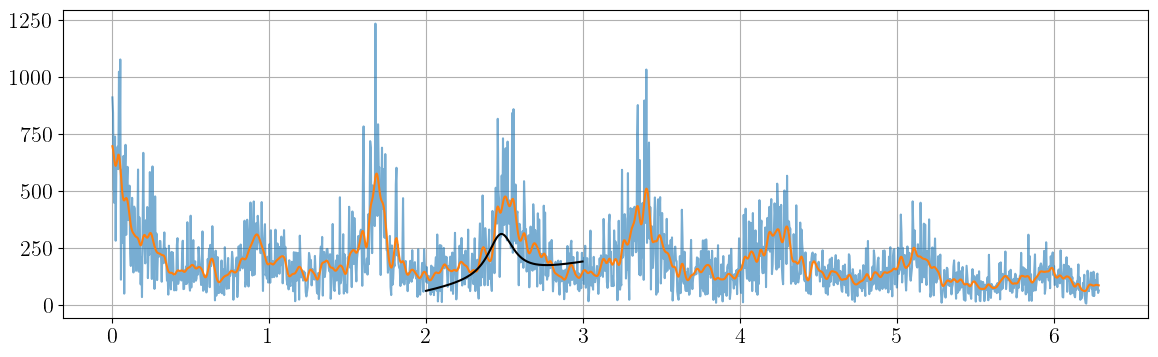

In [ ]:
fig = plt.figure(figsize=(14,4))
plt.plot((om_tilde_kin[:indx_kin]), (P_k_kin[i,:indx_kin]), alpha=0.6, label='kinetic')
plt.plot((om_tilde_kin[:indx_kin]), (P_k_kin_filt[i,:indx_kin]), label='kinetic_filttered')
plt.plot(om_tilde_kin[idl_p2_kin[i]:idu_p2_kin[i]], fitted_p2_kin_lor_wobl[3,:], c='k')
plt.grid()

In [ ]:

# P_k_kin[i,:] = np.abs(uz_fourier_kin[:,i+1]/D**2)
# P_k_kin_filt[i,:] = gaussian_filter(P_k_kin[i,:indx_kin],3)

## end

In [ ]:
def allinone(i):
    exec(f'P_k2_kin_z{i} = np.abs(uz_fourier_kin{i}[:,2]/D**2)')
    exec(f'P_k2_kin_filt_z{i} = gaussian_filter(P_k2_kin_z{i}[:indx_kin],3)')
    exec(f'idl_p1_kin_z{i} = np.argmin(np.abs(om_tilde_kin - 1.1))')
    exec(f'idu_p1_kin_z{i} = np.argmin(np.abs(om_tilde_kin - 1.5))')
    exec(f'sig_tot_kin_z{i} = (P_k2_kin_z{i}[:indx_kin]-P_k2_kin_filt_z{i}[:])**2')
    exec(f'sig_kin_z{i} = np.sqrt(sum(sig_tot_kin_z{i})/len(sig_tot_kin_z{i}))')
    exec(f'sig_kin_p1_z{i} = sig_kin_z{i}*np.ones(len(sig_tot_kin_z{i}[idl_p1_kin_z{i}:idu_p1_kin_z{i}]))')
    # exec(f'para_p1_z{i}_kin_lor, cov_p1_z{i}_kin_lor = curve_fit(lorentzian, om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}], P_k2_kin_z{i}[idl_p1_kin_z{i}:idu_p1_kin_z{i}], p0 = np.array([1000,.93,-2,400]), sigma=sig_kin_p1_z{i})') #sigma=sig_tot[idl_f_kin:idu_f_kin],
    # exec(f'fitted_p1_z{i}_kin_lor = lorentzian(om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}], *para_p1_z{i}_kin_lor)')
    exec(f'fig, axs = plt.subplots(1,1, sharey=True, figsize=(8,5))')

    exec(f'axs.plot((om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}]), (P_k2_kin_z{i}[idl_p1_kin_z{i}:idu_p1_kin_z{i}]), alpha=0.6)')
    exec(f'axs.plot((om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}]), (P_k2_kin_filt_z{i}[idl_p1_kin_z{i}:idu_p1_kin_z{i}]))')
    # exec(f'axs.plot((om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}]), fitted_p1_z{i}_kin_lor, color="k")')
    # axs.legend()

    exec(f"plt.suptitle('p-modes for kinetic phase')")
    exec("plt.xlabel(r'$\\tilde{\omega}$')")
    exec("plt.ylabel(r'$\\tilde{P}(\\tilde{\omega})$')")
    exec(f"plt.tight_layout()")
    exec(f"plt.show()")

In [ ]:
def fit(i):
    exec(f'P_k2_kin_z{i} = np.abs(uz_fourier_kin{i}[:,2]/D**2)')
    exec(f'P_k2_kin_filt_z{i} = gaussian_filter(P_k2_kin_z{i}[:indx_kin],3)')
    exec(f'idl_p1_kin_z{i} = np.argmin(np.abs(om_tilde_kin - 1.1))')
    exec(f'idu_p1_kin_z{i} = np.argmin(np.abs(om_tilde_kin - 1.5))')
    exec(f'sig_tot_kin_z{i} = (P_k2_kin_z{i}[:indx_kin]-P_k2_kin_filt_z{i}[:])**2')
    exec(f'sig_kin_z{i} = np.sqrt(sum(sig_tot_kin_z{i})/len(sig_tot_kin_z{i}))')
    exec(f'sig_kin_p1_z{i} = sig_kin_z{i}*np.ones(len(sig_tot_kin_z{i}[idl_p1_kin_z{i}:idu_p1_kin_z{i}]))')
    exec(f'para_p1_z{i}_kin_lor, cov_p1_z{i}_kin_lor = curve_fit(lorentzian, om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}], P_k2_kin_z{i}[idl_p1_kin_z{i}:idu_p1_kin_z{i}], p0 = np.array([1000,.93,-2,400]), sigma=sig_kin_p1_z{i})') #sigma=sig_tot[idl_f_kin:idu_f_kin],
    exec(f'fitted_p1_z{i}_kin_lor = lorentzian(om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}], *para_p1_z{i}_kin_lor)')
    exec(f'fit_lor = fitted_p1_z{i}_kin_lor-para_p1_z{i}_kin_lor[-1]')
    

In [ ]:
def eigenfunction(i):
    exec(f'P_k2_kin_z{i} = np.abs(uz_fourier_kin{i}[:,2]/D**2)')
    exec(f'P_k2_kin_filt_z{i} = gaussian_filter(P_k2_kin_z{i}[:indx_kin],3)')
    exec(f'idl_p1_kin_z{i} = np.argmin(np.abs(om_tilde_kin - 1.1))')
    exec(f'idu_p1_kin_z{i} = np.argmin(np.abs(om_tilde_kin - 1.5))')
    exec(f'sig_tot_kin_z{i} = (P_k2_kin_z{i}[:indx_kin]-P_k2_kin_filt_z{i}[:])**2')
    exec(f'sig_kin_z{i} = np.sqrt(sum(sig_tot_kin_z{i})/len(sig_tot_kin_z{i}))')
    exec(f'sig_kin_p1_z{i} = sig_kin_z{i}*np.ones(len(sig_tot_kin_z{i}[idl_p1_kin_z{i}:idu_p1_kin_z{i}]))')
    exec(f'para_p1_z{i}_kin_lor, cov_p1_z{i}_kin_lor = curve_fit(lorentzian, om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}], P_k2_kin_z{i}[idl_p1_kin_z{i}:idu_p1_kin_z{i}], p0 = np.array([1000,.93,-2,400]), sigma=sig_kin_p1_z{i})') #sigma=sig_tot[idl_f_kin:idu_f_kin],
    exec(f'fitted_p1_z{i}_kin_lor = lorentzian(om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}], *para_p1_z{i}_kin_lor)')
    exec(f'fit_lor{i} = fitted_p1_z{i}_kin_lor-para_p1_z{i}_kin_lor[-1]')
    exec(f'eigen{i}=trap(fit_lor{i})')

In [ ]:
def allinone_fig_wobase(i):
    exec(f'P_k2_kin_z{i} = np.abs(uz_fourier_kin{i}[:,2]/D**2)')
    exec(f'P_k2_kin_filt_z{i} = gaussian_filter(P_k2_kin_z{i}[:indx_kin],3)')
    exec(f'idl_p1_kin_z{i} = np.argmin(np.abs(om_tilde_kin - 1.1))')
    exec(f'idu_p1_kin_z{i} = np.argmin(np.abs(om_tilde_kin - 1.5))')
    exec(f'sig_tot_kin_z{i} = (P_k2_kin_z{i}[:indx_kin]-P_k2_kin_filt_z{i}[:])**2')
    exec(f'sig_kin_z{i} = np.sqrt(sum(sig_tot_kin_z{i})/len(sig_tot_kin_z{i}))')
    exec(f'sig_kin_p1_z{i} = sig_kin_z{i}*np.ones(len(sig_tot_kin_z{i}[idl_p1_kin_z{i}:idu_p1_kin_z{i}]))')
    exec(f'para_p1_z{i}_kin_lor, cov_p1_z{i}_kin_lor = curve_fit(lorentzian, om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}], P_k2_kin_z{i}[idl_p1_kin_z{i}:idu_p1_kin_z{i}], p0 = np.array([1000,.93,-2,400]), sigma=sig_kin_p1_z{i})') #sigma=sig_tot[idl_f_kin:idu_f_kin],
    exec(f'fitted_p1_z{i}_kin_lor = lorentzian(om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}], *para_p1_z{i}_kin_lor)')
    exec(f'fig, axs = plt.subplots(1,1, sharey=True, figsize=(8,5))')

    # exec(f'axs.plot((om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}]), (P_k2_kin_z{i}[idl_p1_kin_z{i}:idu_p1_kin_z{i}]), alpha=0.6)')
    # exec(f'axs.plot((om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}]), (P_k2_kin_filt_z{i}[idl_p1_kin_z{i}:idu_p1_kin_z{i}]))')
    exec(f'axs.plot((om_tilde_kin[idl_p1_kin_z{i}:idu_p1_kin_z{i}]), fitted_p1_z{i}_kin_lor-para_p1_z{i}_kin_lor[-1], color="k")')
    # axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k')
    # axs.legend()
    exec('axs.axhline(y=0, ls=":")')
    exec('axs.set_ylim(0,)')
    exec('plt.suptitle("p-modes for kinetic phase")')
    exec('plt.xlabel(r"$\\tilde{\omega}$")')
    exec('plt.ylabel(r"$\\tilde{P}(\\tilde{\omega})$")')
    exec('plt.tight_layout()')
    return axs

In [ ]:

for i in range(len(indx_z)):
    # exec(f'uz_fourier_{i} = np.fft.fftn(uz_real[indx_t1:indx_t2,:,indx_z[{i}]], s=None, axes=(-2, -1), norm=None)')
    exec(f'uz_fourier_kin{i} = np.fft.fftn(uz_real[indx_kin_d:indx_kin_u,:,{i}], s=None, axes=(-2, -1), norm=None)')

In [ ]:
# allinone_fig_wobase(100)

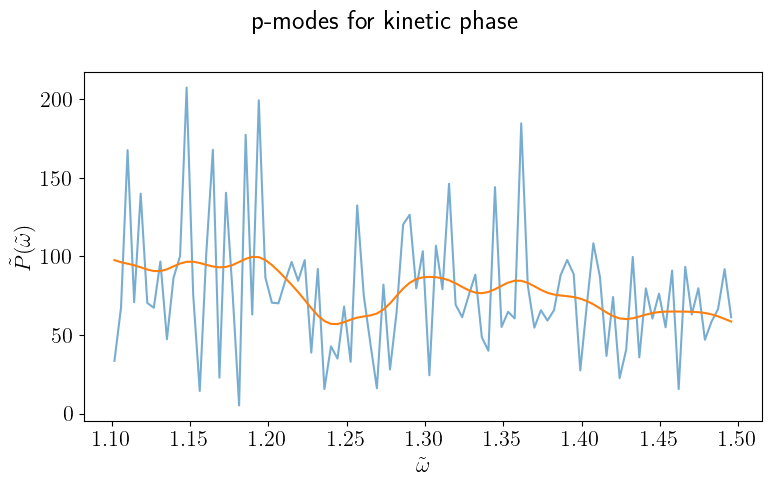

In [ ]:
allinone(20)

testing

In [ ]:
idl_p1_kin = np.argmin(np.abs(om_tilde_kin - 1.1)) 
idu_p1_kin = np.argmin(np.abs(om_tilde_kin - 1.5))

In [ ]:
P_k2_kin = np.abs(uz_fourier_kin[:,2]/D**2)
P_k2_kin_filt = gaussian_filter(P_k2_kin[:indx_kin],3)

In [ ]:
sig_tot_kin = (P_k2_kin[:indx_kin]-P_k2_kin_filt[:])**2
sig_kin = np.sqrt(sum(sig_tot_kin)/len(sig_tot_kin))


In [ ]:
sig_kin_p1 = sig_kin*np.ones(len(sig_tot_kin[idl_p1_kin:idu_p1_kin]))


In [ ]:
para_p1_kin_lor, cov_p1_kin_lor = curve_fit(lorentzian, om_tilde_kin[idl_p1_kin:idu_p1_kin], P_k2_kin[idl_p1_kin:idu_p1_kin], p0 = np.array([1000,.93,-2,400]), sigma=sig_kin_p1) #sigma=sig_tot[idl_f_kin:idu_f_kin],
fitted_p1_kin_lor = lorentzian(om_tilde_kin[idl_p1_kin:idu_p1_kin], *para_p1_kin_lor)

TypeError: lorentzian() missing 1 required positional argument: 'e'

In [ ]:
para_p1_kin_lor[-1]

444.37585239208227

In [ ]:
bl = baseline(P_k2_kin[idl_p1_kin:idu_p1_kin], deg=6)


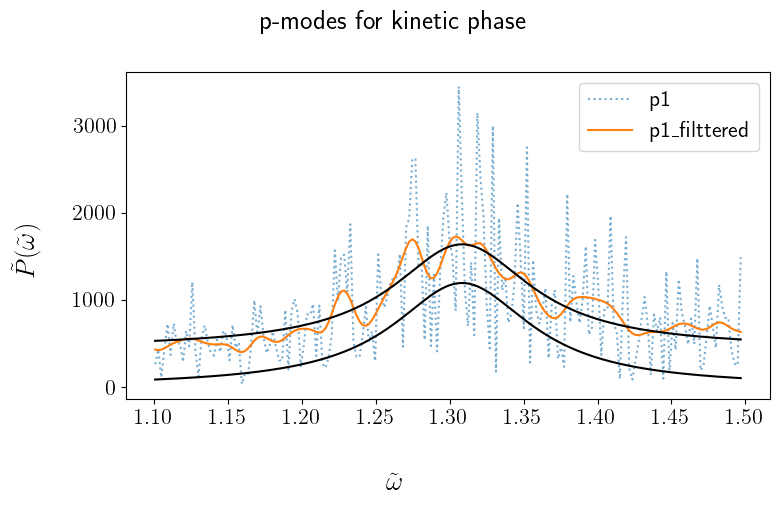

In [ ]:
fig, axs = plt.subplots(1,1, sharey=True, figsize=(8,5))

axs.plot((om_tilde_kin[idl_p1_kin:idu_p1_kin]), (P_k2_kin[idl_p1_kin:idu_p1_kin]), ls=":", alpha=0.6, label='p1')
axs.plot((om_tilde_kin[idl_p1_kin:idu_p1_kin]), (P_k2_kin_filt[idl_p1_kin:idu_p1_kin]), label='p1_filttered')
axs.plot((om_tilde_kin[idl_p1_kin:idu_p1_kin]), fitted_p1_kin_lor, color='k')
axs.plot((om_tilde_kin[idl_p1_kin:idu_p1_kin]), fitted_p1_kin_lor-para_p1_kin_lor[-1], color='k')
# axes[0].plot(om_tilde_kin[idl_f_kin:idu_f_kin], fitted_f_kin_lor, color='k')
axs.legend()

plt.suptitle('p-modes for kinetic phase')
fig.supxlabel(r"$\tilde{\omega}$")
fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
plt.tight_layout()
plt.show()

correct

In [ ]:
# indx_z = np.arange(0, 256, 2)
indx_z = np.linspace(z[0], z[-1], 256)

for i in range(len(indx_z)):
    # exec(f'uz_fourier_{i} = np.fft.fftn(uz_real[indx_t1:indx_t2,:,indx_z[{i}]], s=None, axes=(-2, -1), norm=None)')
    exec(f'uz_fourier_kin{i} = np.fft.fftn(uz_real[indx_kin_d:indx_kin_u,:,{i}], s=None, axes=(-2, -1), norm=None)')

In [ ]:
# om_tilde_kin

In [ ]:
labels = []

id_om_kin0 = np.argmin(np.abs(om_tilde_kin - para_f_kin_lor[1]))
for i in range(1,5):
    exec(f'id_om_kin{i} = np.argmin(np.abs(om_tilde_kin - para_p{i}_kin_lor[1]))')
    # exec(f'labels.append(para_{i})')

id_kx = np.argmin(np.abs(k_tilde - 2))

In [ ]:
# para_p1_kin_lor[1], para_p2_kin_lor[1], para_p3_kin_lor[1]

In [ ]:
array_kin = np.zeros((len(indx_z), 5), dtype='complex') # NOTE: for k_x=2 (tilde) we have found 8 modes.

for i in range(np.size(array_kin, 0)):
    for j in range(np.size(array_kin, 1)):
        exec(f'array_kin[i,j] = uz_fourier_kin{i}[id_om_kin{j}, id_kx]')

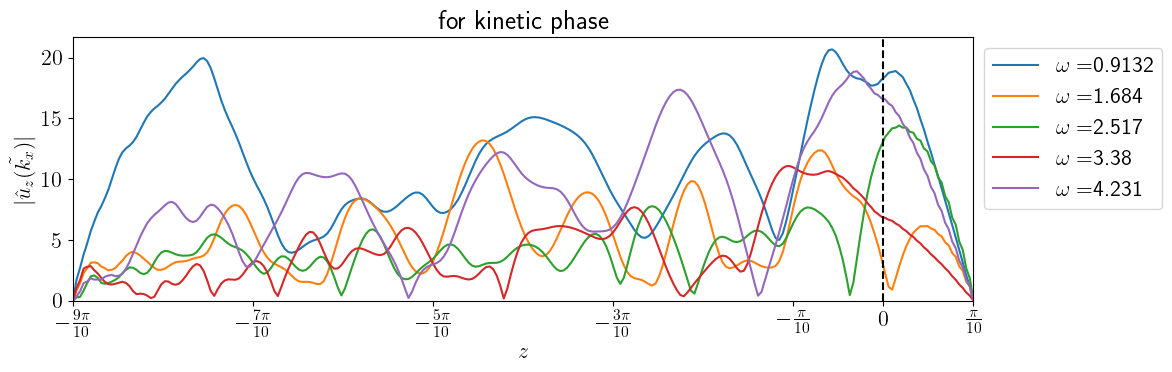

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(12,4))
ls = ['-', ':', '--', '-.', (0, (5, 10)), (0, (3, 10, 1, 10)), (5, (10, 3)), (0, (3, 1, 1, 1, 1, 1))]

for i in range(np.size(array_kin, 1)):
    exec(f'temp = id_om_kin{i}')
    # axs[0].plot(indx_z, np.real(array[:,i]), label=fr'$\omega=$om_tilde[id_om_{i}]')
    # axs.plot(indx_z, np.abs(array_kin[:,i]), ls=ls[i], label=fr'$\omega=$om_tilde_kin[id_om_{i}]')
    axs.plot(indx_z, np.abs(array_kin[:,i]), label=f'$\\omega=${om_tilde_kin[temp]:.4g}')
axs.axvline(x=0, c='k', ls='--')
axs.set_xlim(indx_z[0], indx_z[-1])
# axs[0].set_ylim(0,)
# axs[0].legend()
axs.set_xlabel(r"$z$")
axs.set_ylabel(r"$|\hat{u}_z(\tilde{k_x})|$")
xticks = (np.pi/10)*np.array([-9, -7, -5, -3, -1, 0, 1])
axs.set_xticks(xticks)
axs.set_xticklabels([r'$-\frac{9\pi}{10}$', r'$-\frac{7\pi}{10}$', r'$-\frac{5\pi}{10}$', \
                     r'$-\frac{3\pi}{10}$', r'$-\frac{\pi}{10}$', r'$0$', r'$\frac{\pi}{10}$'])
axs.set_ylim(0,)

plt.legend(loc='best', bbox_to_anchor=(1., 1.))
plt.title('for kinetic phase')
plt.tight_layout()
plt.show()

### for saturated phase

In [ ]:
# indx_z = np.arange(0, 256, 2)
indx_z = np.linspace(z[0], z[-1], 256)

for i in range(len(indx_z)):
    # exec(f'uz_fourier_{i} = np.fft.fftn(uz_real[indx_t1:indx_t2,:,indx_z[{i}]], s=None, axes=(-2, -1), norm=None)')
    exec(f'uz_fourier_sat{i} = np.fft.fftn(uz_real[indx_sat_d:indx_sat_u,:,{i}], s=None, axes=(-2, -1), norm=None)')

In [ ]:
labels = []

id_om_sat0 = np.argmin(np.abs(om_tilde_sat - para_f_sat_lor[1]))
for i in range(1,5):
    exec(f'id_om_sat{i} = np.argmin(np.abs(om_tilde_sat - para_p{i}_sat_lor[1]))')
    # exec(f'labels.append(para_{i})')

id_kx = np.argmin(np.abs(k_tilde - 2))

In [ ]:
array_sat = np.zeros((len(indx_z), 5), dtype='complex') # NOTE: for k_x=2 (tilde) we have found 8 modes.

for i in range(np.size(array_sat, 0)):
    for j in range(np.size(array_sat, 1)):
        exec(f'array_sat[i,j] = uz_fourier_sat{i}[id_om_sat{j}, id_kx]')

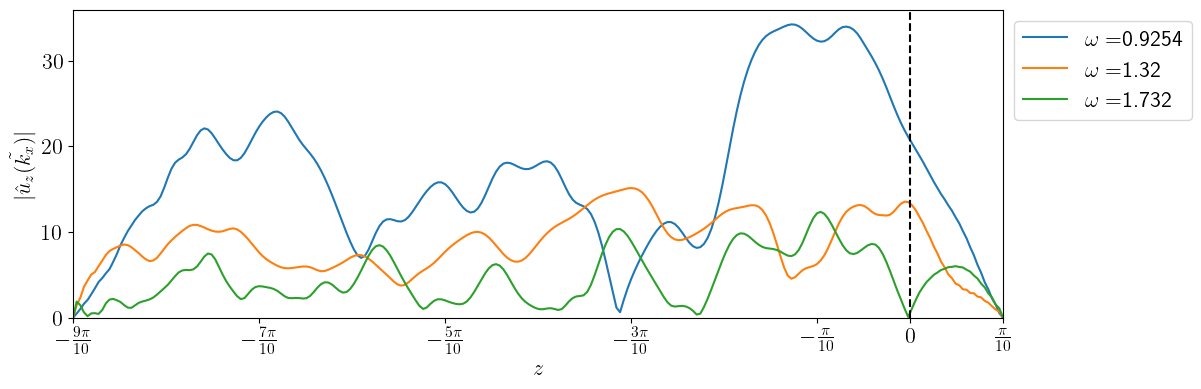

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(12,4))
ls = ['-', ':', '--', '-.', (0, (5, 10)), (0, (3, 10, 1, 10)), (5, (10, 3)), (0, (3, 1, 1, 1, 1, 1))]

for i in range(np.size(array_sat, 1)-2):
    exec(f'temp = id_om_sat{i}')
    # axs[0].plot(indx_z, np.real(array[:,i]), label=fr'$\omega=$om_tilde[id_om_{i}]')
    # axs.plot(indx_z, np.abs(array_kin[:,i]), ls=ls[i], label=fr'$\omega=$om_tilde_kin[id_om_{i}]')
    axs.plot(indx_z, np.abs(array_sat[:,i]), label=f'$\\omega=${om_tilde_sat[temp]:.4g}')
axs.axvline(x=0, c='k', ls='--')
axs.set_xlim(indx_z[0], indx_z[-1])
# axs[0].set_ylim(0,)
# axs[0].legend()
axs.set_xlabel(r"$z$")
axs.set_ylabel(r"$|\hat{u}_z(\tilde{k_x})|$")
xticks = (np.pi/10)*np.array([-9, -7, -5, -3, -1, 0, 1])
axs.set_xticks(xticks)
axs.set_xticklabels([r'$-\frac{9\pi}{10}$', r'$-\frac{7\pi}{10}$', r'$-\frac{5\pi}{10}$', \
                     r'$-\frac{3\pi}{10}$', r'$-\frac{\pi}{10}$', r'$0$', r'$\frac{\pi}{10}$'])
axs.set_ylim(0,)
plt.legend(loc='best', bbox_to_anchor=(1., 1.))
plt.show()

### total

In [ ]:
# indx_z = np.arange(0, 256, 2)
# indx_z = np.linspace(-2.6179, 0.52359, 256)

# for i in range(len(indx_z)):
#     # exec(f'uz_fourier_{i} = np.fft.fftn(uz_real[indx_t1:indx_t2,:,indx_z[{i}]], s=None, axes=(-2, -1), norm=None)')
#     exec(f'uz_fourier_{i} = np.fft.fftn(uz_real[indx_t1:indx_t2,:,{i}], s=None, axes=(-2, -1), norm=None)')

In [ ]:
# labels = []

# for i in range(5):
#     exec(f'id_om_{i} = np.argmin(np.abs(om_tilde - para_{i}[2]))')
#     exec(f'labels.append(para_{i})')

# id_kx = np.argmin(np.abs(k_tilde - 2))

In [ ]:
# array = np.zeros((len(indx_z), 5), dtype='complex') # NOTE: for k_x=2 (tilde) we have found 8 modes.

# for i in range(np.size(array, 0)):
#     for j in range(np.size(array, 1)):
#         exec(f'array[i,j] = uz_fourier_{i}[id_om_{j}, id_kx]')

In [ ]:
# fig, axs = plt.subplots(1,1, figsize=(8,5))
# ls = ['-', ':', '--', '-.', (0, (5, 10)), (0, (3, 10, 1, 10)), (5, (10, 3)), (0, (3, 1, 1, 1, 1, 1))]

# for i in range(np.size(array, 1)):
#     exec(f'temp = id_om_{i}')
#     # axs[0].plot(indx_z, np.real(array[:,i]), label=fr'$\omega=$om_tilde[id_om_{i}]')
#     axs.plot(indx_z, np.abs(array[:,i]), ls=ls[i])
# axs.axvline(x=0, c='k', ls='--')
# axs.set_xlim(indx_z[0], indx_z[-1])
# # axs[0].set_ylim(0,)
# # axs[0].legend()
# axs.set_xlabel(r"$z$")
# axs.set_ylabel(r"$|\hat{u}_z(\tilde{k_x})|$")
# plt.show()

### others calculations

In [ ]:
# fig, axs = plt.subplots(1,2, figsize=(14,5))
# ls = ['-', ':', '--', '-.', (0, (5, 10)), (0, (3, 10, 1, 10)), (5, (10, 3)), (0, (3, 1, 1, 1, 1, 1))]

# for i in range(np.size(array, 1)):
#     exec(f'temp = id_om_{i}')
#     # axs[0].plot(indx_z, np.real(array[:,i]), label=fr'$\omega=$om_tilde[id_om_{i}]')
#     axs[0].plot(indx_z, np.real(array[:,i]), ls=ls[i])
#     axs[1].plot(indx_z, np.imag(array[:,i]), ls=ls[i], label=fr'$\omega=${om_tilde[temp]:.3f}')#, label=f'id_om_{i}')

# axs[0].axvline(x=0, c='k', ls='--')
# axs[0].set_xlim(indx_z[0], indx_z[-1])
# # axs[0].set_ylim(0,)
# # axs[0].legend()
# axs[0].set_title(r"real")
# axs[0].set_xlabel(r"$z$")

# axs[1].axvline(x=0, c='k', ls='--')
# axs[1].set_xlim(indx_z[0], indx_z[-1])
# # axs[1].set_ylim(0,)
# axs[1].legend(bbox_to_anchor=[1.03,0.5], loc='center left')
# axs[1].set_title(r"imaginary")
# axs[1].set_xlabel(r"$z$")

# fig.supylabel(r"$\hat{u}_z$")
# plt.suptitle(r'for $k_x=2$')
# plt.tight_layout()
# plt.show()

### mode strength comparision

for $\tilde{k}_x=2$

In [ ]:
# P_k6_kin = np.abs(uz_fourier_kin[:,6]/D**2)
# P_k6_sat = np.abs(uz_fourier_sat[:,6]/D**2)

In [ ]:
# P_k6_kin_filt = gaussian_filter(P_k6_kin[:indx_kin],3)
# P_k6_sat_filt = gaussian_filter(P_k6_sat[:indx_sat],3)

In [ ]:
# P_k6_kin_filt = gaussian_filter(P_k6_kin[:indx_kin],3)
# P_k6_kin_filt.shape, P_k6_kin.shape

In [ ]:
# fig, axs = plt.subplots(2,1, sharex=True, figsize=(16,8))

# axs[0].plot((om_tilde_kin[:indx_kin]), (P_k6_kin[:indx_kin]), alpha=0.6)
# axs[0].plot((om_tilde_kin[:indx_kin]), (P_k6_kin_filt[:indx_kin]), label='kinetic_filttered')
# # for i in range(len(kz)):
# #     plt.axvline(x = kz[i], color = 'b')
# axs[0].set_xlim(0, np.pi)
# axs[0].set_ylim(0,8500)
# axs[0].legend()

# axs[1].plot((om_tilde_sat[:indx_sat]), (P_k6_sat[:indx_sat]), alpha=0.6)
# axs[1].plot((om_tilde_sat[:indx_sat]), (P_k6_sat_filt[:indx_sat]), label='saturated_filttered')
# axs[1].set_ylim(0,8500)
# axs[1].legend()

# plt.xlabel(r"$\tilde{\omega}$")
# fig.supylabel(r"$\tilde{P}(\tilde{\omega})$")
# plt.suptitle(r"for $k_x=2$")
# plt.tight_layout
# plt.show()

In [ ]:
# P_k2 = np.abs(uz_fourier[:,2]/D**2)
# P_k4 = np.abs(uz_fourier[:,4]/D**2)

In [ ]:
# integer = np.array([1,2,3,4,5])
# for i in range(1,6):
#     exec(f"P_k{i} = np.abs(uz_fourier[:,{i}]/D**2)")
# om_f_squ = g*integer*(1-q)/(1+q)